<center>
    

 # Principal Component Analysis for The Reduction of Dimensions In Diet and Labs and Machine Learningfor the rpediction of 
#### By: Mateo Yáñez Tanaka, Jorge Sánchez Ponce, Luis Carlos Marrufo, Fernando Pavia and  Vidal Alejandro
<center>

In this notebook we will provide the steps to be followed in order to be able to apply the principal component reduction and providing a quick interpretation of the results



<center>

## 1. Importing Libraries
<center>
    
    
In this section we import the relevant libraries that will help us handle the data and obtain the results. These are ```pandas```, ```numpy``` and ```statsmodels.api``` for data handling, ```matplotlib.pyplot``` and ```seaborn``` for graph creation and finally ```sklearn``` for the creation of the models.  

In [65]:
#importing the libraries

#for data handling
#=========================================================================================#
import pandas as pd 
import numpy as np 
import statsmodels.api as sm

#for graph creation
#=========================================================================================#
import matplotlib.pyplot as plt 
import seaborn as sns

#for processing and modelling
#=========================================================================================#
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.impute import KNNImputer

#Warning settings
#=========================================================================================#
import warnings
warnings.filterwarnings('ignore')

#Pandas settings
#=========================================================================================#
pd.set_option('display.max_columns', None)

<center>
        
## 2. Declaration of the Data Frames and Exploration
    
<center>
    
In this section we import the relevant csv's and explore the data in them using the methods from the ```pandas``` module ```df.head()``` which allows us to view the first entries of the dataframe and ```df.info``` which shows us the datatypes of the different columns and allows us to see if the dataframe needs cleaning, in these case we will analyze the data contained within three datasets, these are ```diet.csv```, ```labs.csv```, ```examination.csv```, ```demographic.csv```  and ```questionnaire.csv``` these datasets are public and were all obtained from [kaggle.com](https://www.kaggle.com/datasets/cdc/national-health-and-nutrition-examination-survey?select=questionnaire.csv) and it is from the National Health and Nutrition Examination Survey 2013-2014 (NHANES) published by the Center for Disease Control of the United States (CDC), the first step is to use the ```pandas``` module to create the dataframe

In [66]:
#Creation of the data frames
#=========================================================================================#
diet = pd.read_csv("data/diet.csv", index_col = 0) #Diet data frame 
labs = pd.read_csv("data/labs.csv", index_col = 0) #Lab data frame
questionnaire = pd.read_csv("data/questionnaire.csv", index_col = 0) #Questionnaire data frame
examination = pd.read_csv("data/examination.csv", index_col=0) #Examination data frame
demographic = pd.read_csv('data/demographic.csv', index_col=0) #Demographic data frame

We will first explore the ```diet``` dataframe in order as this will be the main dataframe that will be used to predict information in the other two dataframes

In [67]:
#Viewing the dataframe
#=========================================================================================#
diet.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,DR1TVB2,DR1TNIAC,DR1TVB6,DR1TFOLA,DR1TFA,DR1TFF,DR1TFDFE,DR1TCHL,DR1TVB12,DR1TB12A,DR1TVC,DR1TVD,DR1TVK,DR1TCALC,DR1TPHOS,DR1TMAGN,DR1TIRON,DR1TZINC,DR1TCOPP,DR1TSODI,DR1TPOTA,DR1TSELE,DR1TCAFF,DR1TTHEO,DR1TALCO,DR1TMOIS,DR1TS040,DR1TS060,DR1TS080,DR1TS100,DR1TS120,DR1TS140,DR1TS160,DR1TS180,DR1TM161,DR1TM181,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP184,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1.320Z,DR1.330Z,DR1BWATZ,DR1TWS,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,1.0,13.0,3.0,2.0,4.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1574.0,43.63,239.59,176.47,10.8,52.81,17.819,18.493,8.829,209.0,3.92,0.0,70.0,110.0,60.0,304.0,278.0,1398.0,430.0,1.057,1.216,11.804,0.951,285.0,66.0,219.0,330.0,216.3,2.79,0.00,241.4,3.3,29.2,949.0,756.0,206.0,8.41,8.85,1.072,1323.0,2228.0,62.5,203.0,36.0,0.0,2701.79,0.219,0.099,0.103,0.153,0.346,1.221,9.694,5.408,1.173,16.796,0.121,0.001,7.932,0.769,0.000,0.094,0.001,0.000,0.010,2.0,960.0,960.0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,5062.0,338.13,423.78,44.99,16.7,124.29,53.408,35.481,20.505,2584.0,20.94,0.0,1477.0,1488.0,0.0,145.0,12.0,0.0,899.0,4.178,5.168,65.396,4.415,1243.0,601.0,641.0,1662.0,2149.0,21.45,0.00,2.3,15.2,23.4,3193.0,6427.0,903.0,26.88,30.36,4.130,9726.0,4930.0,715.8,240.0,0.0,119.0,6779.99,1.872,1.160,0.802,1.286,1.297,6.516,27.952,12.107,2.208,32.429,0.086,0.000,15.483,1.774,0.007,0.728,1.003,0.104,1.139,2.0,360.0,360.0,0.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,1.0,13.0,1.0,1.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1743.0,64.61,224.39,102.90,9.9,65.97,25.263,20.902,12.953,88.0,8.87,0.0,616.0,655.0,21.0,449.0,35.0,515.0,300.0,1.648,1.747,18.342,1.906,423.0,290.0,133.0,625.0,161.2,3.78,1.42,195.1,4.0,40.4,877.0,1198.0,210.0,17.57,8.98,0.949,2943.0,1694.0,98.3,45.0,71.0,0.0,3766.70,0.358,0.128,0.371,0.455,3.008,2.067,10.691,7.497,0.531,19.910,0.164,0.005,11.705,1.092,0.000,0.042,0.001,0.006,0.002,2.0,1254.0,0.0,1254.0,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Notice how the data is first assigned a sequence number that relates to the evaluee and is then subsequently followed by variables assigned with different strings of letters and numbers, these mainly signify the different foods consumed by the evaluee on a daily basis, and the micro and macro nutrients they consume for more information on the specifics of the variables you should consult the [variable dictonary](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Dietary&CycleBeginYear=2013). For the purposes of this project we sill only be working with those that measure the grams consumed of each macro and micronutrient (measured in grams with their respective orders of magnitude) which all contain ```DR1T```, this prefix however is not exclusive which will make the cleaning more extensive.

In [68]:
#Viewing of the datatypes
#=========================================================================================#
diet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 73557 to 83731
Columns: 167 entries, WTDRD1 to DRD370V
dtypes: float64(166), int64(1)
memory usage: 12.6 MB


As all the data from this dataframe already has the desired datatypes which are ```float``` and ```int``` therefore no datatype change will be required during the cleaning. Having seen this we will continue to explore the ```lab``` dataframe

In [69]:
#Viewing the dataframe
#=========================================================================================#
labs.head()

,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,LBDSBUSI,LBXSC3SI,LBXSCA,LBDSCASI,LBXSCH,LBDSCHSI,LBXSCK,LBXSCLSI,LBXSCR,LBDSCRSI,LBXSGB,LBDSGBSI,LBXSGL,LBDSGLSI,LBXSGTSI,LBXSIR,LBDSIRSI,LBXSKSI,LBXSLDSI,LBXSNASI,LBXSOSSI,LBXSPH,LBDSPHSI,LBXSTB,LBDSTBSI,LBXSTP,LBDSTPSI,LBXSTR,LBDSTRSI,LBXSUA,LBDSUASI,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDLYMNO,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXHCT,LBXMCVSI,LBXMCHSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,URXUCL,WTSA2YR.x,LBXSCU,LBDSCUSI,LBXSSE,LBDSSESI,LBXSZN,LBDSZNSI,URXUCR.y,WTSB2YR.x,URXBP3,URDBP3LC,URXBPH,URDBPHLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC,URXTLC,URDTLCLC,URXTRS,URDTRSLC,URXBUP,URDBUPLC,URXEPB,URDEPBLC,URXMPB,URDMPBLC,URXPPB,URDPPBLC,URX14D,URD14DLC,URXDCB,URDDCBLC,URXUCR,PHQ020,PHACOFHR,PHACOFMN,PHQ030,PHAALCHR,PHAALCMN,PHQ040,PHAGUMHR,PHAGUMMN,PHQ050,PHAANTHR,PHAANTMN,PHQ060,PHASUPHR,PHASUPMN,PHAFSTHR.x,PHAFSTMN.x,PHDSESN,LBDPFL,LBDWFL,LBDHDD,LBDHDDSI,LBXHA,LBXHBS,LBXHBC,LBDHBG,LBDHD,LBXHCR,LBXHCG,LBDHEG,LBDHEM,LBXHE1,LBXHE2,LBXGH,LBDHI,ORXGH,ORXGL,ORXH06,ORXH11,ORXH16,ORXH18,ORXH26,ORXH31,ORXH33,ORXH35,ORXH39,ORXH40,ORXH42,ORXH45,ORXH51,ORXH52,ORXH53,ORXH54,ORXH55,ORXH56,ORXH58,ORXH59,ORXH61,ORXH62,ORXH64,ORXH66,ORXH67,ORXH68,ORXH69,ORXH70,ORXH71,ORXH72,ORXH73,ORXH81,ORXH82,ORXH83,ORXH84,ORXHPC,ORXHPI,ORXHPV,LBDRPCR.x,LBDRHP.x,LBDRLP.x,LBDR06.x,LBDR11.x,LBDR16.x,LBDR18.x,LBDR26.x,LBDR31.x,LBDR33.x,LBDR35.x,LBDR39.x,LBDR40.x,LBDR42.x,LBDR45.x,LBDR51.x,LBDR52.x,LBDR53.x,LBDR54.x,LBDR55.x,LBDR56.x,LBDR58.x,LBDR59.x,LBDR61.x,LBDR62.x,LBDR64.x,LBDR66.x,LBDR67.x,LBDR68.x,LBDR69.x,LBDR70.x,LBDR71.x,LBDR72.x,LBDR73.x,LBDR81.x,LBDR82.x,LBDR83.x,LBDR84.x,LBDR89.x,LBDRPI.x,LBXHP2C,LBDRPCR.y,LBDRHP.y,LBDRLP.y,LBDR06.y,LBDR11.y,LBDR16.y,LBDR18.y,LBDR26.y,LBDR31.y,LBDR33.y,LBDR35.y,LBDR39.y,LBDR40.y,LBDR42.y,LBDR45.y,LBDR51.y,LBDR52.y,LBDR53.y,LBDR54.y,LBDR55.y,LBDR56.y,LBDR58.y,LBDR59.y,LBDR61.y,LBDR62.y,LBDR64.y,LBDR66.y,LBDR67.y,LBDR68.y,LBDR69.y,LBDR70.y,LBDR71.y,LBDR72.y,LBDR73.y,LBDR81.y,LBDR82.y,LBDR83.y,LBDR84.y,LBDR89.y,LBDRPI.y,WTSAF2YR.y,LBXIN,LBDINSI,PHAFSTHR.y,PHAFSTMN.y,URXUIO,WTSAF2YR,LBXTR,LBDTRSI,LBDLDL,LBDLDLSI,WTSH2YR.x,LBXIHG,LBDIHGSI,LBDIHGLC,LBXBGE,LBDBGELC,LBXBGM,LBDBGMLC,WTSOG2YR,LBXGLT,LBDGLTSI,GTDSCMMN,GTDDR1MN,GTDBL2MN,GTDDR2MN,GTXDRANK,PHAFSTHR,PHAFSTMN,GTDCODE,WTSA2YR.y,URXP01,URDP01LC,URXP02,URDP02LC,URXP03,URDP03LC,URXP04,URDP04LC,URXP06,URDP06LC,URXP10,URDP10LC,URXP25,URDP25LC,WTSA2YR,URXUP8,URDUP8LC,URXNO3,URDNO3LC,URXSCN,URDSCNLC,WTSB2YR.y,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL,WTSB2YR,URXCNP,URDCNPLC,URXCOP,URDCOPLC,URXECP,URDECPLC,URXMBP,URDMBPLC,URXMC1,URDMC1LC,URXMEP,URDMEPLC,URXMHH,URDMHHLC,URXMHNC,URDMCHLC,URXMHP,URDMHPLC,URXMIB,URDMIBLC,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,LBXTC,LBDTCSI,LBXTTG,LBXEMA,WTSH2YR.y,LBXBPB,LBDBPBSI,LBDBPBLC,LBXBCD,LBDBCDSI,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,URXUTRI,URXUAS3,URDUA3LC,URXUAS5,URDUA5LC,URXUAB,URDUABLC,URXUAC,URDUACLC,URXUDMA,URDUDALC,URXUMMA,URDUMMAL,URXVOL1,URDFLOW1,URXVOL2,URDFLOW2,URXVOL3,URDFLOW3,URXUHG,URDUHGLC,URXUBA,URDUBALC,URXUCD,URDUCDLC,URXUCO,URDUCOLC,URXUCS,URDUCSLC,URXUMO,URDUMOLC,URXUMN,URDUMNLC,URXUPB,URDUPBLC,URXUSB,URDUSBLC,URXUSN,URDUSNLC,URXUSR,URDUSRLC,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,41.0,129.0,16.0,16.0,10.0,3.57,27.0,9.5,2.375,168.0,

The dataframe follows the same structure as ```diet``` being organized by sequence numbers relating to the evaluees, the variables mostly relate to the results obtained from a blood test and urine test, for more information on the specific variables consult the [variable dictionary](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Laboratory&CycleBeginYear=2013). For the purposes of this project we would like to remove any columns which aren't directly related to results obtained from the lood tests, which mostly refers to comment codes and respondant sequence numers,this columns to be dropped, however, do'nt have any repeating pattern requiring us to find another way to see which must be dropped.

In [70]:
#Viewing of the datatypes
#=========================================================================================#
labs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 73557 to 83731
Columns: 423 entries, URXUMA to LBDB12SI
dtypes: float64(423)
memory usage: 31.7 MB


As all the data is already in the desired datatypes we can forgo changing any datatypes during the cleaning. We then proceed to analyze the ```questionnaire``` dataframe

In [71]:
#Viewing the dataframe
#=========================================================================================#
questionnaire.head()

,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ056,BPD058,BPQ059,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX,CSQ010,CSQ020,CSQ030,CSQ040,CSQ060,CSQ070,CSQ080,CSQ090A,CSQ090B,CSQ090C,CSQ090D,CSQ100,CSQ110,CSQ120A,CSQ120B,CSQ120C,CSQ120D,CSQ120E,CSQ120F,CSQ120G,CSQ120H,CSQ140,CSQ160,CSQ170,CSQ180,CSQ190,CSQ200,CSQ202,CSQ204,CSQ210,CSQ220,CSQ240,CSQ250,CSQ260,AUQ136,AUQ138,CDQ001,CDQ002,CDQ003,CDQ004,CDQ005,CDQ006,CDQ009A,CDQ009B,CDQ009C,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010,DIQ010,DID040,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ175B,DIQ175C,DIQ175D,DIQ175E,DIQ175F,DIQ175G,DIQ175H,DIQ175I,DIQ175J,DIQ175K,DIQ175L,DIQ175M,DIQ175N,DIQ175O,DIQ175P,DIQ175Q,DIQ175R,DIQ175S,DIQ175T,DIQ175U,DIQ175V,DIQ175W,DIQ175X,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080,DBQ010,DBD030,DBD041,DBD050,DBD055,DBD061,DBQ073A,DBQ073B,DBQ073C,DBQ073D,DBQ073E,DBQ073U,DBQ700,DBQ197,DBQ223A,DBQ223B,DBQ223C,DBQ223D,DBQ223E,DBQ223U,DBQ229,DBQ235A,DBQ235B,DBQ235C,DBQ301,DBQ330,DBQ360,DBQ370,DBD381,DBQ390,DBQ400,DBD411,DBQ421,DBQ424,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ606,CBQ611,CBQ505,CBQ535,CBQ540,CBQ545,CBQ550,CBQ552,CBQ580,CBQ585,CBQ590,DED031,DEQ034A,DEQ034C,DEQ034D,DEQ038G,DEQ038Q,DED120,DED125,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,DUQ220U,DUQ230,DUQ240,DUQ250,DUQ260,DUQ270Q,DUQ270U,DUQ272,DUQ280,DUQ290,DUQ300,DUQ310Q,DUQ310U,DUQ320,DUQ330,DUQ340,DUQ350Q,DUQ350U,DUQ352,DUQ360,DUQ370,DUQ380A,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430,ECD010,ECQ020,ECD070A,ECD070B,ECQ080,ECQ090,WHQ030E,MCQ080E,ECQ150,FSD032A,FSD032B,FSD032C,FSD041,FSD052,FSD061,FSD071,FSD081,FSD092,FSD102,FSD032D,FSD032E,FSD032F,FSD111,FSD122,FSD132,FSD141,FSD146,FSDHH,FSDAD,FSDCH,FSD151,FSQ165,FSQ012,FSD012N,FSD230,FSD225,FSQ235,FSQ162,FSD650ZC,FSD660ZC,FSD675,FSD680,FSD670ZC,FSQ690,FSQ695,FSD650ZW,FSD660ZW,FSD670ZW,HEQ010,HEQ020,HEQ030,HEQ040,HIQ011,HIQ031A,HIQ031B,HIQ031C,HIQ031D,HIQ031E,HIQ031F,HIQ031G,HIQ031H,HIQ031I,HIQ031J,HIQ031AA,HIQ260,HIQ105,HIQ270,HIQ210,HOD050,HOQ065,HUQ010,HUQ020,HUQ030,HUQ041,HUQ051,HUQ061,HUQ071,HUD080,HUQ090,IMQ011,IMQ020,IMQ040,IMQ070,IMQ080,IMQ090,IMQ045,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,INQ244,IND247,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ070,MCQ075,MCQ080,MCQ082,MCQ084,MCQ086,MCQ092,MCD093,MCQ149,MCQ151,MCQ160A,MCQ180A,MCQ195,MCQ160N,MCQ180N,MCQ160B,MCQ180B,MCQ160C,MCQ180C,MCQ160D,MCQ180D,MCQ160E,MCQ180E,MCQ160F,MCQ180F,MCQ160G,MCQ180G,MCQ160M,MCQ170M,MCQ180M,MCQ160K,MCQ170K,MCQ180K,MCQ160L,MCQ170L,MCQ180L,MCQ160O,MCQ203,MCQ206,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ240A,MCQ240AA,MCQ240B,MCQ240BB,MCQ240C,MCQ240CC,MCQ240D,MCQ240DD,MCQ240DK,MCQ240E,MCQ240F,MCQ240G,MCQ240H,MCQ240I,MCQ240J,MCQ240K,MCQ240L,MCQ240M,MCQ240N,MCQ240O,MCQ240P,MCQ240Q,MCQ240R,MCQ240S,MCQ240T,MCQ240U,MCQ240V,MCQ240W,MCQ240X,MCQ240Y,MCQ240Z,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,MCQ380,OCD150,OCQ180,OCQ210,OCQ260,OCD270,OCQ380,OCD390G,OCD395,OHQ030,OHQ033,OHQ770,OHQ780A,OHQ780B,OHQ780C,OHQ780D,OHQ780E,OHQ780F,OHQ780G,OHQ780H,OHQ780I,OHQ780J,OHQ780K,OHQ555G,OHQ555Q,OHQ555U,OHQ560G,OHQ560Q,OHQ560U,OHQ565,OHQ570Q,OHQ570U,OHQ575G,OHQ575Q,OHQ575U,OHQ580,OHQ585Q,OHQ585U,OHQ590G,OHQ590Q,OHQ590U,OHQ610,OHQ612,OHQ614,OHQ620,OHQ640,OHQ680,OHQ835,OHQ845,OHQ848G,OHQ848Q,OHQ849,OHQ850,OHQ855,OHQ860,OHQ865,OHQ870,OHQ875,OHQ880,OHQ885,OHQ895,OHQ900,OSQ010A,OSQ010B,OSQ010C,OSQ020A,OSQ020B,OSQ020C,OSD030AA,OSQ040AA,OSD050AA,OSD030AB,OSQ040AB,OSD050AB,OSD030AC,OSQ040AC,OSD050AC,OSD030BA,OSQ040BA,OSD0

Again, the data follows the same structure as both ```labs``` and ```diet``` being organized through the use of a sequence number assigned to the evaluee, this questionnaire was mainly on the percieved health and sorrounding factors around the evaluees health it too has an associated [variable dictionary](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Questionnaire&CycleBeginYear=2013). For the scope of the PCA we will ignore this dataframe as most of it's variables are categoric and not necessarily quantitave making PCA an inefective process

In [72]:
#Viewing of the datatypes
#=========================================================================================#
questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 73557 to 83731
Columns: 952 entries, ACD011A to WHQ520
dtypes: float64(944), int64(6), object(2)
memory usage: 74.0+ MB


For this dataframe it's not the case that the variabbles are in the desired datatypes, but we won't clean the dataframe as  for the reasons mentioned before this dataframe is mostly categorical. Then we move on to the exploration of the ```examination``` dataframe. 

In [73]:
examination.head()

,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMDBMIC,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMDAVSAD,BMDSADCM,MGDEXSTS,MGD050,MGD060,MGQ070,MGQ080,MGQ090,MGQ100,MGQ110,MGQ120,MGD130,MGQ90DG,MGDSEAT,MGAPHAND,MGATHAND,MGXH1T1,MGXH1T1E,MGXH2T1,MGXH2T1E,MGXH1T2,MGXH1T2E,MGXH2T2,MGXH2T2E,MGXH1T3,MGXH1T3E,MGXH2T3,MGXH2T3E,MGDCGSZ,OHDEXSTS,OHDDESTS,OHXIMP,OHX01TC,OHX02TC,OHX03TC,OHX04TC,OHX05TC,OHX06TC,OHX07TC,OHX08TC,OHX09TC,OHX10TC,OHX11TC,OHX12TC,OHX13TC,OHX14TC,OHX15TC,OHX16TC,OHX17TC,OHX18TC,OHX19TC,OHX20TC,OHX21TC,OHX22TC,OHX23TC,OHX24TC,OHX25TC,OHX26TC,OHX27TC,OHX28TC,OHX29TC,OHX30TC,OHX31TC,OHX32TC,OHX02CTC,OHX03CTC,OHX04CTC,OHX05CTC,OHX06CTC,OHX07CTC,OHX08CTC,OHX09CTC,OHX10CTC,OHX11CTC,OHX12CTC,OHX13CTC,OHX14CTC,OHX15CTC,OHX18CTC,OHX19CTC,OHX20CTC,OHX21CTC,OHX22CTC,OHX23CTC,OHX24CTC,OHX25CTC,OHX26CTC,OHX27CTC,OHX28CTC,OHX29CTC,OHX30CTC,OHX31CTC,OHX02CSC,OHX03CSC,OHX04CSC,OHX05CSC,OHX06CSC,OHX07CSC,OHX08CSC,OHX09CSC,OHX10CSC,OHX11CSC,OHX12CSC,OHX13CSC,OHX14CSC,OHX15CSC,OHX18CSC,OHX19CSC,OHX20CSC,OHX21CSC,OHX22CSC,OHX23CSC,OHX24CSC,OHX25CSC,OHX26CSC,OHX27CSC,OHX28CSC,OHX29CSC,OHX30CSC,OHX31CSC,OHX02SE,OHX03SE,OHX04SE,OHX05SE,OHX07SE,OHX10SE,OHX12SE,OHX13SE,OHX14SE,OHX15SE,OHX18SE,OHX19SE,OHX20SE,OHX21SE,OHX28SE,OHX29SE,OHX30SE,OHX31SE,CSXEXSTS,CSXEXCMT,CSQ245,CSQ241,CSQ260A,CSQ260D,CSQ260G,CSQ260I,CSQ260N,CSQ260M,CSQ270,CSQ450,CSQ460,CSQ470,CSQ480,CSQ490,CSXQUIPG,CSXQUIPT,CSXNAPG,CSXNAPT,CSXQUISG,CSXQUIST,CSXSLTSG,CSXSLTST,CSXNASG,CSXNAST,CSXTSEQ,CSXCHOOD,CSXSBOD,CSXSMKOD,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,140.0,122.0,72.0,2.0,114.0,76.0,2.0,102.0,74.0,2.0,NaN,NaN,NaN,1,78.3,NaN,NaN,NaN,NaN,NaN,171.3,NaN,26.7,NaN,39.2,NaN,40.2,NaN,35.3,NaN,100.0,NaN,20.5,20.6,NaN,NaN,20.6,NaN,1.0,2.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,1.0,1.0,1.0,2.0,18.3,1.0,27.5,1.0,20.7,1.0,32.4,1.0,21.8,1.0,33.4,1.0,55.2,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,54.0,35.0,20.0,55.0,15.0,4.0,50.0,1.0,50.0,2.0,65.0,1.0,60.0,1.0,B,2.0,4.0,3.0,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,170.0,156.0,62.0,2.0,160.0,80.0,2.0,156.0,42.0,2.0,NaN,NaN,NaN,1,89.5,NaN,NaN,NaN,NaN,NaN,176.8,NaN,28.6,NaN,40.0,NaN,41.5,NaN,34.7,NaN,107.6,NaN,24.2,24.5,NaN,NaN,24.4,NaN,1.0,2.0,NaN,1.0,2.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,2.0,32.5,1.0,27.8,1.0,31.3,1.0,29.0,1.0,30.1,1.0,22.5,1.0,61.5,1.0,1.0,2.0,4.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,4.0,Z,J,S,S,S,S,S,S,S,S,S,Z,Z,Z,E,E,J,S,S,S,S,S,S,S,Z,S,E,E,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,1234.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,30.0,40.0,36.0,17.0,51.0,1.0,4.0,5.0,4.0,57.0,2.0,33.0,1.0,27.0,1.0,A,2.0,1.0,3.0,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,160.0,140.0,90.0,2.0,140.0,76.0,2.0,146.0,80.0,2.0,NaN,NaN,NaN,1,88.9,NaN,NaN,NaN,NaN,NaN,175.3,NaN,28.9,NaN,40.0,NaN,41.0,NaN,33.5,Na

This dataframe too follows the same structure as all the others with it's indexes being a sequence number relating too the ealuee. The data contained in this dataframe is mostly antropometric, for more precise information on what each variable is consult the [variable dictionary](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Examination&CycleBeginYear=2013), however, for the scope of this project we will only use a few measures, which are weight, standing height, body mass index (BMI), upper arm length, arm circunference and waist circumference.    

In [74]:
#viewing of the datatypes
#==================================================================#
examination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9813 entries, 73557 to 83731
Columns: 223 entries, PEASCST1 to CSAEFFRT
dtypes: float64(192), int64(2), object(29)
memory usage: 16.8+ MB


Some of the variables in this dataframe are not in the desired data types, however this is fine as those which are not in the desired datatypes do not conform any of the six variables that we are working with, meaning that the data types won't need to be changed. Finally we move to the exlploration of the ```demographic``` dataframe

In [75]:
#viewing of the Demographic data frame
#====================================================================#
demographic.head()

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN,3.0,4.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,2,1,69,1.0,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
73558,8,2,1,54,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,54,1.0,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
73559,8,2,1,72,NaN,3,3,2.0,NaN,1.0,1.0,1,1.0,NaN,NaN,4.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,72,1.0,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
73560,8,2,1,9,NaN,3,3,1.0,119.0,NaN,NaN,1,1.0,NaN,3.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,33,1.0,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
73561,8,2,2,73,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,78,1.0,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


The data contained in ```demographic``` is mostly aout the different groups and regions that the different people belong to, for more information on the specific variabbles contain the associated [variable dictionary](https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Demographics&CycleBeginYear=2013) however for the scope of this project we will only bbbe looking at two variables from this data frame, those being gender and age, this is ecause those play a large factor in health, thus making it so that we have to look only at a certain age group

In [76]:
#viewing of the datatypes
#=========================================================================#
demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10175 entries, 73557 to 83731
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SDDSRVYR  10175 non-null  int64  
 1   RIDSTATR  10175 non-null  int64  
 2   RIAGENDR  10175 non-null  int64  
 3   RIDAGEYR  10175 non-null  int64  
 4   RIDAGEMN  673 non-null    float64
 5   RIDRETH1  10175 non-null  int64  
 6   RIDRETH3  10175 non-null  int64  
 7   RIDEXMON  9813 non-null   float64
 8   RIDEXAGM  4213 non-null   float64
 9   DMQMILIZ  6261 non-null   float64
 10  DMQADFC   543 non-null    float64
 11  DMDBORN4  10175 non-null  int64  
 12  DMDCITZN  10171 non-null  float64
 13  DMDYRSUS  1908 non-null   float64
 14  DMDEDUC3  2803 non-null   float64
 15  DMDEDUC2  5769 non-null   float64
 16  DMDMARTL  5769 non-null   float64
 17  RIDEXPRG  1309 non-null   float64
 18  SIALANG   10175 non-null  int64  
 19  SIAPROXY  10174 non-null  float64
 20  SIAINTRP  10175 non-null

For this data frame we don't really care about the datatypes as the gender variable is categorical and the age value is already fully numerical, however it should also eb noted that all of the data is already in numerical values as all the data types are already either ```float``` or ```int``` . With all of these things done we can proceed with the cleaning of the data frames

<center>
    
## 3. Cleaning of the Data Frames
<center>

As was mentioned before the scope of this project limits the amount of variables that we can work with, therefore it requires us to drop a bunch of columns that don't represent the desired variables, for this we will import the different variable dictionaries for each data frame to comb through them and obtain the names of the columns that we consider relevant by isolating keywords in the description to be either kept (like grams or calories) or dropped (like comment codes). First we import the ```labs``` and ```diet``` variable dictionaries

In [77]:
#Definition of the URLS
#=========================================================================================#
url_diet = "https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Dietary&CycleBeginYear=2013"
url_labs = "https://wwwn.cdc.gov/Nchs/Nhanes/Search/variablelist.aspx?Component=Laboratory&CycleBeginYear=2013"

#Reading of the dictionaries
#=========================================================================================#
diet_tables = pd.read_html(url_diet)
labs_tables = pd.read_html(url_labs)

#Setting the dictionary as a dataframe
#=========================================================================================#
diet_dict = diet_tables[0]
labs_dict = labs_tables[0]

Having done this we will remove everything from the dataframe except the description of the variable and  it's name and change the name so that it becomes the index of the dataframe, making it a single column df which will then be transposed and turned into a dictionary so that the keywords will be the names of the variables and they will relate to access

In [78]:
#Setting the columns we want to keep as exceptions
#=========================================================================================#
exceptions = ['Variable Name', 'Variable Description']

#Dropping every column that isn't an exception
#=========================================================================================#
for i in diet_dict.columns.tolist():
    if i not in exceptions:
        diet_dict = diet_dict.drop(i, axis = 'columns')
for i in labs_dict.columns.tolist():
    if i not in exceptions:
        labs_dict = labs_dict.drop(i, axis = 'columns')
        
#Turning 'Variale Name' into index column
#=========================================================================================#
diet_dict = diet_dict.set_index('Variable Name')
labs_dict = labs_dict.set_index('Variable Name')

#Transposig the dataframes
#=========================================================================================#
diet_dict = diet_dict.T
labs_dict = labs_dict.T

#Turning them into dictionaries
#=========================================================================================#
diet_dict = diet_dict.to_dict(orient = 'list')
labs_dict = labs_dict.to_dict(orient = 'list')

Having these dictionaries we will now comb throuhg them creating two lists respectively called ```keep```which will contain the variables to be kept in the ```diet``` data frame and another one called ```drop``` which will contain the variables to be dropped in the ```labs``` dataframe, this lists will contain the keys associeated to the descriptions that match those of the things we want to keep or drop respectively

In [79]:
#Setting the keywords to look for in the description of the variables
#=========================================================================================#
keep_keywords =['gm','mg','mcg','kcal']
drop_keywords =['comment','code','?','Session']

keep =[]
drop =[]

#Combing through the dictionaries and saving the relevant keys
#=========================================================================================#
for key in diet_dict.keys():
    for description in diet_dict[key]:
        if any(word in str(description) for word in keep_keywords):
            keep.append(key)

for key in labs_dict.keys():
    for description in labs_dict[key]:
        if any(word in str(description) for word in drop_keywords):
            drop.append(key)

Now having the names of the variables to be dropped and kept respectively we proceed to move to applying this changes to the actual dataframes so that we will have only the relevant data in the data frames

In [80]:
#dropping everything not in keep in the diet data frame
#================================================================#
for col in diet.columns.tolist():
    if col not in keep:
        diet = diet.drop(col, axis = 'columns')

#dropping everything in drop from the labs data frame
#================================================================#
for col in labs.columns.tolist():
    if col in drop:
        labs = labs.drop(col, axis = 'columns')

Now we drop the non deisreable columns form the ```examination``` dataframe making sure to only keep those six aforementioned metrics, this will be done manually as, with the number of columns to be kept being so small it would be overkill to import the whole dictionary, while doing this we will also change the names of the variables to make them more legible and understandable at a first viewing.

In [81]:
#keeping only the 6 relevant variables from examinations
#=====================================================================#
exam_var_dict = {
    'BMXWT': 'weight_kg',
    'BMXHT': 'standing_height_cm',
    'BMXBMI': 'body_mass_index_kg_m2',
    'BMXARML': 'upper_arm_length_cm',
    'BMXARMC': 'arm_circumference_cm',
    'BMXWAIST': 'waist_circumference_cm',
}
examination = examination[list(exam_var_dict.keys())].rename(columns=exam_var_dict)

Finally we drop everything except the gender and age variables from the ```demographics``` dataframe and rename them as simply age and gender so that they are easier to understand

In [82]:
#Keeping only the 2 relevant variables from demographics
#========================================================================#
demo_var_dict = {
    'RIAGENDR': 'gender_1m_2f',
    'RIDAGEYR': 'age_in_years',
}
demographic = demographic[list(demo_var_dict.keys())].rename(columns = demo_var_dict) 

Now we make sure that the ages of the people that we are analyzing are within the demographics that we set on to analyze which in this case is those with ages between 20 and 39

In [83]:
#Removing everyone with age>=40 and age<20
#============================================================================#
demographic = demographic[demographic['age_in_years'] < 40]
demographic = demographic[demographic['age_in_years'] >= 20]
demographic.describe()

,gender_1m_2f,age_in_years
count,1954.000000,1954.000000
mean,1.513306,29.435005
std,0.499951,5.816456
min,1.000000,20.000000
25%,1.000000,24.000000
50%,2.000000,30.000000
75%,2.000000,34.000000
max,2.000000,39.000000


Finally after having modified the ```labs```, ```diet```, ```examination``` and ```demographics``` data frames so that they only contain the variables we desire, we remove any columns and rows that have very few entries as their data will not be very helpful to us if the contents are very reduced, thus if more than $20\%$ of the data is empty that variable or participant will not be usefull to us, thus we define a function called ```drop_empty_data``` that will drop any column or row that is missing more than $n\%$ of their data

In [84]:
#Defining a function that drops those columns and rows that contain less than n% of the full information
#================================================================#
def drop_empty_data(df, column_threshold=50, row_threshold=50):
    # Drop columns with missing data percentage greater than column_threshold
    col_limit = int((column_threshold / 100) * len(df))
    df = df.dropna(axis= 'columns', thresh=col_limit)
    
    # Drop rows with missing data percentage greater than row_threshold
    row_limit = int((row_threshold / 100) * len(df.columns))
    df = df.dropna(axis= 'rows', thresh=row_limit)
    
    return df

Now we run this function to clean the ```labs```, ```diet``` and ```examination``` data frames.

In [85]:
#We drop the columns that contain less than 20% of the possible data
#================================================================#
diet = drop_empty_data(diet, column_threshold = 80, row_threshold = 80)
labs = drop_empty_data(labs, column_threshold = 80, row_threshold = 80)
examination = drop_empty_data(examination, column_threshold = 80, row_threshold = 80)

The next step is to do an inner join of all the dataframes to make sure that we are always analyzing the data from the same evaluees, thus we use the sequence number to preform this inner join and make sure that all the data matches up across all data frames

In [86]:
#Inner join of all the data before running the KNN Imputer
#====================================================================#
all_data= pd.merge(pd.merge(pd.merge(demographic, examination, on='SEQN', how = 'inner'), diet, on='SEQN', how = 'inner'), labs, on='SEQN', how = 'inner')

Finally we use the $K$-Nearest-Neighbors algorithm to fill any missing values in the columns and rows that we kept, using the function ```KNNImputer``` from the ```sklearn``` module with the parameter ```weights = 'distance'``` so that those values that are generally closer to the ones missing are weighted as more important than those that are further away.

In [87]:
#we fill all missing values using the KNNImputer so that there aren't any NANs in the dataframe
#=========================================================================================#
imputer = KNNImputer(weights = 'distance', missing_values = np.nan)
imputer.fit(all_data)
all_data_knn = imputer.transform(all_data)
all_data = pd.DataFrame(
    data=all_data_knn,
    columns = all_data.columns,
    index = all_data.index
    
)

We split the ```all_data``` data frame back into the other individual data frames and obtain and also rename the columns of the ```diet``` and ```labs``` data frames to make them more legible and comprehensible without the use of the variable dictionary

In [88]:
#Resplitting of all_data
#==============================================================================#
demographic = all_data.iloc[:,0:2]
examination = all_data.iloc[:,2:8]
diet = all_data.iloc[:,8:74]
labs = all_data.iloc[:,74:]

#Renaming of the diet columns
#===============================================================================#
diet.columns = diet.columns = [
    "energy_intake_kcal",
    "total_protein_g",
    "total_carbohydrate_g",
    "total_sugar_g",
    "total_dietary_fiber_g",
    "total_fat_g",
    "saturated_fat_g",
    "monounsaturated_fat_g",
    "polyunsaturated_fat_g",
    "cholesterol_mg",
    "alpha_tocopherol_mg",
    "total_alpha_tocopherol_iu",
    "retinol_µg",
    "vitamin_a_rae_µg",
    "alpha_carotene_µg",
    "beta_carotene_µg",
    "beta_cryptoxanthin_µg",
    "lycopene_µg",
    "lutein_zeaxanthin_µg",
    "thiamin_b1_mg",
    "riboflavin_b2_mg",
    "niacin_mg",
    "vitamin_b6_mg",
    "total_folate_µg",
    "folate_food_source_µg",
    "folate_fortified_µg",
    "dietary_folate_equivalents_µg",
    "choline_mg",
    "vitamin_b12_µg",
    "bioavailable_vitamin_b12_µg",
    "vitamin_c_mg",
    "vitamin_d_µg",
    "vitamin_k_µg",
    "calcium_mg",
    "phosphorus_mg",
    "magnesium_mg",
    "iron_mg",
    "zinc_mg",
    "copper_mg",
    "sodium_mg",
    "potassium_mg",
    "selenium_µg",
    "caffeine_mg",
    "theobromine_mg",
    "alcohol_g",
    "moisture_g",
    "saturated_fatty_acid_4_0_g",
    "saturated_fatty_acid_6_0_g",
    "saturated_fatty_acid_8_0_g",
    "saturated_fatty_acid_10_0_g",
    "saturated_fatty_acid_12_0_g",
    "saturated_fatty_acid_14_0_g",
    "saturated_fatty_acid_16_0_g",
    "saturated_fatty_acid_18_0_g",
    "monounsaturated_fatty_acid_16_1_g",
    "monounsaturated_fatty_acid_18_1_g",
    "monounsaturated_fatty_acid_20_1_g",
    "monounsaturated_fatty_acid_22_1_g",
    "polyunsaturated_fatty_acid_18_2_g",
    "polyunsaturated_fatty_acid_18_3_g",
    "polyunsaturated_fatty_acid_18_4_g",
    "polyunsaturated_fatty_acid_20_4_g",
    "polyunsaturated_fatty_acid_20_5_g",
    "polyunsaturated_fatty_acid_22_5_g",
    "polyunsaturated_fatty_acid_22_6_g",
    "water_g"]

#Renaming of the labs columns
#=======================================================================#
labs.columns =[
    "urine_uric_acid_mcg_dl",  # URXUMA
    "urine_uric_acid_sugar_ratio",  # URXUMS
    "urine_creatinine_mg_dl",  # URXUCR.x
    "serum_creatinine_mg_dl",  # URXCRS
    "urine_albumin_mg_g",  # URDACT
    "white_blood_cell_count_cells_per_uL",  # LBXWBCSI
    "lymphocyte_percentage_of_total_wbc",  # LBXLYPCT
    "monocyte_percentage_of_total_wbc",  # LBXMOPCT
    "neutrophil_percentage_of_total_wbc",  # LBXNEPCT
    "eosinophil_percentage_of_total_wbc",  # LBXEOPCT
    "basophil_percentage_of_total_wbc",  # LBXBAPCT
    "absolute_lymphocyte_count_cells_per_uL",  # LBDLYMNO
    "absolute_monocyte_count_cells_per_uL",  # LBDMONO
    "absolute_neutrophil_count_cells_per_uL",  # LBDNENO
    "absolute_eosinophil_count_cells_per_uL",  # LBDEONO
    "absolute_basophil_count_cells_per_uL",  # LBDBANO
    "red_blood_cell_count_million_cells_uL",  # LBXRBCSI
    "hemoglobin_concentration_g_dl",  # LBXHGB
    "hematocrit_percentage",  # LBXHCT
    "mean_corpuscular_volume_fL",  # LBXMCVSI
    "mean_corpuscular_hemoglobin_pg",  # LBXMCHSI
    "mean_cell_hemoglobin_concentration_g_dl",  # LBXMC
    "red_cell_distribution_width_percentage",  # LBXRDW
    "platelet_count_cells_per_uL",  # LBXPLTSI
    "mean_platelet_volume_fL",  # LBXMPSI
    "fasting_hours_before_lab_visit",  # PHAFSTHR.x
    "fasting_minutes_before_lab_visit",  # PHAFSTMN.x
    "hemoglobin_a1c_percentage",  # LBXHA
    "hepatitis_b_surface_antigen",  # LBXHBS
    "urine_volume_ml",  # URXVOL1
]

With this we can finally proceed with the final steps before moving onto the PCA

<center> 
    
## 4. Obtaining the Means and Variance, and Standarization of the Variables   
<center>
    
In this section we obtain the means and variance of the different columns present in the dataframes thorough the use of the method ```mean()``` and ```var()``` from the ```numpy``` module, and finally we will complete the standarization of the variables using 
    $$Z = \frac{X-\mu}{\sigma}$$
Where $\mu$ is the mean of the dataset and $\sigma$ is the standard deviation. A side effect of this is that the variables will also loose their units as the dimensionality analysis shows $$\frac{X[unit]-\mu[unit]}{\sigma[unit]} = Z[1]$$

In [89]:
#Obtaining the means
#=========================================================================================#
diet_means = diet.mean(axis=0)
labs_means = labs.mean(axis=0)

#Obtaining the variance
#=========================================================================================#
diet_var = diet.var(axis=0)
labs_var = labs.var(axis=0)

#Standarizing each column
#=========================================================================================#
k = 0
for col in diet.columns.tolist():
    diet[col] = (diet[col] - diet_means.tolist()[k])/np.sqrt(diet_var.tolist()[k])
    k += 1
    
k = 0
for col in labs.columns.tolist():
    labs[col] = (labs[col] - labs_means.tolist()[k])/np.sqrt(labs_var.tolist()[k])
    k += 1

The variables are now standarized allowing us to procced with the PCA 

<center>

## 5. PCA Model

<center>

In this section we will use functions from the ```sklearn``` module to do the PCA decomposition, these will mainly be done through the use of ```sklearn.decomposition.PCA``` and the ```piplines``` to apply the ```PCA()``` function, the PCA will be applied to 2 data frames, these are ```diet``` and ```labs```

In [90]:
#We train the PCA models with the scaled Data
#=========================================================================================#
pca_pipe_diet = make_pipeline(PCA())
pca_pipe_diet.fit(diet)

pca_pipe_labs = make_pipeline(PCA())
pca_pipe_labs.fit(labs)


#We extract the model from the pipline and view the results
#=========================================================================================#
pca_model_diet = pca_pipe_diet.named_steps['pca']
pca_model_labs = pca_pipe_labs.named_steps['pca']

With the model already done we want to proceed with the interpretation of the PCA results

<center>

## 6. Interpretation of the Results
    
<center>
    
First we want to check the ```compenents_``` attribute of the PCA which contains the loadings $\phi$ that define every component with respect to each variable. The loadings refer to the coefficients that multiply each variale to form each of the principal components as a linear combination. Given you have a set of variables $(X_1,X_2,X_3,...,X_n)$ each principal component will be $$Z_m = \phi_{m,1}X_1+\phi_{m,2}X_2 + \phi_{m,3}X_3 + ... + \phi_{m,n}X_n$$ 
The columns respond to the loading multiplying each variable and the and the rows to the associated principal components ordered from most to least variance explained

In [91]:
# We turn the model into a dataframe to add a name to the axes
#=========================================================================================#
diet_loadings = pd.DataFrame(
    data    = pca_model_diet.components_,
    columns = diet.columns,
    index   = ['PC'+str(n) for n in range(1,len(diet.columns)+1)]
)
diet_loadings.head()

,energy_intake_kcal,total_protein_g,total_carbohydrate_g,total_sugar_g,total_dietary_fiber_g,total_fat_g,saturated_fat_g,monounsaturated_fat_g,polyunsaturated_fat_g,cholesterol_mg,alpha_tocopherol_mg,total_alpha_tocopherol_iu,retinol_µg,vitamin_a_rae_µg,alpha_carotene_µg,beta_carotene_µg,beta_cryptoxanthin_µg,lycopene_µg,lutein_zeaxanthin_µg,thiamin_b1_mg,riboflavin_b2_mg,niacin_mg,vitamin_b6_mg,total_folate_µg,folate_food_source_µg,folate_fortified_µg,dietary_folate_equivalents_µg,choline_mg,vitamin_b12_µg,bioavailable_vitamin_b12_µg,vitamin_c_mg,vitamin_d_µg,vitamin_k_µg,calcium_mg,phosphorus_mg,magnesium_mg,iron_mg,zinc_mg,copper_mg,sodium_mg,potassium_mg,selenium_µg,caffeine_mg,theobromine_mg,alcohol_g,moisture_g,saturated_fatty_acid_4_0_g,saturated_fatty_acid_6_0_g,saturated_fatty_acid_8_0_g,saturated_fatty_acid_10_0_g,saturated_fatty_acid_12_0_g,saturated_fatty_acid_14_0_g,saturated_fatty_acid_16_0_g,saturated_fatty_acid_18_0_g,monounsaturated_fatty_acid_16_1_g,monounsaturated_fatty_acid_18_1_g,monounsaturated_fatty_acid_20_1_g,monounsaturated_fatty_acid_22_1_g,polyunsaturated_fatty_acid_18_2_g,polyunsaturated_fatty_acid_18_3_g,polyunsaturated_fatty_acid_18_4_g,polyunsaturated_fatty_acid_20_4_g,polyunsaturated_fatty_acid_20_5_g,polyunsaturated_fatty_acid_22_5_g,polyunsaturated_fatty_acid_22_6_g,water_g
PC1,0.185768,0.171834,0.149455,0.098917,0.127922,0.182593,0.172067,0.173030,0.150681,0.122235,0.131492,0.028251,0.129216,0.108123,0.014030,0.030473,0.031958,0.055036,0.035307,0.156951,0.134806,0.125959,0.094677,0.143189,0.095557,0.131537,0.132282,0.149705,0.110766,0.040153,0.065963,0.094338,0.057615,0.155323,0.184145,0.160316,0.155326,0.157748,0.142606,0.169219,0.169829,0.165485,0.032941,0.040580,0.031479,0.088169,0.122026,0.121230,0.104014,0.127722,0.060699,0.139020,0.175394,0.166538,0.141635,0.170126,0.122603,0.041805,0.148752,0.135350,0.043055,0.112132,0.039654,0.085066,0.044480,0.000736
PC2,-0.029014,0.075053,-0.038774,-0.067638,0.104416,-0.081460,-0.207021,-0.046054,0.051690,0.018509,0.142094,0.084568,-0.075814,0.062153,0.103298,0.154905,0.078423,-0.024235,0.146114,0.036424,0.048845,0.127898,0.147832,0.087068,0.003615,0.149558,0.061604,0.107051,0.093537,0.093377,0.113604,0.042771,0.160294,-0.102266,0.027902,0.141830,0.045370,0.028867,0.149779,-0.001999,0.103523,0.068105,-0.003708,-0.056258,0.059072,0.095135,-0.274606,-0.276777,-0.267925,-0.288965,-0.185541,-0.285865,-0.158618,-0.182565,-0.095542,-0.031322,0.048999,0.098161,0.050213,0.017410,0.046106,0.066428,0.163003,0.121829,0.179430,0.048647
PC3,0.012993,0.063084,-0.075213,-0.045276,-0.157549,0.077636,0.051734,0.082034,0.077701,0.189359,-0.035949,-0.125488,-0.088575,-0.142461,-0.067754,-0.115697,-0.037430,-0.073477,-0.126776,-0.140696,-0.103655,-0.040897,-0.090941,-0.198369,-0.196193,-0.101239,-0.205538,0.127432,0.025538,-0.122849,-0.095299,0.108995,-0.115864,-0.092568,0.005325,-0.091337,-0.146389,-0.046892,-0.046551,0.041321,-0.051028,0.090386,-0.024797,-0.023794,0.017952,-0.045947,-0.014264,-0.022834,-0.035151,-0.026185,-0.024906,0.006606,0.070352,0.067120,0.144537,0.075494,0.188176,0.242260,0.067793,0.049802,0.232126,0.204281,0.303329,0.302683,0.322763,-0.001217
PC4,-0.055918,-0.010210,-0.004437,0.041798,-0.157974,-0.129936,-0.036450,-0.148203,-0.197893,-0.010264,-0.135048,0.082030,0.186549,0.062061,-0.037730,-0.088483,-0.101271,-0.067192,-0.101377,0.048046,0.235780,0.214255,0.243985,0.052963,0.185704,-0.142514,0.101297,-0.024464,0.317123,0.342614,-0.060630,0.232375,-0.133188,0.067417,-0.012446,-0.087843,0.068798,0.035614,-0.104860,-0.016879,-0.066570,-0.003113,0.104128,-0.002429,-0.010144,-0.007355,0.074316,0.090648,0.058350,0.063430,0.008604,0.054732,-0.062493,-0.052609,-0.032304,-0.157249,-0.016545,0.102113,-0.204785,-0.167508,0.127802,-0.039313,0.152328,0.136189,0.154049,-0.040480
PC5,-0.112966,-0.016153,-0.131778,-0.116901,0.030161,-0.075964,0.004227,-0.097567,-0.125551,0.053076,-0.038054,0.020325,0.111224,0.325061,0.254277,0.341924,0.085019,-0.054811,0.2950

Then we want make a heatmap using the loadings of the components to describe how correlated they are to each variable, for this we use the ```seaborn``` and ```matplotlib``` modules

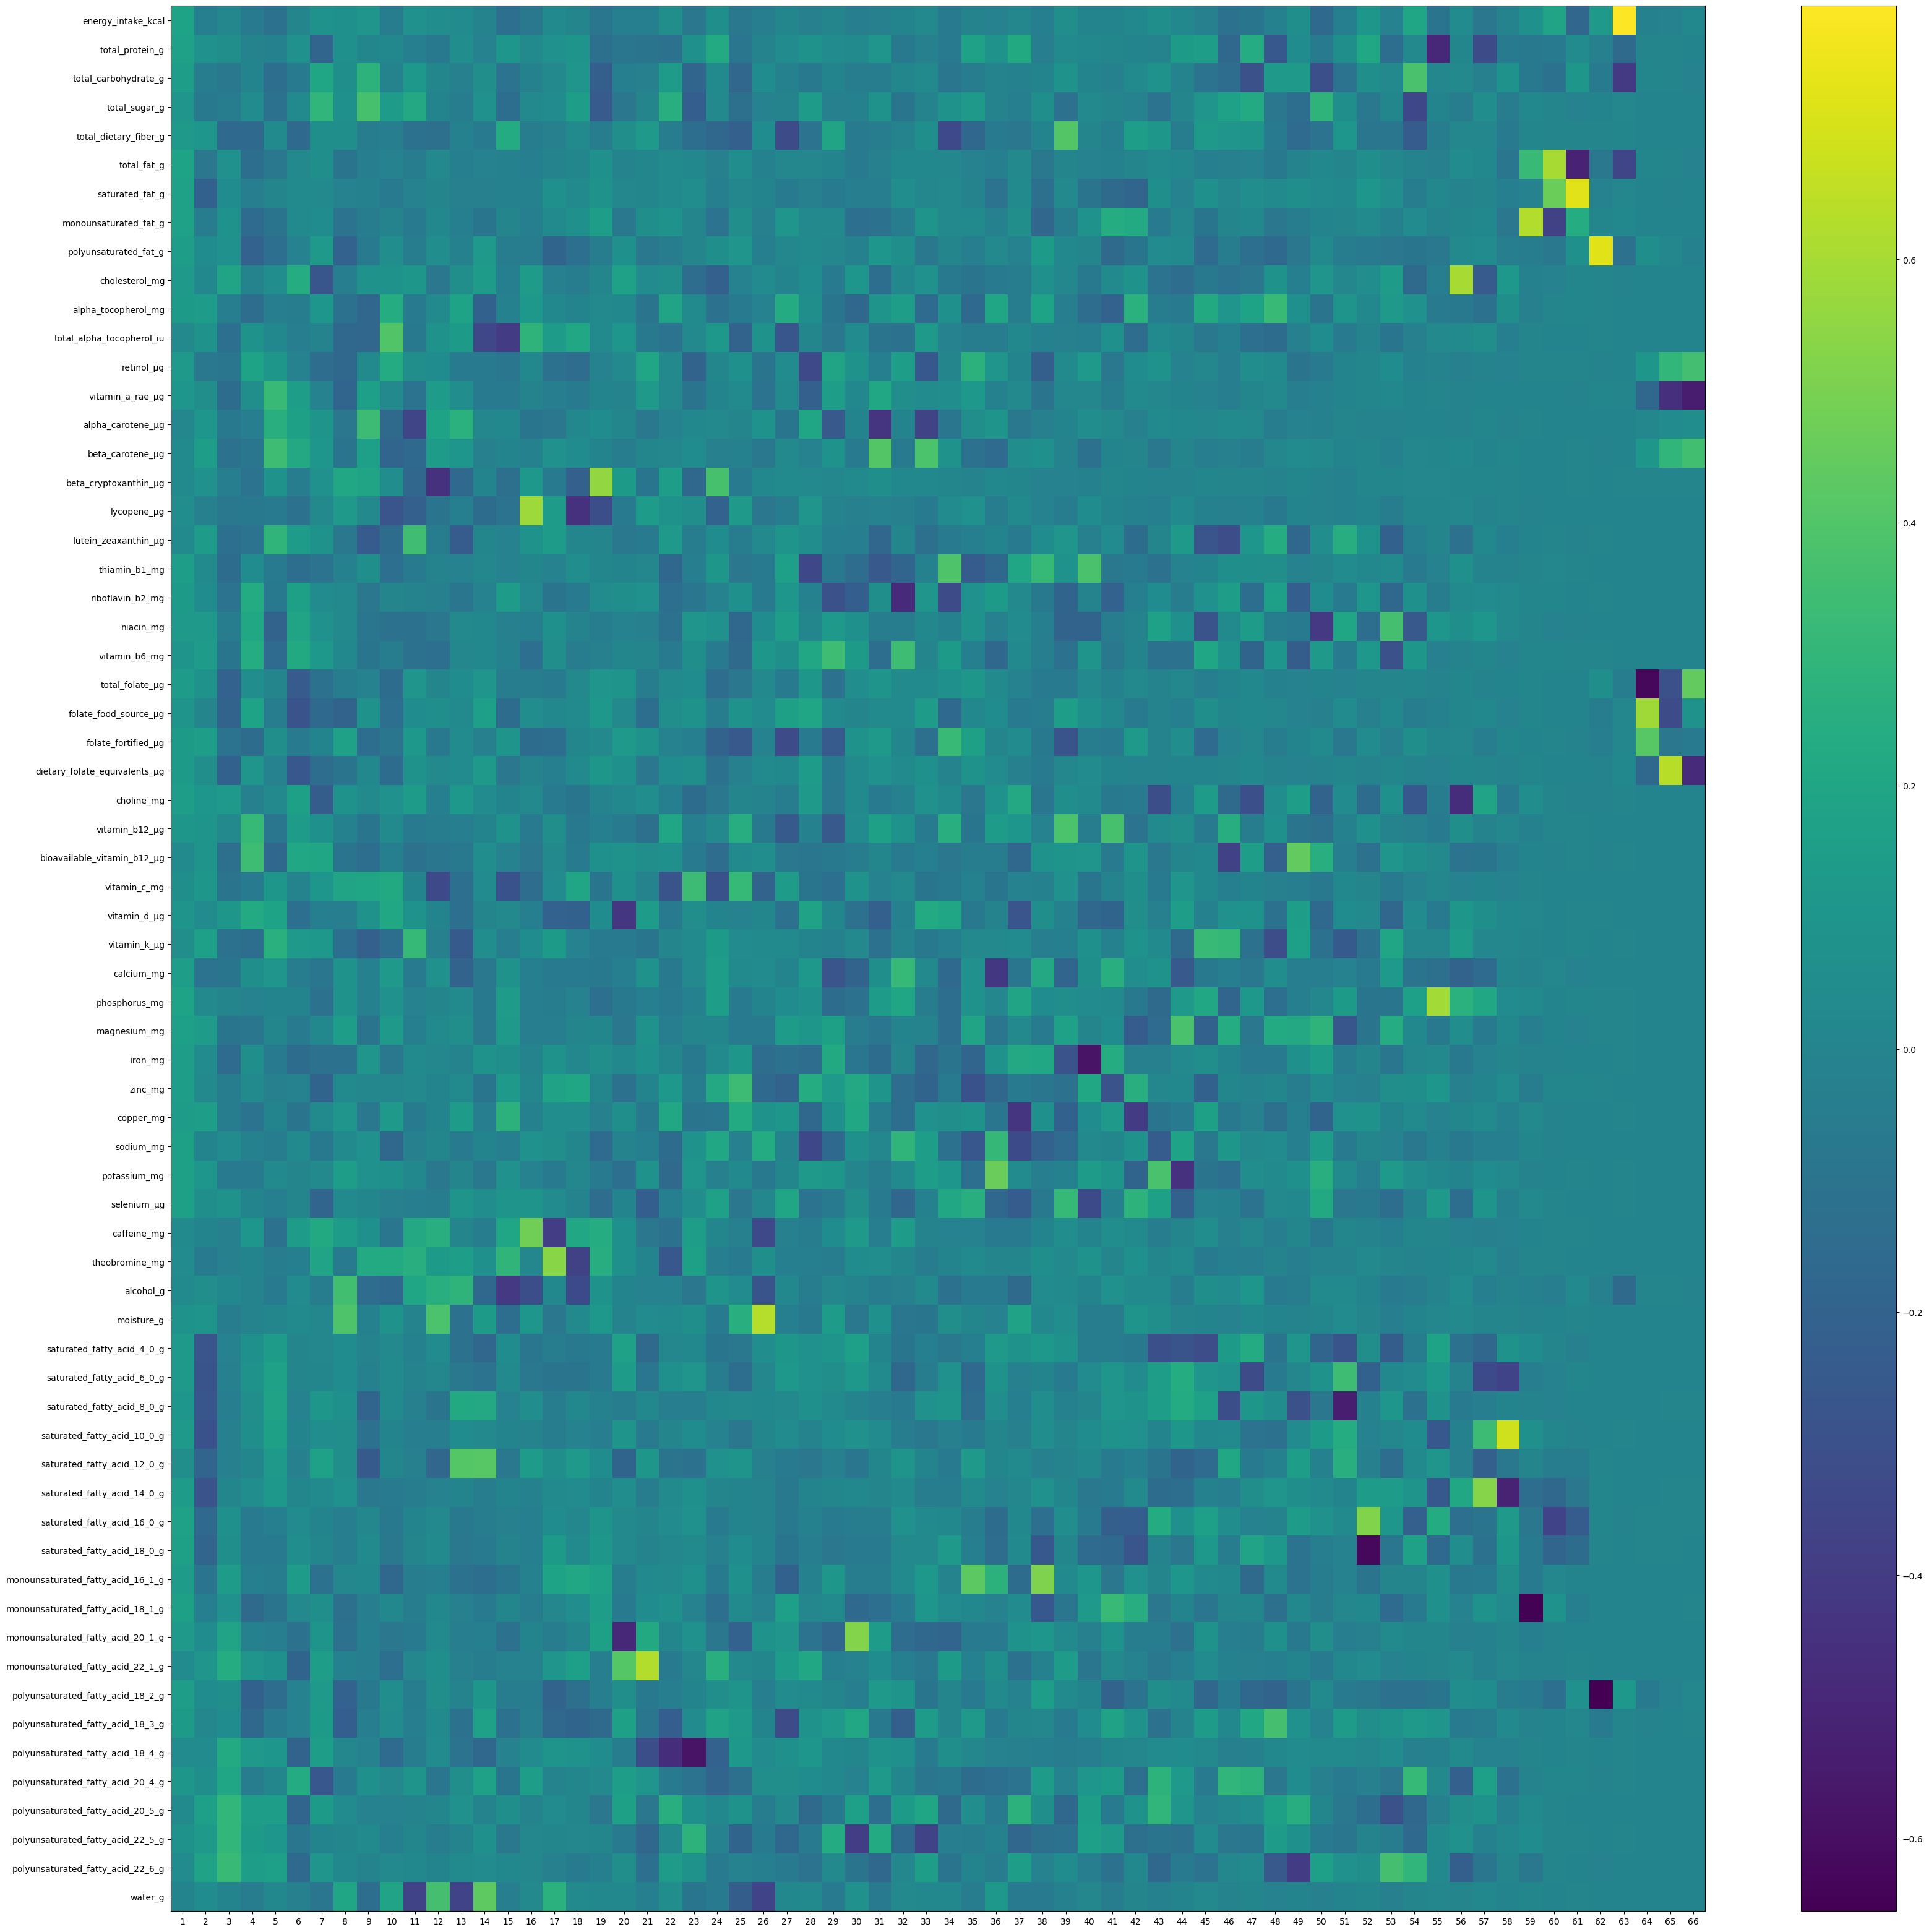

In [92]:
# Heatmap components
#=========================================================================================#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(40, 40))
diet_components = pca_model_diet.components_
plt.imshow(diet_components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(diet.columns)), diet.columns)
plt.xticks(range(len(diet.columns)), np.arange(pca_model_diet.n_components_) + 1)
plt.grid(False)
plt.colorbar();
#fig.savefig('diet_heatmap_loadings.svg')

From this heatmap we can conclude that most variables have a light effect on most of the the principal components having only strong signaficance in a few of them. We wil continue to see how much of the variance each of the principal components explains, to obtain this we will extract the ```explained_variance_ratio``` attribute from the variable in which our PCA was stored and plot it in a barplot using ```matplotlib```

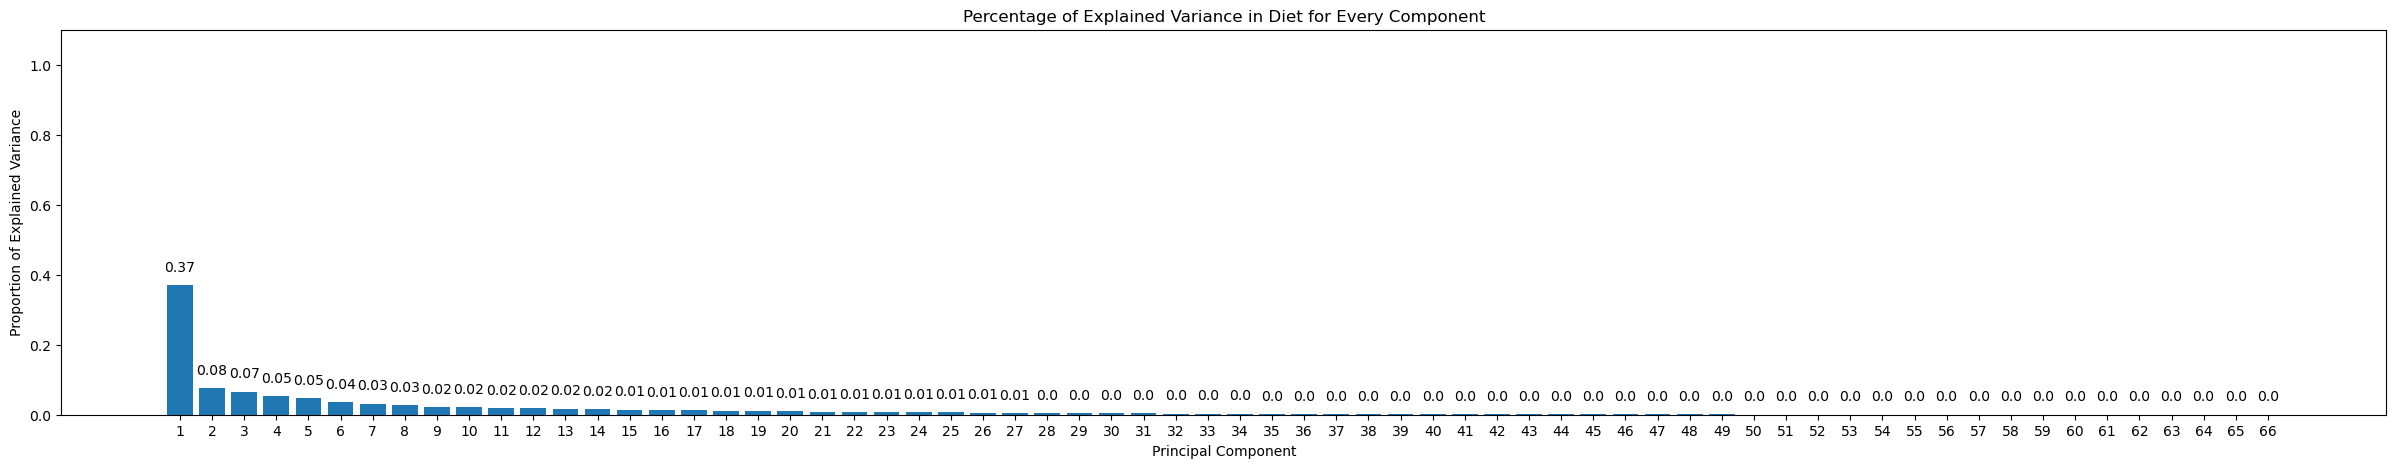

In [93]:
# Barplot of the percentage of explained variance
#=========================================================================================#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 5))
ax.bar(
    x      = np.arange(pca_model_diet.n_components_) + 1,
    height = pca_model_diet.explained_variance_ratio_
)

for x, y in zip(np.arange(len(diet.columns)) + 1, pca_model_diet.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_model_diet.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage of Explained Variance in Diet for Every Component')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Explained Variance');
#fig.savefig('diet_PC_variance_loadings.svg')

We can see that a lot of the principal components are irrelevant in the explanation of the variance with a lot of them explaining none of the variance however this ggraphic doesn't tell the whole story now we will look at the cummulative variance proportions to find a good cutoff point to drop the rest of the columns, for this we would like to choose those principal components that explain $95\%$ of the variance

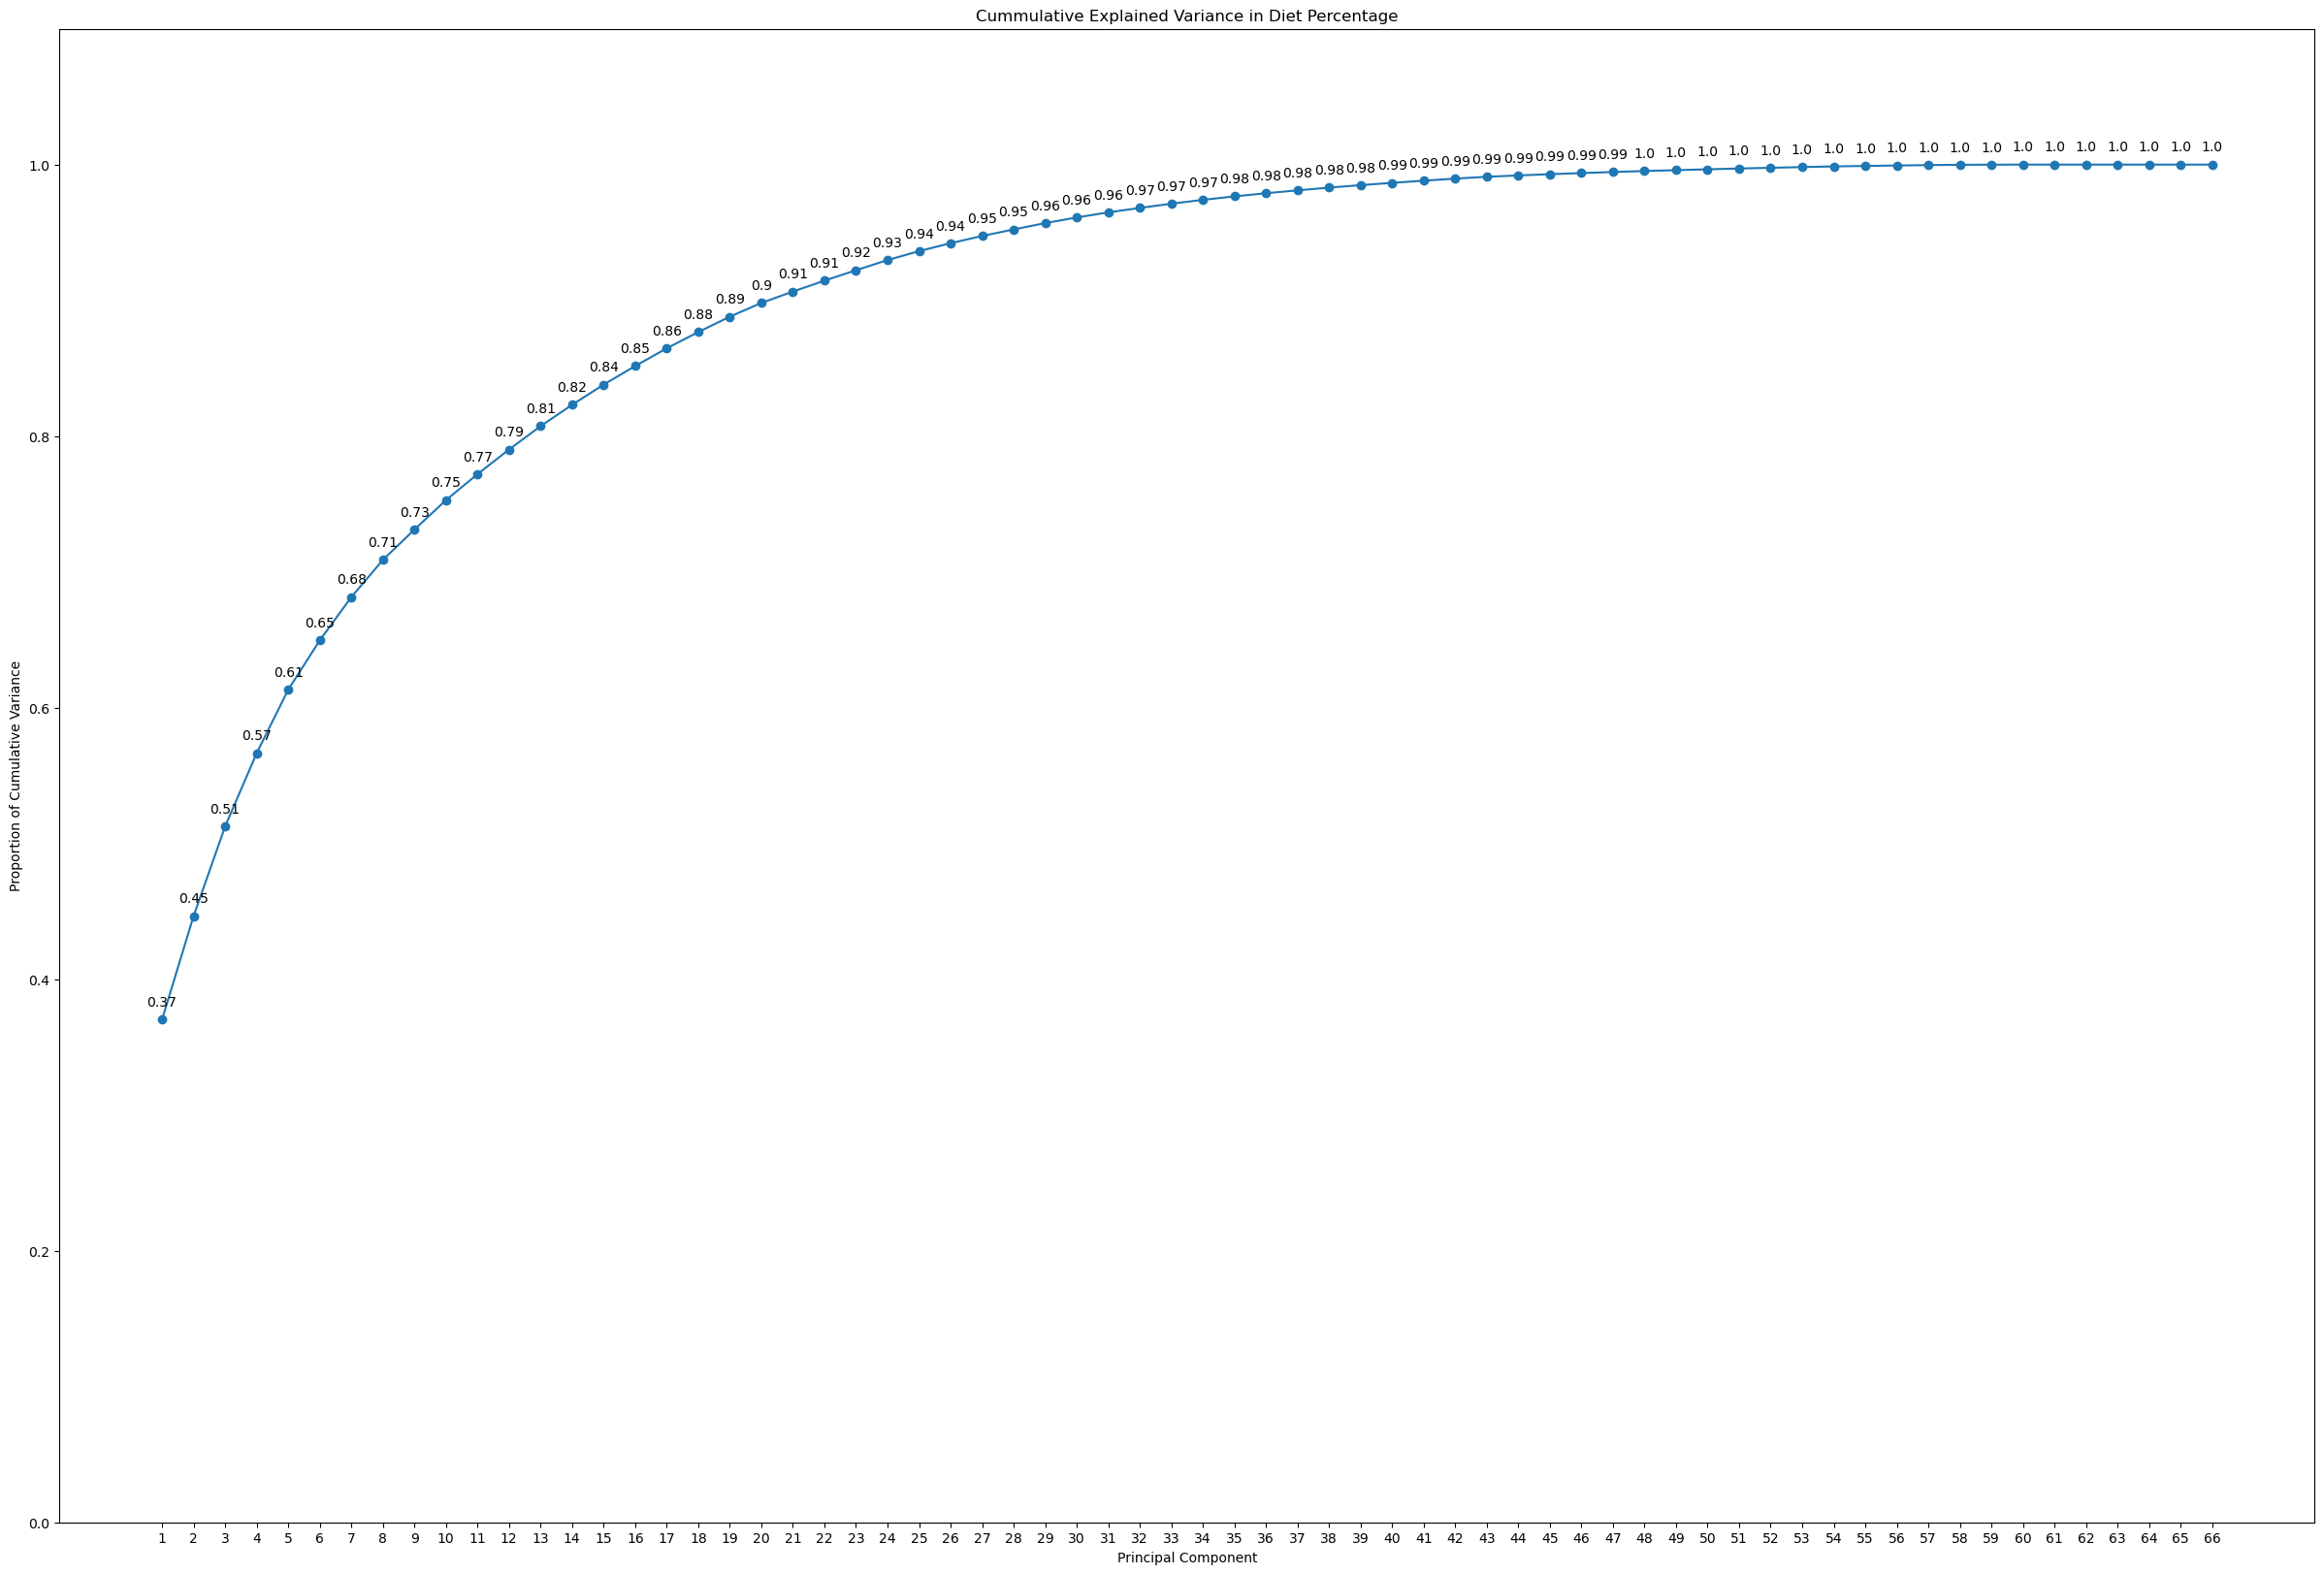

In [94]:
#Percentage of cummulative explained variance
#=========================================================================================#
cummulative_variance_proportions_diet = pca_model_diet.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 20))
ax.plot(
    np.arange(len(diet.columns)) + 1,
    cummulative_variance_proportions_diet,
    marker = 'o'
)

for x, y in zip(np.arange(len(diet.columns)) + 1, cummulative_variance_proportions_diet):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_model_diet.n_components_) + 1)
ax.set_title('Cummulative Explained Variance in Diet Percentage')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Cumulative Variance');
#fig.savefig('diet_PC_cumulative_variance_loadings.svg')

As we can see this graphic gives us the most information as even those components that had a $0$ in the previous graphic still collaborate to achieveing the description of $100\%$ of the variance, however for the purposes of this project we only need $95\%$ of the variance to be explained thus we have selected the cutoff to be the principal component ```'PC30'``` as from this point onwards the variance explained is less signifiant. After this we apply the ```transform()``` method to reduce the dimensionality of the space by using the space defined by the principal components.

In [95]:
#Proyection of the training observations
#=========================================================================================#
proyections_diet = pca_pipe_diet.transform(X=diet)
proyections_diet= pd.DataFrame(
    proyections_diet,
    columns = ['PC'+str(n) for n in range(1,67)],
    index   = diet.index
)
proyections_diet.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73568,7.017570,-3.273795,-0.074133,-1.346927,2.352919,1.739087,0.803818,1.498544,-1.579897,0.537749,-1.743691,0.310942,1.232707,-0.417993,0.776862,0.129492,-1.203304,-0.790301,0.524904,0.414986,0.859056,0.139535,-0.055222,-0.530639,1.359693,0.921417,-1.264493,0.151395,0.885283,0.474804,-0.173613,-0.154102,-0.123235,-0.321379,-0.055668,-0.441183,0.258071,0.349907,0.572624,0.423451,0.246808,-0.216359,-0.437701,-0.165156,0.214909,-0.152687,0.691015,0.343945,0.205596,0.085463,0.000207,0.364083,0.323615,-0.049426,-0.199708,-0.277747,-0.132780,0.029368,0.062801,0.032599,0.034194,0.000299,-0.018124,0.000194,0.001086,-0.000111
73574,15.295793,-1.813445,-0.632066,-0.401061,-1.304374,1.463741,-0.098886,1.803822,-0.888752,-0.140937,0.153316,1.566905,-0.828538,-0.028131,2.778467,0.996778,-2.056391,2.027317,0.440146,-0.425375,-0.767622,-0.410142,1.255664,0.629177,-0.431866,-1.222892,0.359332,1.154614,0.650284,-0.140406,-1.092145,-0.652907,0.942030,0.982476,-0.740921,0.103926,0.380831,-0.163167,-0.467757,0.033007,-0.001015,0.094757,0.742056,-0.257601,0.103771,-0.334987,-0.025231,-0.239084,-0.107426,-0.539266,-0.066061,0.231586,-0.307242,0.162589,-0.122023,0.137241,-0.103670,-0.282518,-0.182479,-0.025723,-0.068349,0.003103,0.005114,0.000276,-0.000178,-0.000796
73577,3.866665,-0.664077,-1.085325,2.228433,-2.386224,2.044908,0.029725,1.597081,-1.325737,-0.719254,-1.802668,0.484856,-1.614052,0.276579,1.586971,-0.782681,1.210563,1.144698,-0.073165,0.366355,-0.194715,0.631106,-0.195935,-0.102669,-0.401331,-0.039589,-1.458744,0.398321,-0.082326,-0.114102,-0.174744,-0.162715,0.242143,-0.644670,0.318534,-0.256834,0.287908,0.088624,0.356983,-0.416607,-0.506411,0.265945,-0.132582,-0.225890,-0.160631,-0.163461,0.512892,0.010913,-0.036615,-0.238297,-0.375967,0.016849,0.059250,0.078231,0.058266,0.211201,0.196344,-0.012626,-0.007481,-0.006664,-0.033535,0.001886,0.000078,-0.001240,-0.002270,0.002820
73580,-0.820472,0.363935,0.724202,-1.197861,-1.531288,-0.643896,0.120235,-1.151397,0.672672,-0.231363,0.786067,-0.085133,0.083420,0.155070,0.375743,-0.675322,0.884423,0.479187,0.277636,0.141805,0.612198,-0.154473,0.218418,0.239571,0.136570,0.081772,-0.551320,0.345169,-0.006539,0.082693,0.092744,-0.275787,-0.269014,0.022271,0.212320,-0.214800,-0.002464,0.416862,-0.226378,-0.199931,0.263111,-0.074612,-0.059372,0.550442,-0.098805,0.248237,-0.048147,0.053068,0.115597,0.173008,-0.181376,0.248334,0.071486,0.247455,0.045710,0.002246,-0.075812,-0.044977,0.091014,-0.046807,0.008749,0.011547,-0.001639,-0.002565,0.001132,-0.003399
73585,7.412887,10.159353,-2.425242,-2.560035,10.154544,7.959591,-2.033171,0.105210,2.459638,-1.970798,-2.353475,2.024840,-0.350553,1.342490,0.216745,0.074322,3.185479,2.723286,-1.284429,-0.741037,0.984598,-1.447529,1.520671,-1.590828,-0.783996,-2.447498,0.236601,-2.210687,3.393166,-0.888111,8.409994,-0.217744,4.250437,0.226797,-0.955350,-1.479791,0.608809,0.559278,-0.213966,-0.343400,-0.552731,0.173968,-0.079482,0.255965,0.231549,0.582358,0.152924,-0.357661,0.185436,-0.393901,-0.591367,-0.149129,-0.106696,0.281837,0.207587,-0.183480,-0.112151,-0.261350,-0.077548,0.010648,0.035876,-0.012432,-0.013029,-0.001686,-0.003106,-0.002400


Now from this point on we will drop every principal component after ```'PC30'```  and see how the data turns out

In [96]:
proyections_diet.drop(['PC'+str(n) for n in range(29,67)], axis ='columns', inplace = True)

In [97]:
proyections_diet.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73568,7.017570,-3.273795,-0.074133,-1.346927,2.352919,1.739087,0.803818,1.498544,-1.579897,0.537749,-1.743691,0.310942,1.232707,-0.417993,0.776862,0.129492,-1.203304,-0.790301,0.524904,0.414986,0.859056,0.139535,-0.055222,-0.530639,1.359693,0.921417,-1.264493,0.151395
73574,15.295793,-1.813445,-0.632066,-0.401061,-1.304374,1.463741,-0.098886,1.803822,-0.888752,-0.140937,0.153316,1.566905,-0.828538,-0.028131,2.778467,0.996778,-2.056391,2.027317,0.440146,-0.425375,-0.767622,-0.410142,1.255664,0.629177,-0.431866,-1.222892,0.359332,1.154614
73577,3.866665,-0.664077,-1.085325,2.228433,-2.386224,2.044908,0.029725,1.597081,-1.325737,-0.719254,-1.802668,0.484856,-1.614052,0.276579,1.586971,-0.782681,1.210563,1.144698,-0.073165,0.366355,-0.194715,0.631106,-0.195935,-0.102669,-0.401331,-0.039589,-1.458744,0.398321
73580,-0.820472,0.363935,0.724202,-1.197861,-1.531288,-0.643896,0.120235,-1.151397,0.672672,-0.231363,0.786067,-0.085133,0.083420,0.155070,0.375743,-0.675322,0.884423,0.479187,0.277636,0.141805,0.612198,-0.154473,0.218418,0.239571,0.136570,0.081772,-0.551320,0.345169
73585,7.412887,10.159353,-2.425242,-2.560035,10.154544,7.959591,-2.033171,0.105210,2.459638,-1.970798,-2.353475,2.024840,-0.350553,1.342490,0.216745,0.074322,3.185479,2.723286,-1.284429,-0.741037,0.984598,-1.447529,1.520671,-1.590828,-0.783996,-2.447498,0.236601,-2.210687


Now to see how well it worked we will reconstruct the data and see how similar it is to the original data

In [98]:
pca_pipe_28 = make_pipeline(PCA(n_components=28))
pca_pipe_28.fit(diet)
reconstruction_diet = pca_pipe_28.inverse_transform(proyections_diet)

In [99]:
# Recostruction of the data 
#=========================================================================================#
reconstruction_diet = pd.DataFrame(
                    reconstruction_diet,
                    columns = diet.columns,
                    index   = diet.index
)
print('Reconstructed Values')
display(reconstruction_diet.head())

print('Original Values')
display(diet.head())

Reconstructed Values


,energy_intake_kcal,total_protein_g,total_carbohydrate_g,total_sugar_g,total_dietary_fiber_g,total_fat_g,saturated_fat_g,monounsaturated_fat_g,polyunsaturated_fat_g,cholesterol_mg,alpha_tocopherol_mg,total_alpha_tocopherol_iu,retinol_µg,vitamin_a_rae_µg,alpha_carotene_µg,beta_carotene_µg,beta_cryptoxanthin_µg,lycopene_µg,lutein_zeaxanthin_µg,thiamin_b1_mg,riboflavin_b2_mg,niacin_mg,vitamin_b6_mg,total_folate_µg,folate_food_source_µg,folate_fortified_µg,dietary_folate_equivalents_µg,choline_mg,vitamin_b12_µg,bioavailable_vitamin_b12_µg,vitamin_c_mg,vitamin_d_µg,vitamin_k_µg,calcium_mg,phosphorus_mg,magnesium_mg,iron_mg,zinc_mg,copper_mg,sodium_mg,potassium_mg,selenium_µg,caffeine_mg,theobromine_mg,alcohol_g,moisture_g,saturated_fatty_acid_4_0_g,saturated_fatty_acid_6_0_g,saturated_fatty_acid_8_0_g,saturated_fatty_acid_10_0_g,saturated_fatty_acid_12_0_g,saturated_fatty_acid_14_0_g,saturated_fatty_acid_16_0_g,saturated_fatty_acid_18_0_g,monounsaturated_fatty_acid_16_1_g,monounsaturated_fatty_acid_18_1_g,monounsaturated_fatty_acid_20_1_g,monounsaturated_fatty_acid_22_1_g,polyunsaturated_fatty_acid_18_2_g,polyunsaturated_fatty_acid_18_3_g,polyunsaturated_fatty_acid_18_4_g,polyunsaturated_fatty_acid_20_4_g,polyunsaturated_fatty_acid_20_5_g,polyunsaturated_fatty_acid_22_5_g,polyunsaturated_fatty_acid_22_6_g,water_g
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73568,0.745331,0.564423,-0.196711,-0.523032,1.484572,1.668740,2.059130,1.440793,1.062014,1.115023,0.876839,-0.040411,0.982787,1.322782,1.292689,0.816097,0.463933,1.001970,-0.204538,-0.183308,1.005707,-0.159335,0.108989,0.014514,-1.088282,1.409440,-0.369272,1.207356,0.801972,0.120276,0.010998,0.561613,-0.116281,1.759920,1.243980,1.238304,0.069144,1.006532,1.510690,0.726640,1.253134,0.205158,0.295108,-0.101484,0.363365,2.081238,2.004431,2.036689,2.667901,2.437212,2.165475,2.432589,1.734193,1.660723,1.261226,1.299857,0.177405,-0.095430,1.041030,1.297938,-0.248312,0.458218,-0.165496,-0.397457,-0.206166,-0.458784
73574,2.642819,3.422826,1.801862,1.329805,1.759250,2.980772,2.928330,2.891497,2.225739,1.315585,1.814548,-0.564657,0.742617,0.516590,-0.029586,0.042056,-0.416049,-0.153234,0.343239,2.189754,2.816745,2.157880,1.388727,1.845891,0.921161,2.089466,1.596645,2.082547,1.452227,-0.007406,0.150053,1.101233,0.521879,3.187170,3.534030,3.223085,1.839840,3.168031,2.062913,2.213599,3.196318,2.840656,4.464487,-0.263460,-0.376920,1.694816,2.481283,2.540242,1.942220,2.449185,0.665219,2.723874,2.948494,2.746439,2.406551,2.764781,1.292214,-0.093248,2.275559,1.626402,-0.188646,1.121921,-0.474427,0.818437,-0.387477,1.011710
73577,0.660212,0.972782,0.634843,0.445064,1.148749,0.613014,1.049746,0.622593,-0.251305,-0.018196,-0.425874,-0.221861,-0.376747,-0.526269,-0.232957,-0.371983,-0.513010,-0.112121,-0.371647,0.364531,1.677163,1.966246,2.137430,0.295644,-0.237779,0.821548,0.121707,0.146044,2.320510,2.294208,-0.794129,-0.642623,-0.438305,1.051894,0.794976,0.526671,0.736746,1.554085,0.565111,0.695491,0.340680,0.357556,0.537807,-0.410393,-0.427718,0.911997,0.782497,0.563854,0.163660,0.602368,-0.216060,1.149284,0.993283,1.193607,1.650323,0.400931,-0.417027,-0.236519,-0.264781,-0.002949,-0.170478,-0.192886,-0.423645,-0.053916,-0.625341,2.088606
73580,0.091266,-0.094054,0.179028,0.240876,0.129768,0.222266,-0.022870,0.329370,0.328877,-0.176269,-0.233171,-0.266747,-0.686202,-0.749430,-0.255378,-0.397948,-0.387605,-0.612689,-0.290026,-0.212612,-0.618236,-0.298278,-0.297871,0.033390,0.056683,-0.013206,0.042956,-0.160689,-0.322160,-0.313016,-0.218741,-0.422273,-0.106832,-0.559379,-0.271276,-0.281318,0.300677,0.330936,-0.144855,-0.092526,-0.161988,-0.320849,-0.460688,0.981774,-0.343976,-0.649436,-0.785704,-0.872612,-0.756747,-0.813720,-0.368032,-0.535153,0.120311,0.252500,0.343988,0.309059,0.195715,0.781150,0.322325,0.432433,-0.267871,0.020626,-0.143503,-0.081032,-0.226515,-0.487282
73585,0.207751,3.088267,-0.585821,-1.283497,2.114126,-0.061207,-0.178652,0.400739,-0.710133,2.958461,

Original Values


,energy_intake_kcal,total_protein_g,total_carbohydrate_g,total_sugar_g,total_dietary_fiber_g,total_fat_g,saturated_fat_g,monounsaturated_fat_g,polyunsaturated_fat_g,cholesterol_mg,alpha_tocopherol_mg,total_alpha_tocopherol_iu,retinol_µg,vitamin_a_rae_µg,alpha_carotene_µg,beta_carotene_µg,beta_cryptoxanthin_µg,lycopene_µg,lutein_zeaxanthin_µg,thiamin_b1_mg,riboflavin_b2_mg,niacin_mg,vitamin_b6_mg,total_folate_µg,folate_food_source_µg,folate_fortified_µg,dietary_folate_equivalents_µg,choline_mg,vitamin_b12_µg,bioavailable_vitamin_b12_µg,vitamin_c_mg,vitamin_d_µg,vitamin_k_µg,calcium_mg,phosphorus_mg,magnesium_mg,iron_mg,zinc_mg,copper_mg,sodium_mg,potassium_mg,selenium_µg,caffeine_mg,theobromine_mg,alcohol_g,moisture_g,saturated_fatty_acid_4_0_g,saturated_fatty_acid_6_0_g,saturated_fatty_acid_8_0_g,saturated_fatty_acid_10_0_g,saturated_fatty_acid_12_0_g,saturated_fatty_acid_14_0_g,saturated_fatty_acid_16_0_g,saturated_fatty_acid_18_0_g,monounsaturated_fatty_acid_16_1_g,monounsaturated_fatty_acid_18_1_g,monounsaturated_fatty_acid_20_1_g,monounsaturated_fatty_acid_22_1_g,polyunsaturated_fatty_acid_18_2_g,polyunsaturated_fatty_acid_18_3_g,polyunsaturated_fatty_acid_18_4_g,polyunsaturated_fatty_acid_20_4_g,polyunsaturated_fatty_acid_20_5_g,polyunsaturated_fatty_acid_22_5_g,polyunsaturated_fatty_acid_22_6_g,water_g
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73568,0.723777,0.961449,-0.343791,-0.448531,1.869086,1.612724,2.115162,1.405165,0.829136,1.156851,0.854789,-0.242746,1.133228,1.389800,1.155284,0.786184,0.459616,0.952078,-0.008727,0.199398,0.434683,-0.278697,0.344383,-0.182948,-0.917992,0.843617,-0.445959,1.310180,0.668745,0.405477,-0.030223,0.224048,-0.250187,1.690101,1.053880,1.661586,0.037677,1.135565,1.687489,0.325861,1.229694,-0.032694,0.452044,-0.111283,0.486484,2.169784,2.446048,1.724368,2.704346,2.501537,2.034025,2.615228,1.812292,1.421777,1.196425,1.103041,0.529381,-0.148809,0.701750,1.984113,-0.307903,0.611952,-0.248008,-0.297702,-0.042015,-0.574173
73574,2.886068,3.581348,2.076406,0.966826,1.726486,3.085460,2.900647,3.162630,2.068724,1.374542,1.545819,-0.242746,0.476877,0.407260,-0.160894,0.154594,-0.450456,-0.155329,0.306654,2.955667,2.790423,2.436416,1.745507,1.692171,0.756055,2.029493,1.434631,2.097267,1.176593,-0.315855,-0.128944,1.802011,0.624333,2.647581,2.876315,2.471855,2.131022,3.171341,2.307766,1.785182,3.917505,2.789582,4.400415,-0.422196,-0.378142,1.848329,2.399078,2.894522,2.524086,2.068115,0.406192,2.651897,3.070471,2.911334,2.139805,3.342884,0.699678,-0.159595,2.097476,1.780605,-0.307903,1.023847,-0.150338,0.502560,-0.281637,1.097206
73577,0.766568,1.071844,0.751063,0.351201,1.494760,0.650911,1.113457,0.599125,-0.288078,0.150968,-0.384935,-0.242746,-0.399091,-0.518466,-0.236165,-0.338756,-0.525668,-0.140316,-0.374338,0.185488,1.974177,2.189035,1.872882,0.263344,-0.148315,0.648008,0.125874,0.037873,1.998589,2.415747,-0.685368,-0.540019,-0.395204,1.020461,1.015937,0.601577,0.702852,1.553227,0.241369,0.395618,0.052115,0.576538,0.516579,-0.422196,-0.378142,0.984275,1.191551,-0.123731,0.257487,0.348807,-0.260703,1.504391,0.955369,1.339213,1.664746,0.305910,-0.386698,-0.321386,-0.302295,0.038288,-0.307903,-0.299620,-0.265767,-0.326283,-0.346989,2.041226
73580,0.091507,-0.040419,0.199115,0.299703,-0.207528,0.193158,-0.094922,0.382985,0.319438,-0.243128,-0.282801,-0.242746,-0.805879,-0.800863,-0.216093,-0.364966,-0.390286,-0.554332,-0.290014,-0.172211,-0.540902,-0.339610,-0.392487,0.031549,-0.105021,0.183438,-0.010505,-0.448205,-0.246031,-0.315855,-0.171822,-0.423748,-0.142369,-0.549985,-0.285971,0.163144,0.650681,0.325194,-0.038294,-0.216519,-0.577269,-0.324420,-0.504248,1.024746,-0.378142,-0.626409,-0.789029,-0.721191,-0.700560,-0.756315,-0.448785,-0.512911,0.164832,-0.052086,0.507982,0.146296,0.335595,0.757221,0.280816,0.593830,-0.225226,0.321599,-0.212492,-0.069056,-0.270745,-0.574173
73585,0.171851,3.796145,-0.706911,-0.790783,2.858374,-0.135768,-0.383141,-0.134834,0.007211,1.704

After having seen this we see that the reconstruction was pretty accurate and we analyze the pca reduction of the ```labs``` dataframe. First we view the loadings for each component in the reduction of this data frame

In [100]:
# We turn the model into a dataframe to add a name to the axes
#=========================================================================================#
labs_loadings = pd.DataFrame(
    data    = pca_model_labs.components_,
    columns = labs.columns,
    index   = ['PC'+str(n) for n in range(1,len(labs.columns)+1)]
)
labs_loadings.head()

,urine_uric_acid_mcg_dl,urine_uric_acid_sugar_ratio,urine_creatinine_mg_dl,serum_creatinine_mg_dl,urine_albumin_mg_g,white_blood_cell_count_cells_per_uL,lymphocyte_percentage_of_total_wbc,monocyte_percentage_of_total_wbc,neutrophil_percentage_of_total_wbc,eosinophil_percentage_of_total_wbc,basophil_percentage_of_total_wbc,absolute_lymphocyte_count_cells_per_uL,absolute_monocyte_count_cells_per_uL,absolute_neutrophil_count_cells_per_uL,absolute_eosinophil_count_cells_per_uL,absolute_basophil_count_cells_per_uL,red_blood_cell_count_million_cells_uL,hemoglobin_concentration_g_dl,hematocrit_percentage,mean_corpuscular_volume_fL,mean_corpuscular_hemoglobin_pg,mean_cell_hemoglobin_concentration_g_dl,red_cell_distribution_width_percentage,platelet_count_cells_per_uL,mean_platelet_volume_fL,fasting_hours_before_lab_visit,fasting_minutes_before_lab_visit,hemoglobin_a1c_percentage,hepatitis_b_surface_antigen,urine_volume_ml
PC1,0.086377,0.086377,0.016222,0.016222,0.073548,0.348592,-0.217034,-0.173772,0.252495,-0.102131,-0.059563,0.129164,0.173072,0.356994,0.023601,0.118433,-0.120628,-0.311703,-0.282407,-0.249997,-0.282022,-0.227952,0.259734,0.224239,-0.015466,-0.076926,0.019849,-0.014991,0.016938,-0.060492
PC2,0.071189,0.071189,0.035484,0.035484,0.061216,-0.302926,0.339470,0.099407,-0.347143,0.104664,0.146167,0.012963,-0.205416,-0.351616,-0.005201,-0.030831,-0.082901,-0.287267,-0.247585,-0.254295,-0.297335,-0.259734,0.249086,0.037859,-0.022599,0.063961,0.023590,0.023136,-0.030847,-0.074560
PC3,0.527055,0.527055,0.183060,0.183060,0.494886,0.042799,0.019894,0.043098,-0.055012,0.122962,0.070183,0.061516,0.077010,0.010520,0.132721,0.095504,0.083166,0.131261,0.126244,0.067234,0.077811,0.067850,-0.049521,0.021094,-0.002401,0.030553,0.029343,0.024154,0.025182,-0.087155
PC4,0.187197,0.187197,-0.166191,-0.166191,0.201489,-0.164898,-0.107436,-0.112172,0.184416,-0.282184,-0.186220,-0.270233,-0.257030,-0.048681,-0.336698,-0.265394,-0.344553,-0.206835,-0.241289,0.176400,0.161946,0.056877,-0.088896,-0.118545,0.023737,-0.008111,0.006788,-0.036932,-0.067933,-0.016774
PC5,-0.011519,-0.011519,0.409830,0.409830,-0.078556,-0.104193,-0.153816,0.069901,0.172241,-0.223964,-0.175983,-0.266142,-0.058009,-0.003110,-0.261981,-0.215253,0.289552,0.124462,0.173461,-0.193801,-0.206361,-0.135820,0.123753,-0.170932,0.118783,0.082973,0.013885,0.020302,0.003237,-0.155292


We then create a heatmap with the loadings of each of the variables to see how correlated each variable is to each of the principal components.

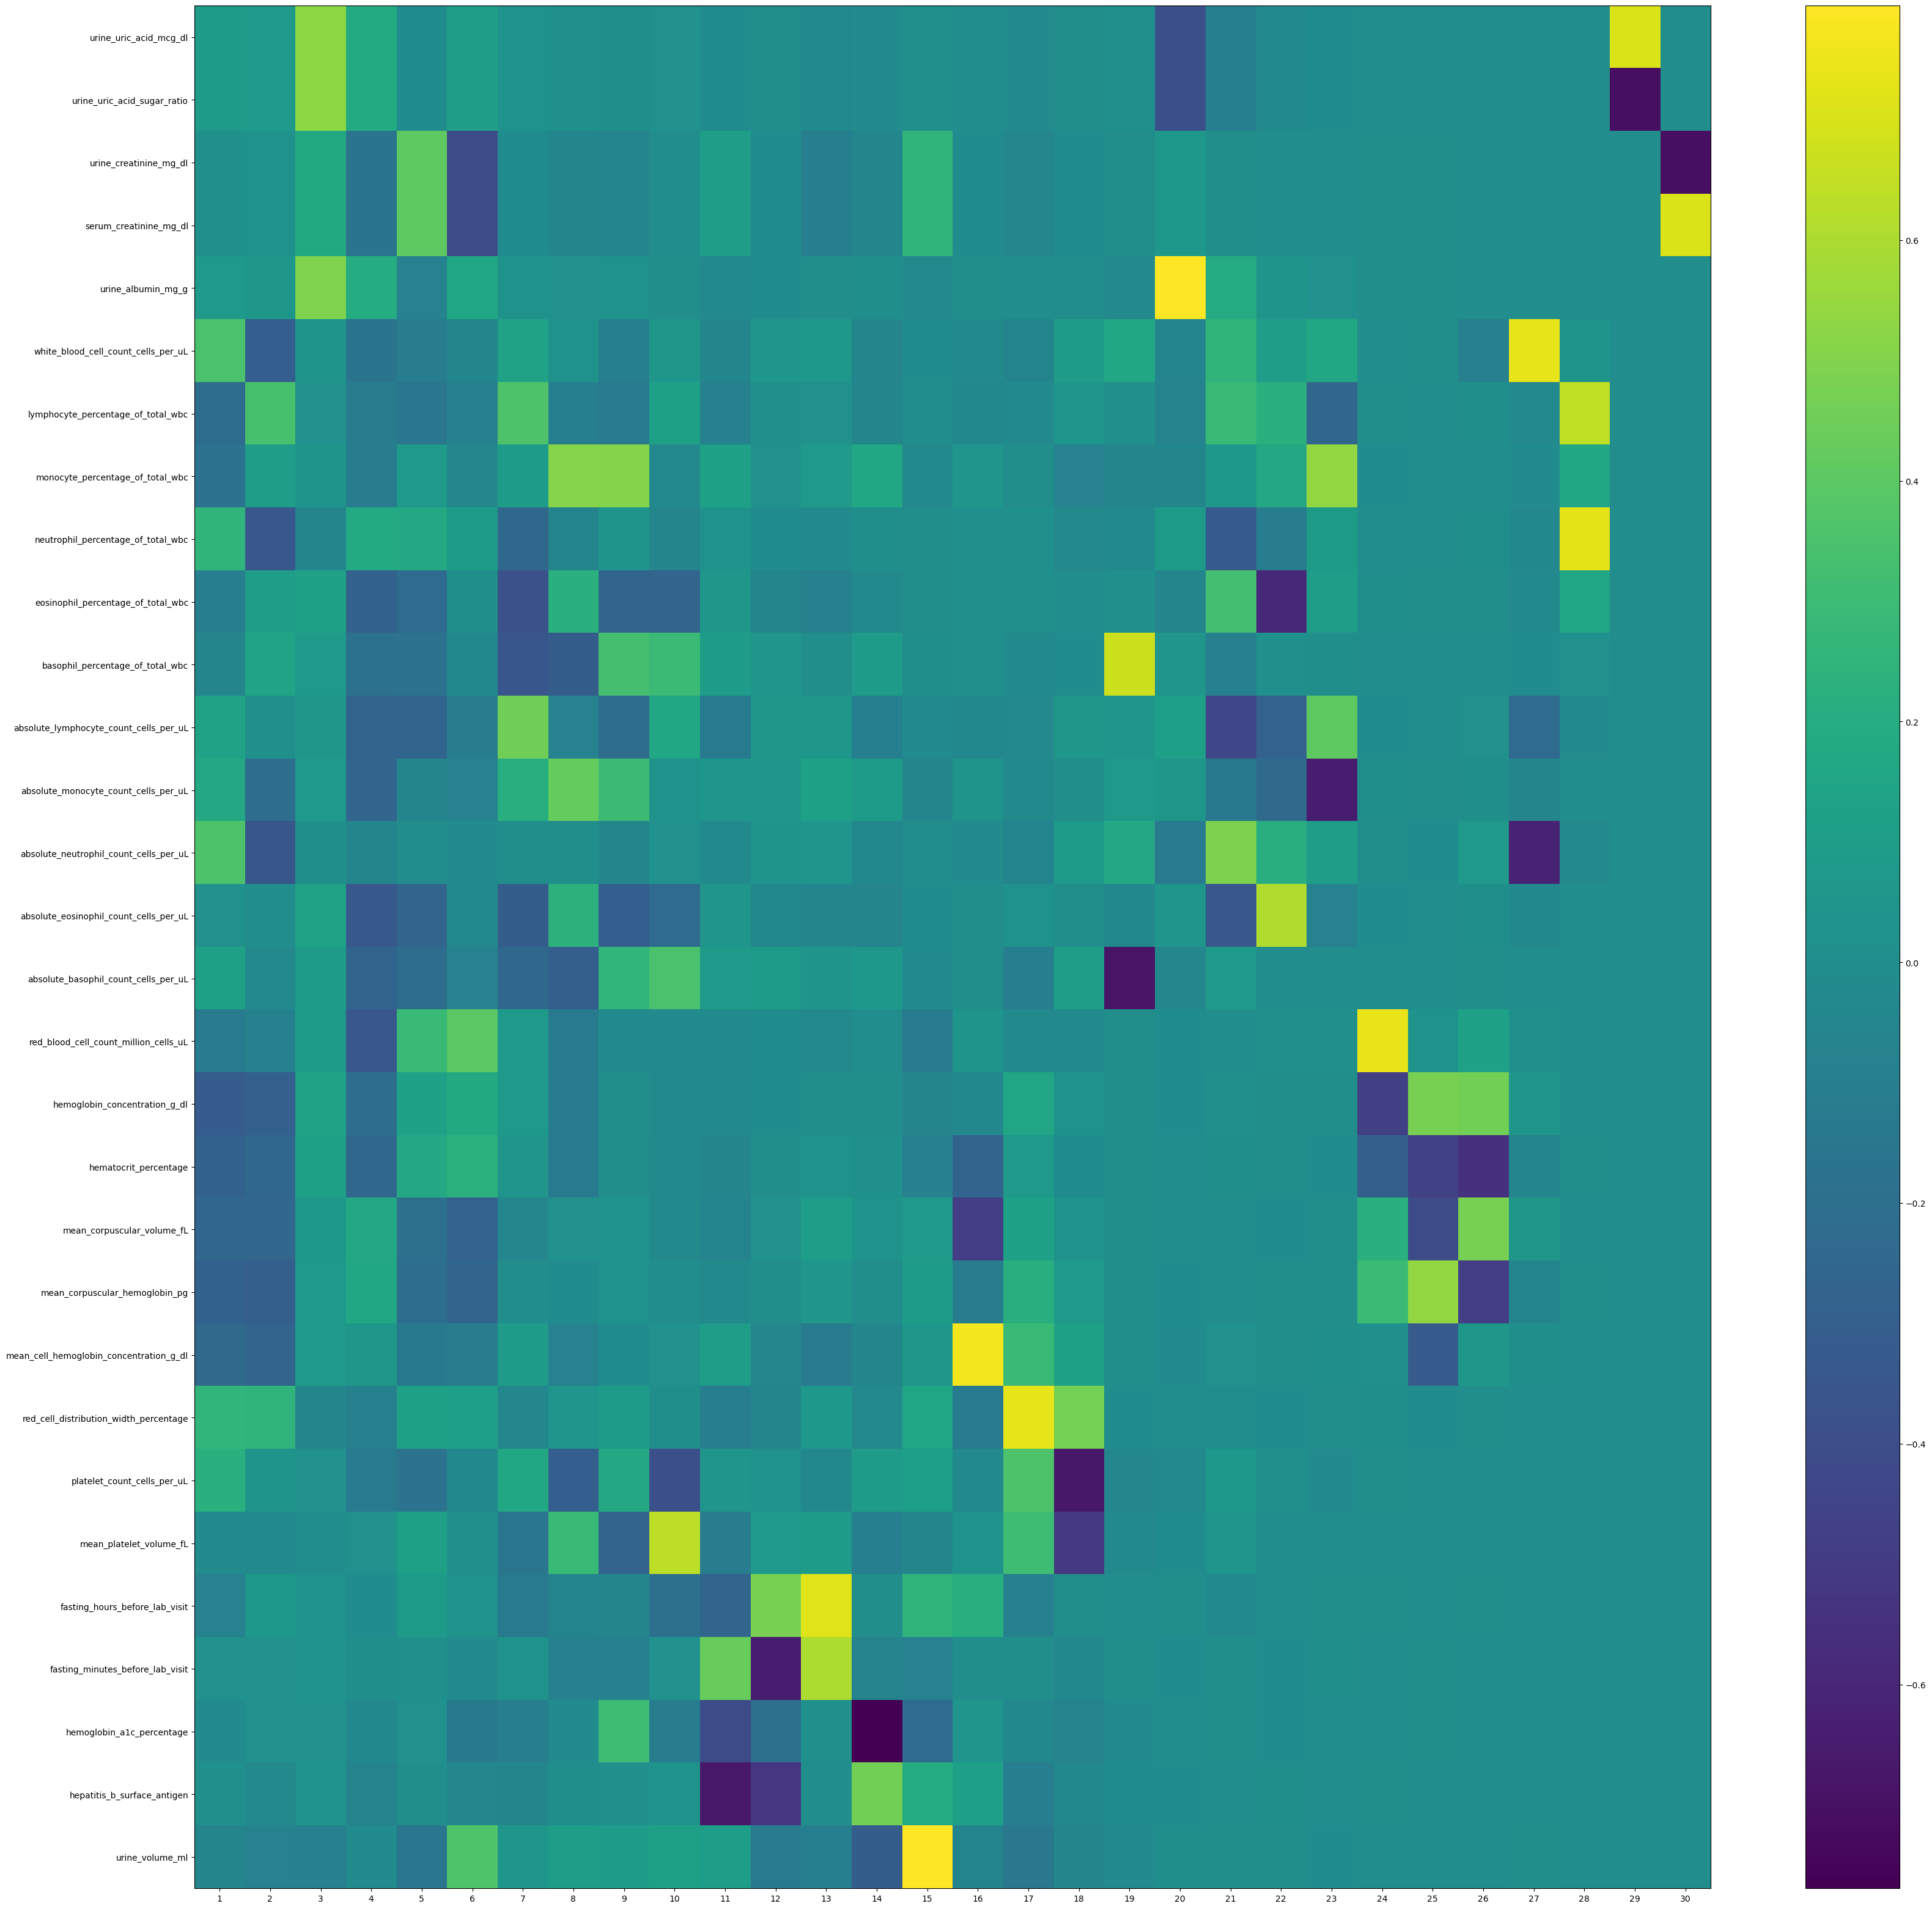

In [101]:
# Heatmap components
#=========================================================================================#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(40, 40))
labs_components = pca_model_labs.components_
plt.imshow(labs_components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(labs.columns)), labs.columns)
plt.xticks(range(len(labs.columns)), np.arange(pca_model_labs.n_components_) + 1)
plt.grid(False)
plt.colorbar();
#fig.savefig('labs_loadings_heatmap.svg')

From this heatmap we can also conclude that all of the principal components are only lightly correlated to each of the principal components with most of the loadings being really close to $0$, it should also be noted that despite not being mentioned befoore both of these processes have been standard PCAs, meaning that $$\sum_{i=1} ^{n} \phi_{m,i}^2 = 1$$ and $$\sum_{i=1} ^{m} \phi_{i,n}^2 = 1$$
thus explaining why the maximum values of the loadings are around $0.8$ and most hover around $0$. We now want to plot the values of the variance explained by each of the principal components in a barplot

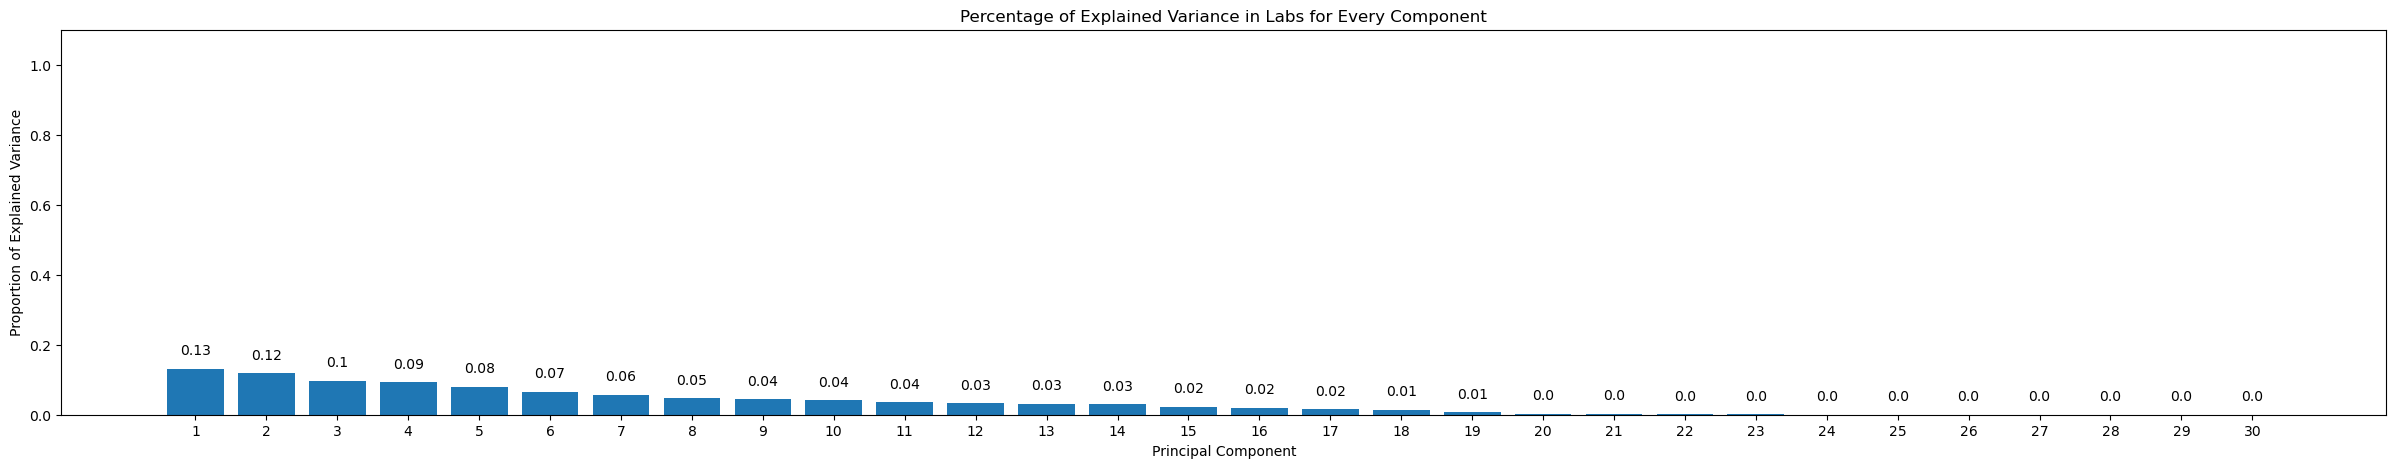

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 5))
ax.bar(
    x      = np.arange(pca_model_labs.n_components_) + 1,
    height = pca_model_labs.explained_variance_ratio_
)

for x, y in zip(np.arange(len(labs.columns)) + 1, pca_model_labs.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca_model_labs.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage of Explained Variance in Labs for Every Component')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Explained Variance');
#fig.savefig('labs_PC_variance.svg')

As we can see here there are also a lot of principal components that do not contribute to the explanation of the variance, however as mentioned before, this graphic doesn't tell us the whole story, thus requiring us to plot the accumulated explained variance.

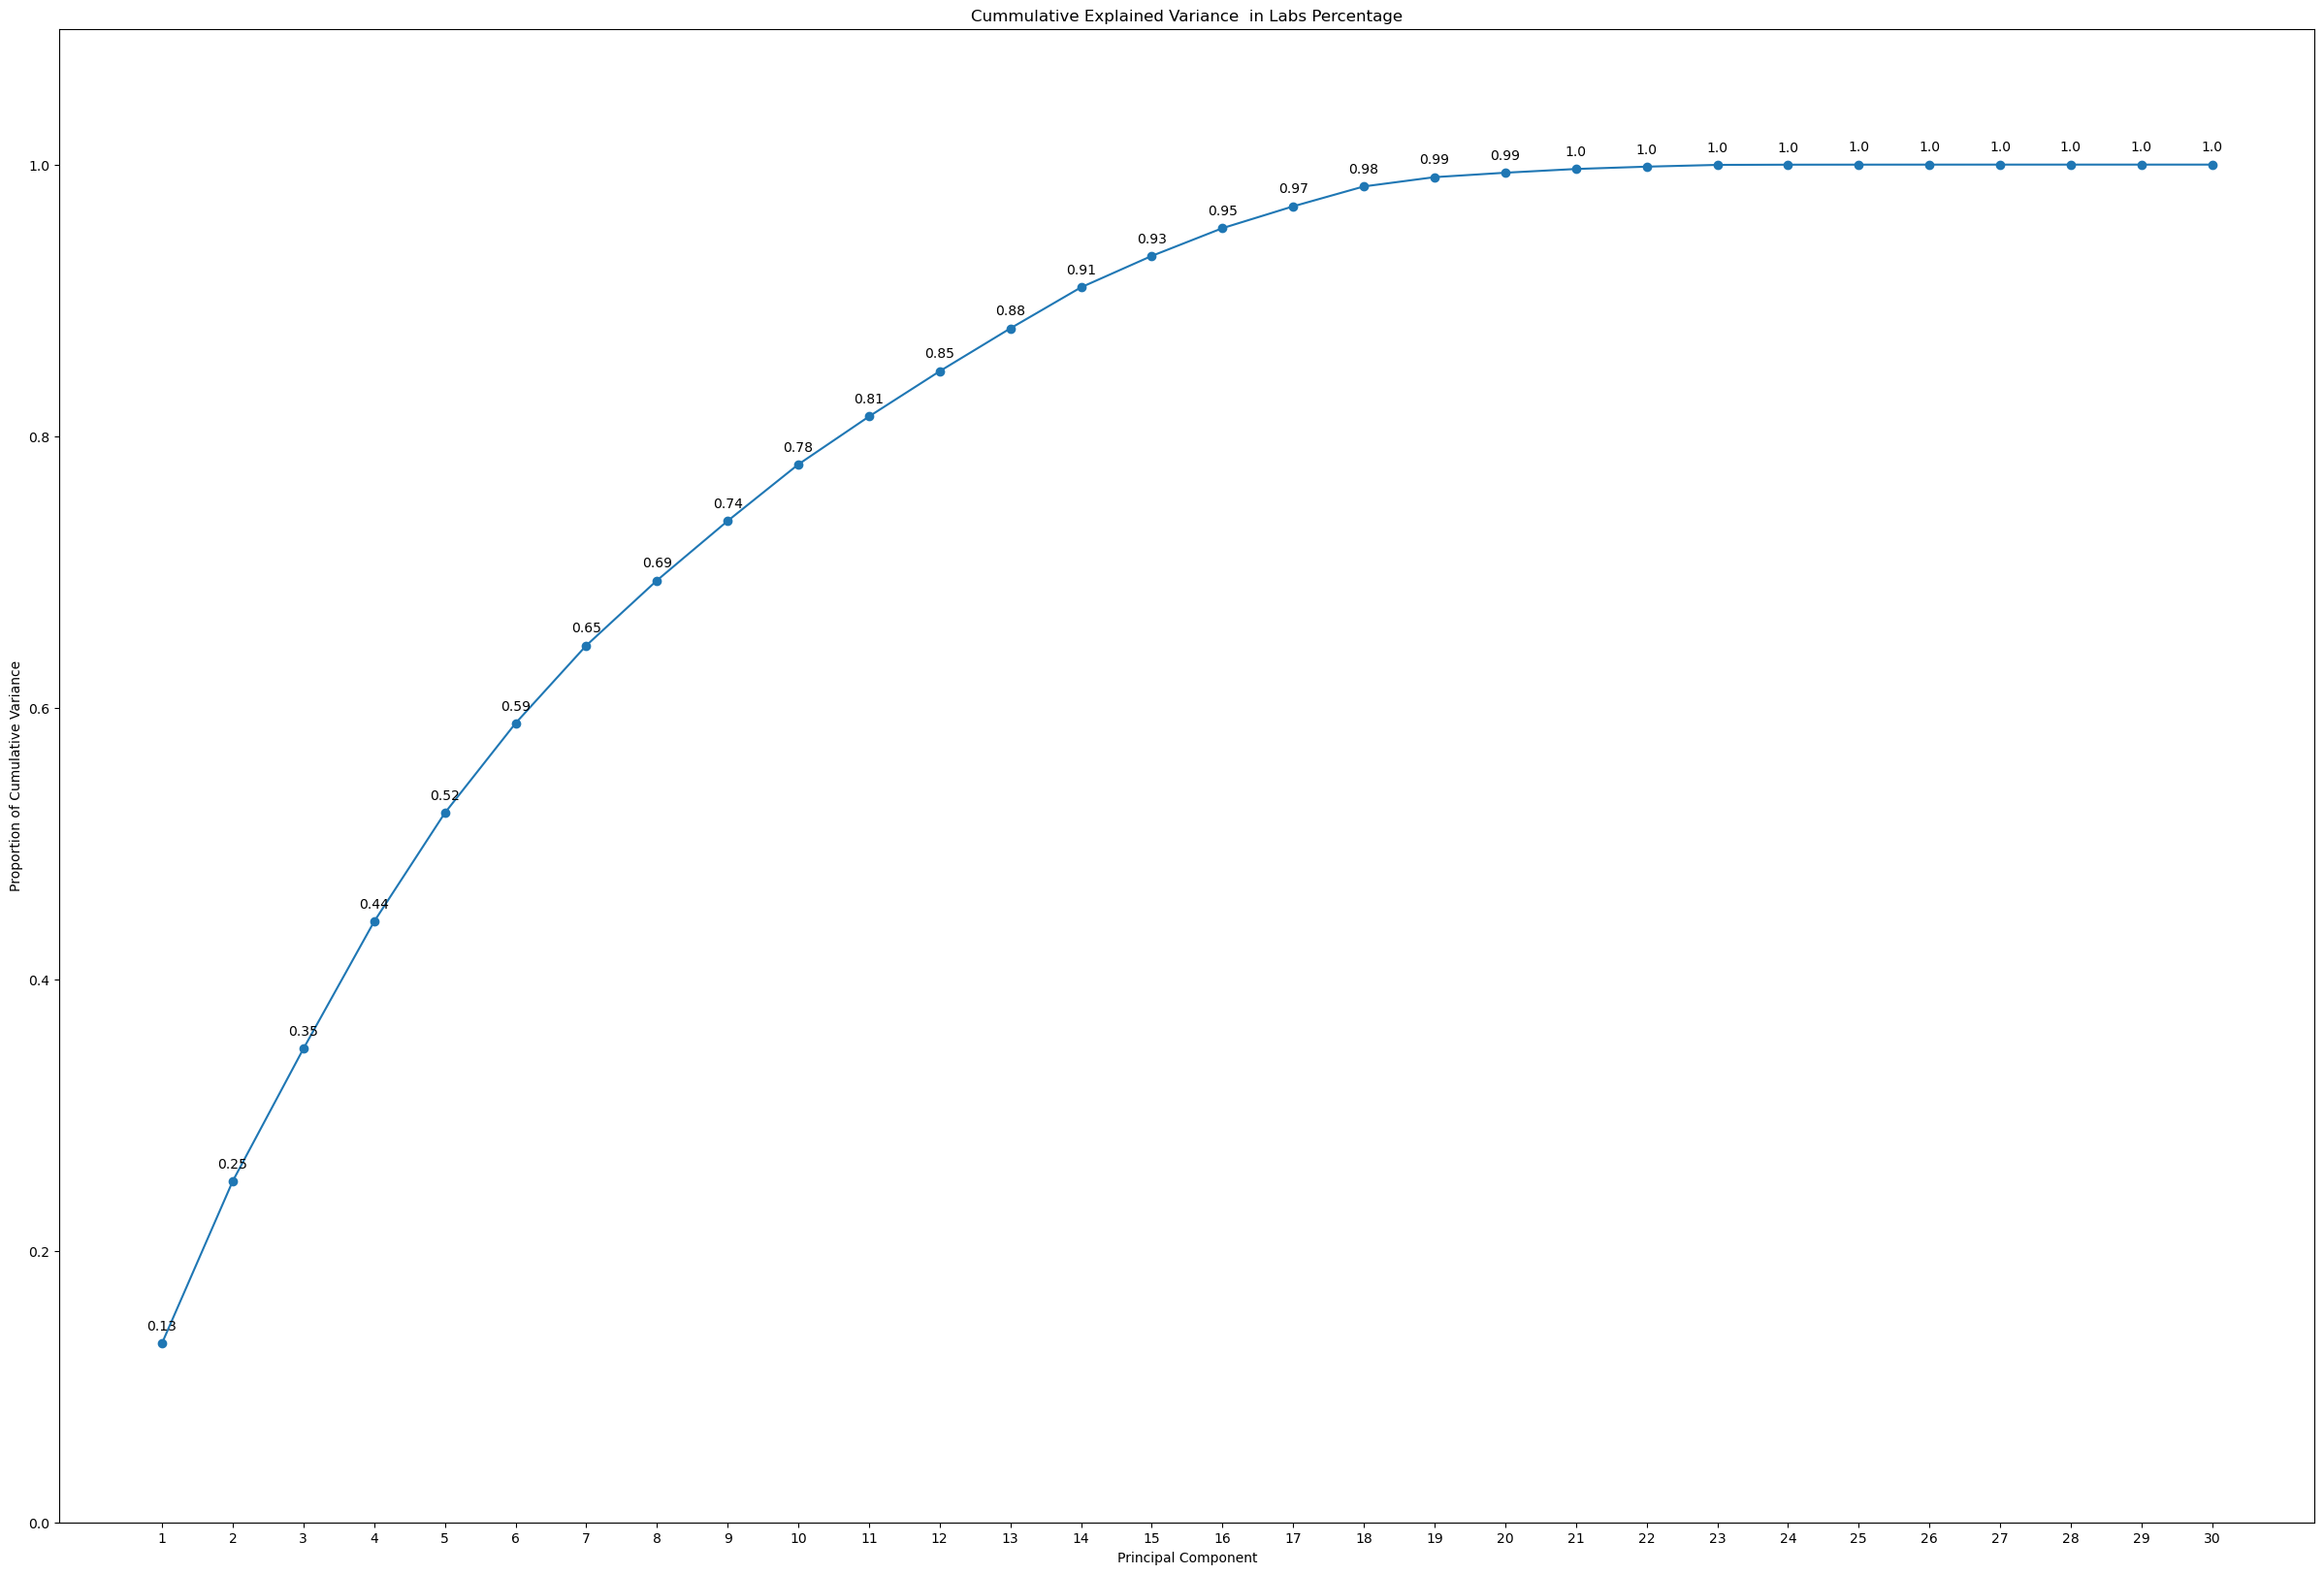

In [103]:
#Percentage of cummulative explained variance
#=========================================================================================#
cummulative_variance_proportions_labs = pca_model_labs.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 20))
ax.plot(
    np.arange(len(labs.columns)) + 1,
    cummulative_variance_proportions_labs,
    marker = 'o'
)

for x, y in zip(np.arange(len(labs.columns)) + 1, cummulative_variance_proportions_labs):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_model_labs.n_components_) + 1)
ax.set_title('Cummulative Explained Variance  in Labs Percentage')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proportion of Cumulative Variance');
#fig.savefig('labs_PC_cumulative_variance.svg')

This graphic again provides us with more information than the last graph, helping us find the principal component at which the $95\%$ of the data accumulates and allowing gus to drop any principal components beyond those. In this case the one at which $95\%$ of the data accumulated being ```PC17```. Now we use the ```transform()``` method to obtain the proyections of the data on the space defined by the principal components and drop the unnecessary components 

In [104]:
#Proyection of the training observations
#=========================================================================================#
proyections_labs = pca_pipe_labs.transform(X=labs)
proyections_labs= pd.DataFrame(
    proyections_labs,
    columns = ['PC'+str(n) for n in range(1,len(labs.columns)+ 1)],
    index   = labs.index
)
proyections_labs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73568,-0.986701,-1.538197,-0.383685,2.700198,0.328988,2.542991,-0.524744,-0.050914,0.407870,0.512807,1.557588,0.103902,1.362095,0.049491,0.980210,-0.309183,0.480766,-0.713720,0.315132,0.656073,-0.107897,-0.207505,-0.028049,-0.032860,0.011077,0.012149,-0.009623,0.010582,-3.249372e-16,4.667110e-16
73574,1.394351,2.545251,-1.409623,2.012320,2.417756,0.381902,-1.386427,0.414571,-0.116074,0.459855,0.379132,0.372295,-2.084905,-1.089689,-0.891901,0.777205,0.240777,-0.446413,-0.158034,0.163520,-0.320606,0.161890,0.065342,-0.093814,0.002767,0.000554,-0.005302,0.004584,5.429678e-16,1.224122e-15
73577,-1.090584,0.298941,0.691969,-1.842393,0.135103,-0.128701,2.240424,-0.325780,-0.257047,-1.501952,-0.909740,1.397735,-0.303764,1.568122,0.895870,1.008375,-0.045377,-0.408494,0.467751,0.006923,-0.007046,-0.113487,0.095383,0.006796,-0.014443,0.004064,0.047695,0.006445,-3.691318e-16,-6.919732e-17
73580,-0.669392,2.797579,0.367190,-2.445245,-1.228948,-0.056685,-4.370512,0.512991,0.147091,-0.125786,-1.024711,0.459368,-0.628927,0.397824,-0.604902,-0.228325,-0.706628,-0.073292,0.997813,-0.009338,0.324293,-0.718290,-0.007313,-0.021783,-0.008701,0.022606,-0.006328,-0.020698,1.818164e-16,8.958330e-16
73585,-1.046513,-0.570388,-0.685068,-0.469979,1.703239,3.232132,1.468809,0.497611,-0.396683,0.345382,1.825462,-0.636115,0.248009,-0.252229,0.401010,-0.964702,-0.331868,-0.329513,-0.325721,-0.006652,-0.025203,0.057474,-0.023654,0.048892,-0.024149,-0.035723,-0.007149,0.002831,5.399648e-16,-7.697813e-17


Now we drop every principal component after ```PC17```

In [105]:
proyections_labs.drop(['PC'+str(n) for n in range(18,len(labs.columns)+ 1)], axis ='columns', inplace = True)

In [106]:
proyections_labs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
SEQN,,,,,,,,,,,,,,,,,
73568,-0.986701,-1.538197,-0.383685,2.700198,0.328988,2.542991,-0.524744,-0.050914,0.407870,0.512807,1.557588,0.103902,1.362095,0.049491,0.980210,-0.309183,0.480766
73574,1.394351,2.545251,-1.409623,2.012320,2.417756,0.381902,-1.386427,0.414571,-0.116074,0.459855,0.379132,0.372295,-2.084905,-1.089689,-0.891901,0.777205,0.240777
73577,-1.090584,0.298941,0.691969,-1.842393,0.135103,-0.128701,2.240424,-0.325780,-0.257047,-1.501952,-0.909740,1.397735,-0.303764,1.568122,0.895870,1.008375,-0.045377
73580,-0.669392,2.797579,0.367190,-2.445245,-1.228948,-0.056685,-4.370512,0.512991,0.147091,-0.125786,-1.024711,0.459368,-0.628927,0.397824,-0.604902,-0.228325,-0.706628
73585,-1.046513,-0.570388,-0.685068,-0.469979,1.703239,3.232132,1.468809,0.497611,-0.396683,0.345382,1.825462,-0.636115,0.248009,-0.252229,0.401010,-0.964702,-0.331868


To see how well this worked we reconstruct the original data frame using the Principal Components that we kept.

In [107]:
pca_pipe_17 = make_pipeline(PCA(n_components=17))
pca_pipe_17.fit(labs)
reconstruction_labs = pca_pipe_17.inverse_transform(proyections_labs)

In [108]:
# Recostruction of the data 
#=========================================================================================#
reconstruction_labs = pd.DataFrame(
                    reconstruction_labs,
                    columns = labs.columns,
                    index   = labs.index
)
print('Reconstructed Values')
display(reconstruction_labs.head())

print('Original Values')
display(labs.head())

Reconstructed Values


,urine_uric_acid_mcg_dl,urine_uric_acid_sugar_ratio,urine_creatinine_mg_dl,serum_creatinine_mg_dl,urine_albumin_mg_g,white_blood_cell_count_cells_per_uL,lymphocyte_percentage_of_total_wbc,monocyte_percentage_of_total_wbc,neutrophil_percentage_of_total_wbc,eosinophil_percentage_of_total_wbc,basophil_percentage_of_total_wbc,absolute_lymphocyte_count_cells_per_uL,absolute_monocyte_count_cells_per_uL,absolute_neutrophil_count_cells_per_uL,absolute_eosinophil_count_cells_per_uL,absolute_basophil_count_cells_per_uL,red_blood_cell_count_million_cells_uL,hemoglobin_concentration_g_dl,hematocrit_percentage,mean_corpuscular_volume_fL,mean_corpuscular_hemoglobin_pg,mean_cell_hemoglobin_concentration_g_dl,red_cell_distribution_width_percentage,platelet_count_cells_per_uL,mean_platelet_volume_fL,fasting_hours_before_lab_visit,fasting_minutes_before_lab_visit,hemoglobin_a1c_percentage,hepatitis_b_surface_antigen,urine_volume_ml
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73568,0.328617,0.328617,-1.285479,-1.285479,0.497676,-0.603389,-1.143203,-0.020237,1.222908,-0.987947,-0.223533,-1.632980,-0.587395,0.009703,-1.198038,-0.540454,0.124813,0.589479,0.560524,0.691167,0.681459,0.344150,-0.000458,-0.652958,0.508773,0.760472,1.225031,-1.283530,-1.186552,1.839679
73574,-0.036808,-0.036808,0.404703,0.404703,-0.190984,-1.178592,-0.601182,-0.345329,0.697456,-0.417949,-0.215930,-1.741481,-1.454827,-0.592817,-0.836310,-0.896837,-0.289026,-1.520971,-1.544017,-1.944417,-1.754689,-0.531126,1.095241,-0.855787,0.959411,-1.220721,-1.163639,0.777203,-1.189467,-0.675737
73577,-0.025817,-0.025817,0.619607,0.619607,-0.076267,0.058268,1.202826,0.617785,-1.199451,0.124640,-0.599404,1.215318,0.599425,-0.427212,0.120510,-0.503264,0.952735,0.866253,0.683029,-0.486551,-0.053316,0.911217,-0.316356,1.203823,-1.352344,1.301791,-1.566310,-1.260669,0.846956,-0.232840
73580,-0.209830,-0.209830,-0.103042,-0.103042,-0.173132,-1.044600,-0.000443,0.420457,-0.823668,3.081842,2.517459,-1.008330,-0.648783,-1.073544,2.550236,1.731555,0.052937,-0.602994,-0.260428,-0.478563,-0.905611,-1.436085,0.222356,-0.606553,0.293677,0.587223,-1.271797,0.815250,0.871017,-0.766989
73585,-0.218274,-0.218274,-0.433368,-0.433368,-0.184061,-0.284506,0.001949,0.423875,0.059783,-0.574439,-1.002298,-0.272599,0.091761,-0.188658,-0.674281,-1.054842,1.995216,1.238326,1.586173,-0.678287,-0.838359,-0.770671,-0.008582,-0.776531,0.152732,-0.676347,1.292258,-1.267763,-1.186576,1.964293


Original Values


,urine_uric_acid_mcg_dl,urine_uric_acid_sugar_ratio,urine_creatinine_mg_dl,serum_creatinine_mg_dl,urine_albumin_mg_g,white_blood_cell_count_cells_per_uL,lymphocyte_percentage_of_total_wbc,monocyte_percentage_of_total_wbc,neutrophil_percentage_of_total_wbc,eosinophil_percentage_of_total_wbc,basophil_percentage_of_total_wbc,absolute_lymphocyte_count_cells_per_uL,absolute_monocyte_count_cells_per_uL,absolute_neutrophil_count_cells_per_uL,absolute_eosinophil_count_cells_per_uL,absolute_basophil_count_cells_per_uL,red_blood_cell_count_million_cells_uL,hemoglobin_concentration_g_dl,hematocrit_percentage,mean_corpuscular_volume_fL,mean_corpuscular_hemoglobin_pg,mean_cell_hemoglobin_concentration_g_dl,red_cell_distribution_width_percentage,platelet_count_cells_per_uL,mean_platelet_volume_fL,fasting_hours_before_lab_visit,fasting_minutes_before_lab_visit,hemoglobin_a1c_percentage,hepatitis_b_surface_antigen,urine_volume_ml
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73568,0.090633,0.090633,-1.233733,-1.233733,0.979189,-0.714546,-1.286901,-0.074432,1.355865,-0.933743,0.031947,-1.488323,-0.450993,-0.169903,-1.264223,-0.868518,0.115943,0.589963,0.564596,0.665634,0.613458,0.238454,-0.334705,-0.220584,0.855726,0.761457,1.247008,-1.240107,-1.170144,1.882622
73574,-0.077092,-0.077092,0.416974,0.416974,-0.109604,-1.310787,-0.708286,-0.269111,0.826143,-0.622971,-0.280052,-1.633955,-1.496319,-0.790658,-0.618185,-0.868518,-0.343080,-1.493956,-1.516753,-1.979534,-1.815359,-0.598580,0.885346,-0.575262,1.173131,-1.215921,-1.148575,0.808475,-1.170144,-0.647451
73577,-0.021184,-0.021184,0.626218,0.626218,-0.088911,0.137227,1.138358,0.655611,-1.173832,0.205755,-0.280052,1.278683,0.594334,-0.428551,0.027853,-0.868518,0.971394,0.850453,0.685605,-0.483646,-0.093107,0.866230,-0.508999,1.451468,-1.154504,1.300742,-1.547839,-1.240107,0.857064,-0.216056
73580,-0.208476,-0.208476,-0.094513,-0.094513,-0.179867,-0.884901,-0.068116,0.266255,-0.892754,3.624248,3.151937,-0.905795,-0.450993,-0.894118,1.965967,1.067964,0.032484,-0.582242,-0.258263,-0.465403,-0.932153,-1.435614,0.188174,-0.592151,0.326718,0.581696,-1.262651,0.808475,0.857064,-0.775704
73585,-0.221055,-0.221055,-0.431629,-0.431629,-0.181207,-0.373837,-0.006561,0.460933,0.080206,-0.622971,-1.216049,-0.323268,0.071671,-0.273362,-0.618185,-0.868518,2.035491,1.176065,1.605271,-0.684314,-0.843832,-0.807838,-0.160412,-0.541483,0.326718,-0.676636,1.304046,-1.240107,-1.170144,1.987556


After seeing this we can see that they are indeed quite similar, so we can proceed to the reduction of variables

<center>

## 7. Reduction of Variables Based on The PCA Results

<center>
    
In this section we seek to reduce the number of variables that we work with. For this we use the sum of the squared loadings of each of the variables with respect to the principal components that we decided to keep , this is because those loadings represent how correlated the bvariables are to each of the  the relevant PC's, thus to explain the most variance of the dataframe we want only those variables that help us obtain the PC's that explain the moost variance, we will start with the ```diet``` data frame

0.10147444444227935
0.9898295543155269


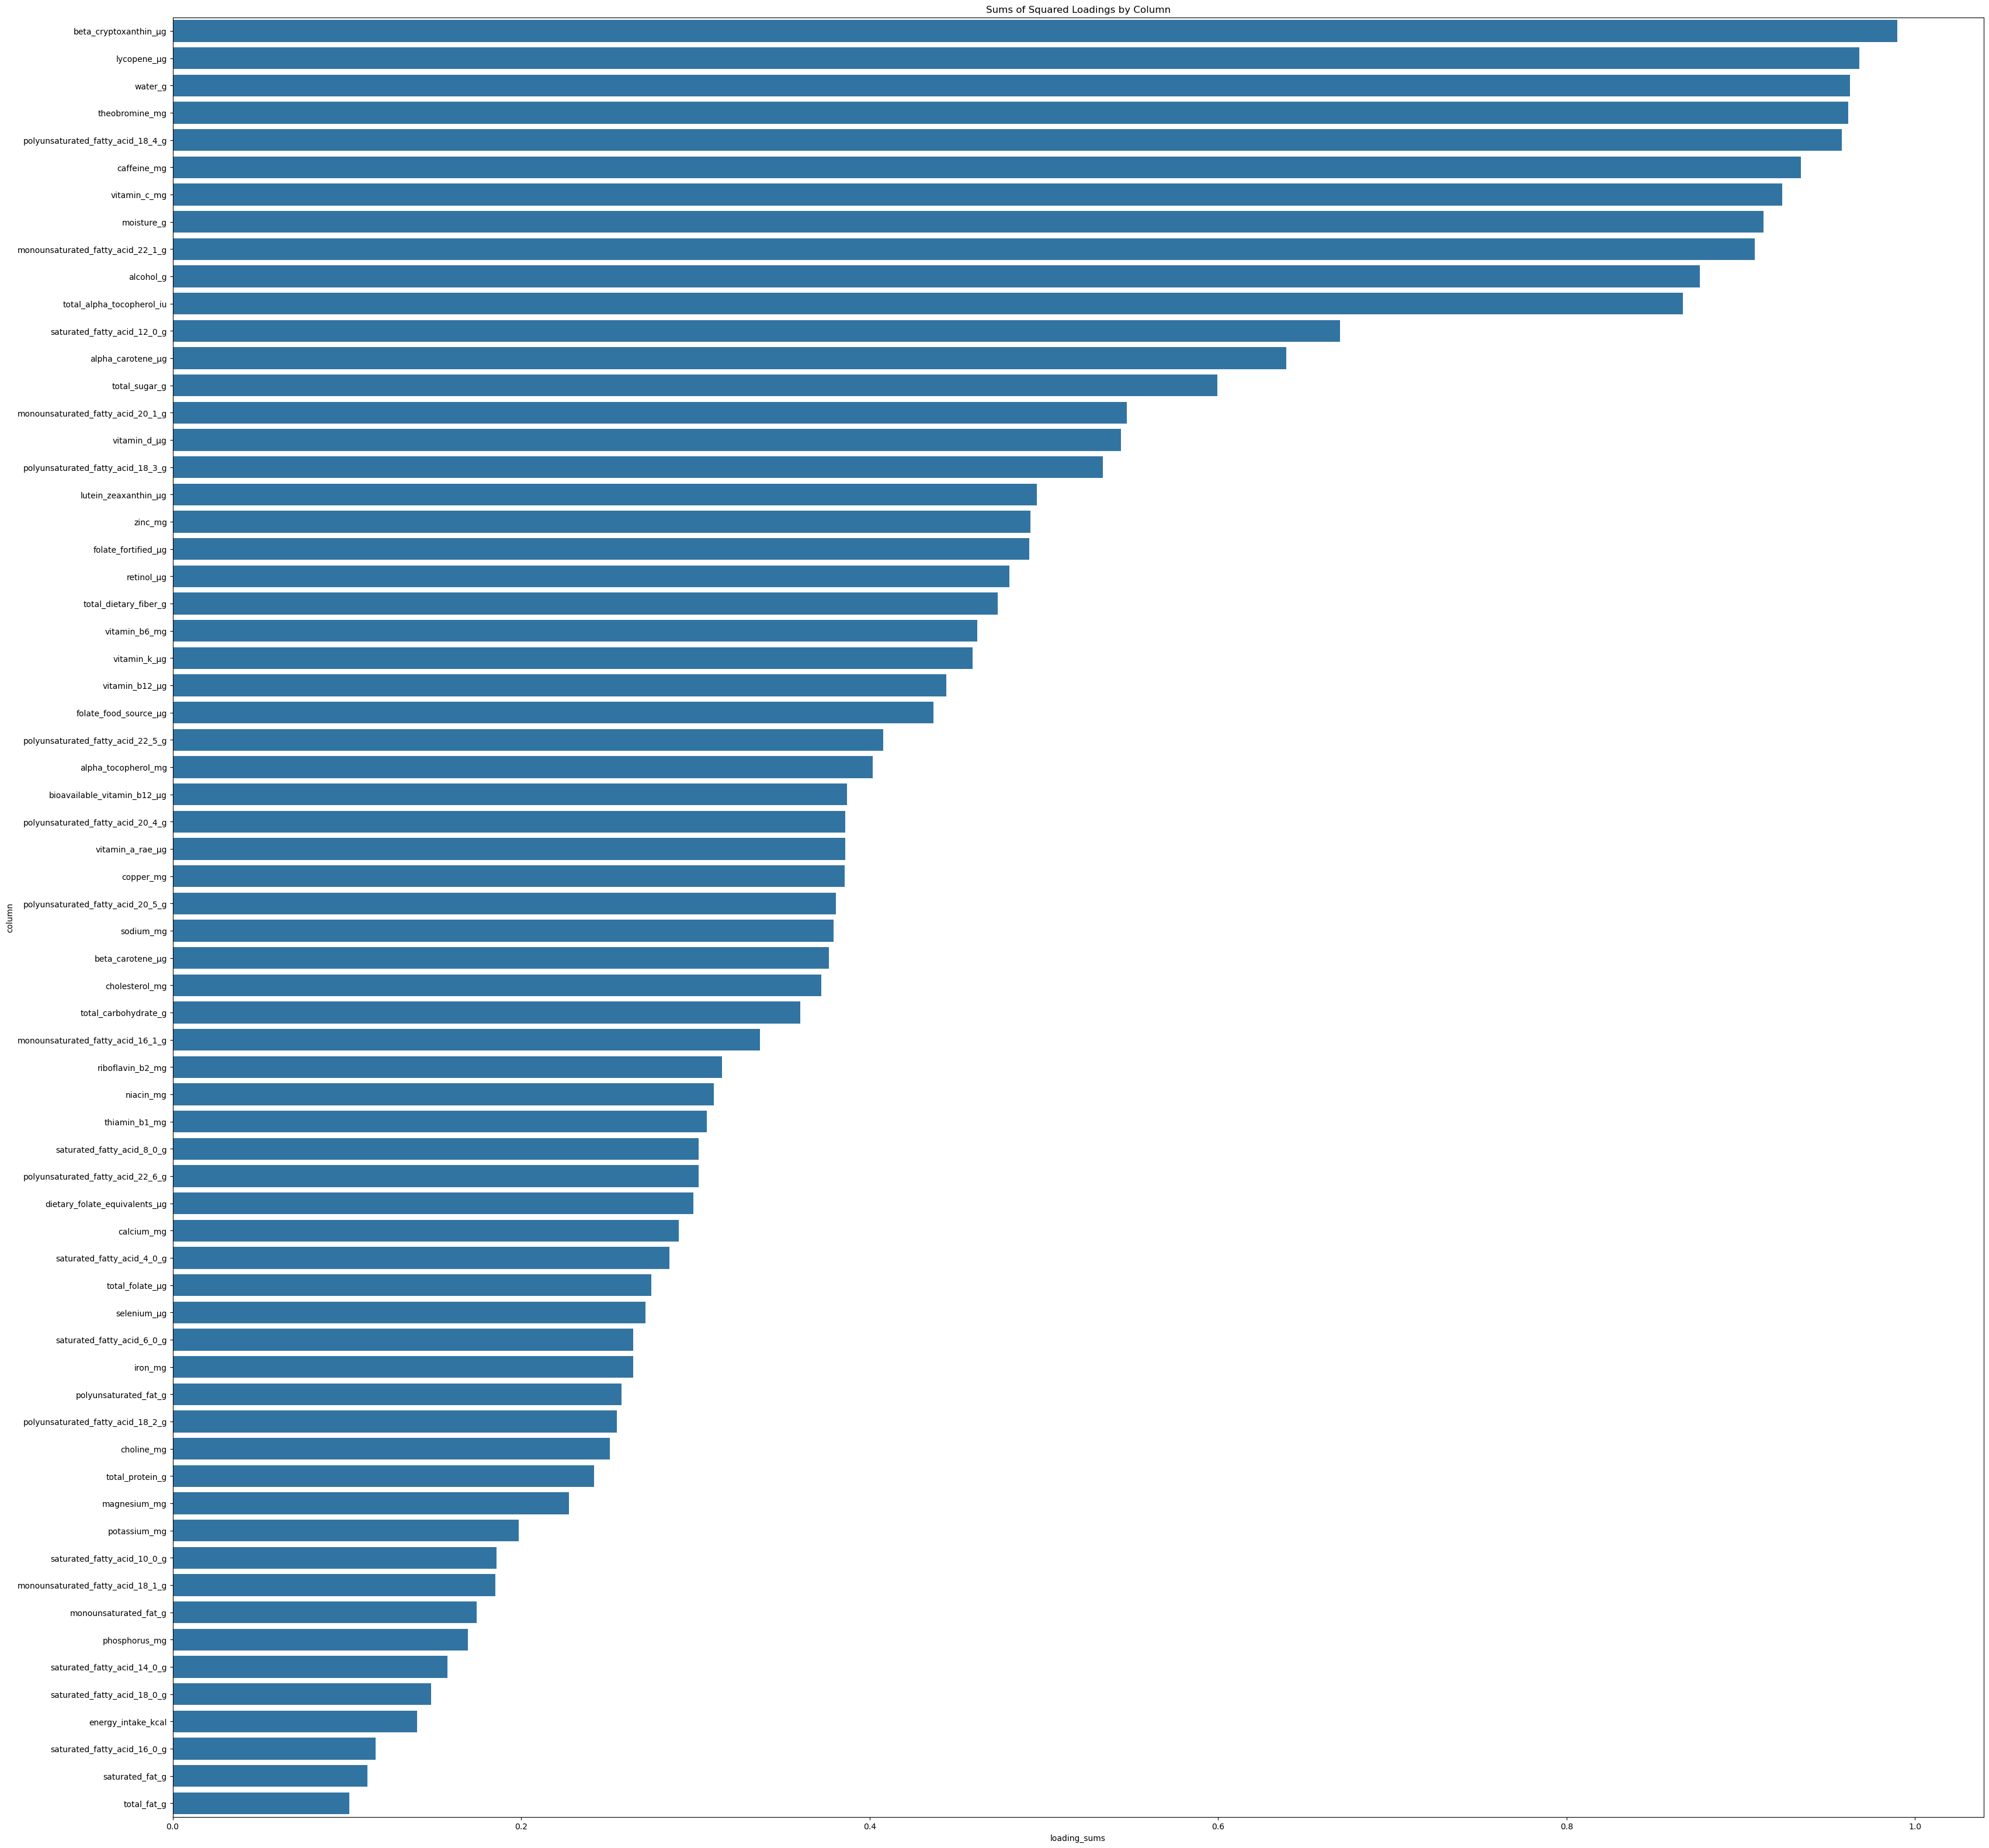

In [109]:
#squared sum of the diet loadings
#================================================================================#
loading_sums_diet = []
for i in diet_loadings.columns.tolist():
    total = 0
    for j in range(0,29):
        total += abs(diet_loadings[i][j])**2
    loading_sums_diet.append(total)

loadings_sums_diet = pd.DataFrame({'column': diet_loadings.columns.tolist(), 'loading_sums': loading_sums_diet})
loadings_sums_diet = loadings_sums_diet.sort_values(by = 'loading_sums', ascending = False)

plt.figure(figsize=(40, 40))
sns.barplot(data =loadings_sums_diet, x=loadings_sums_diet['loading_sums'] , y = loadings_sums_diet['column'])
plt.title('Sums of Squared Loadings by Column')
print(min(loading_sums_diet))
print(max(loading_sums_diet))
#plt.savefig('diet_squared_loading_sum.svg')

After looking at this graph we have decided to toss those from theamin onwards as they don't contribute enough for them to be considered as contributing to the variance. We will, however, keep a few exceptions which are columns that research suggests will be relevant these will be stated in the list ```exceptions``` before doing that we will analyze the loadings of the ```labs``` data frame

0.274491844526147
0.9997058927353824


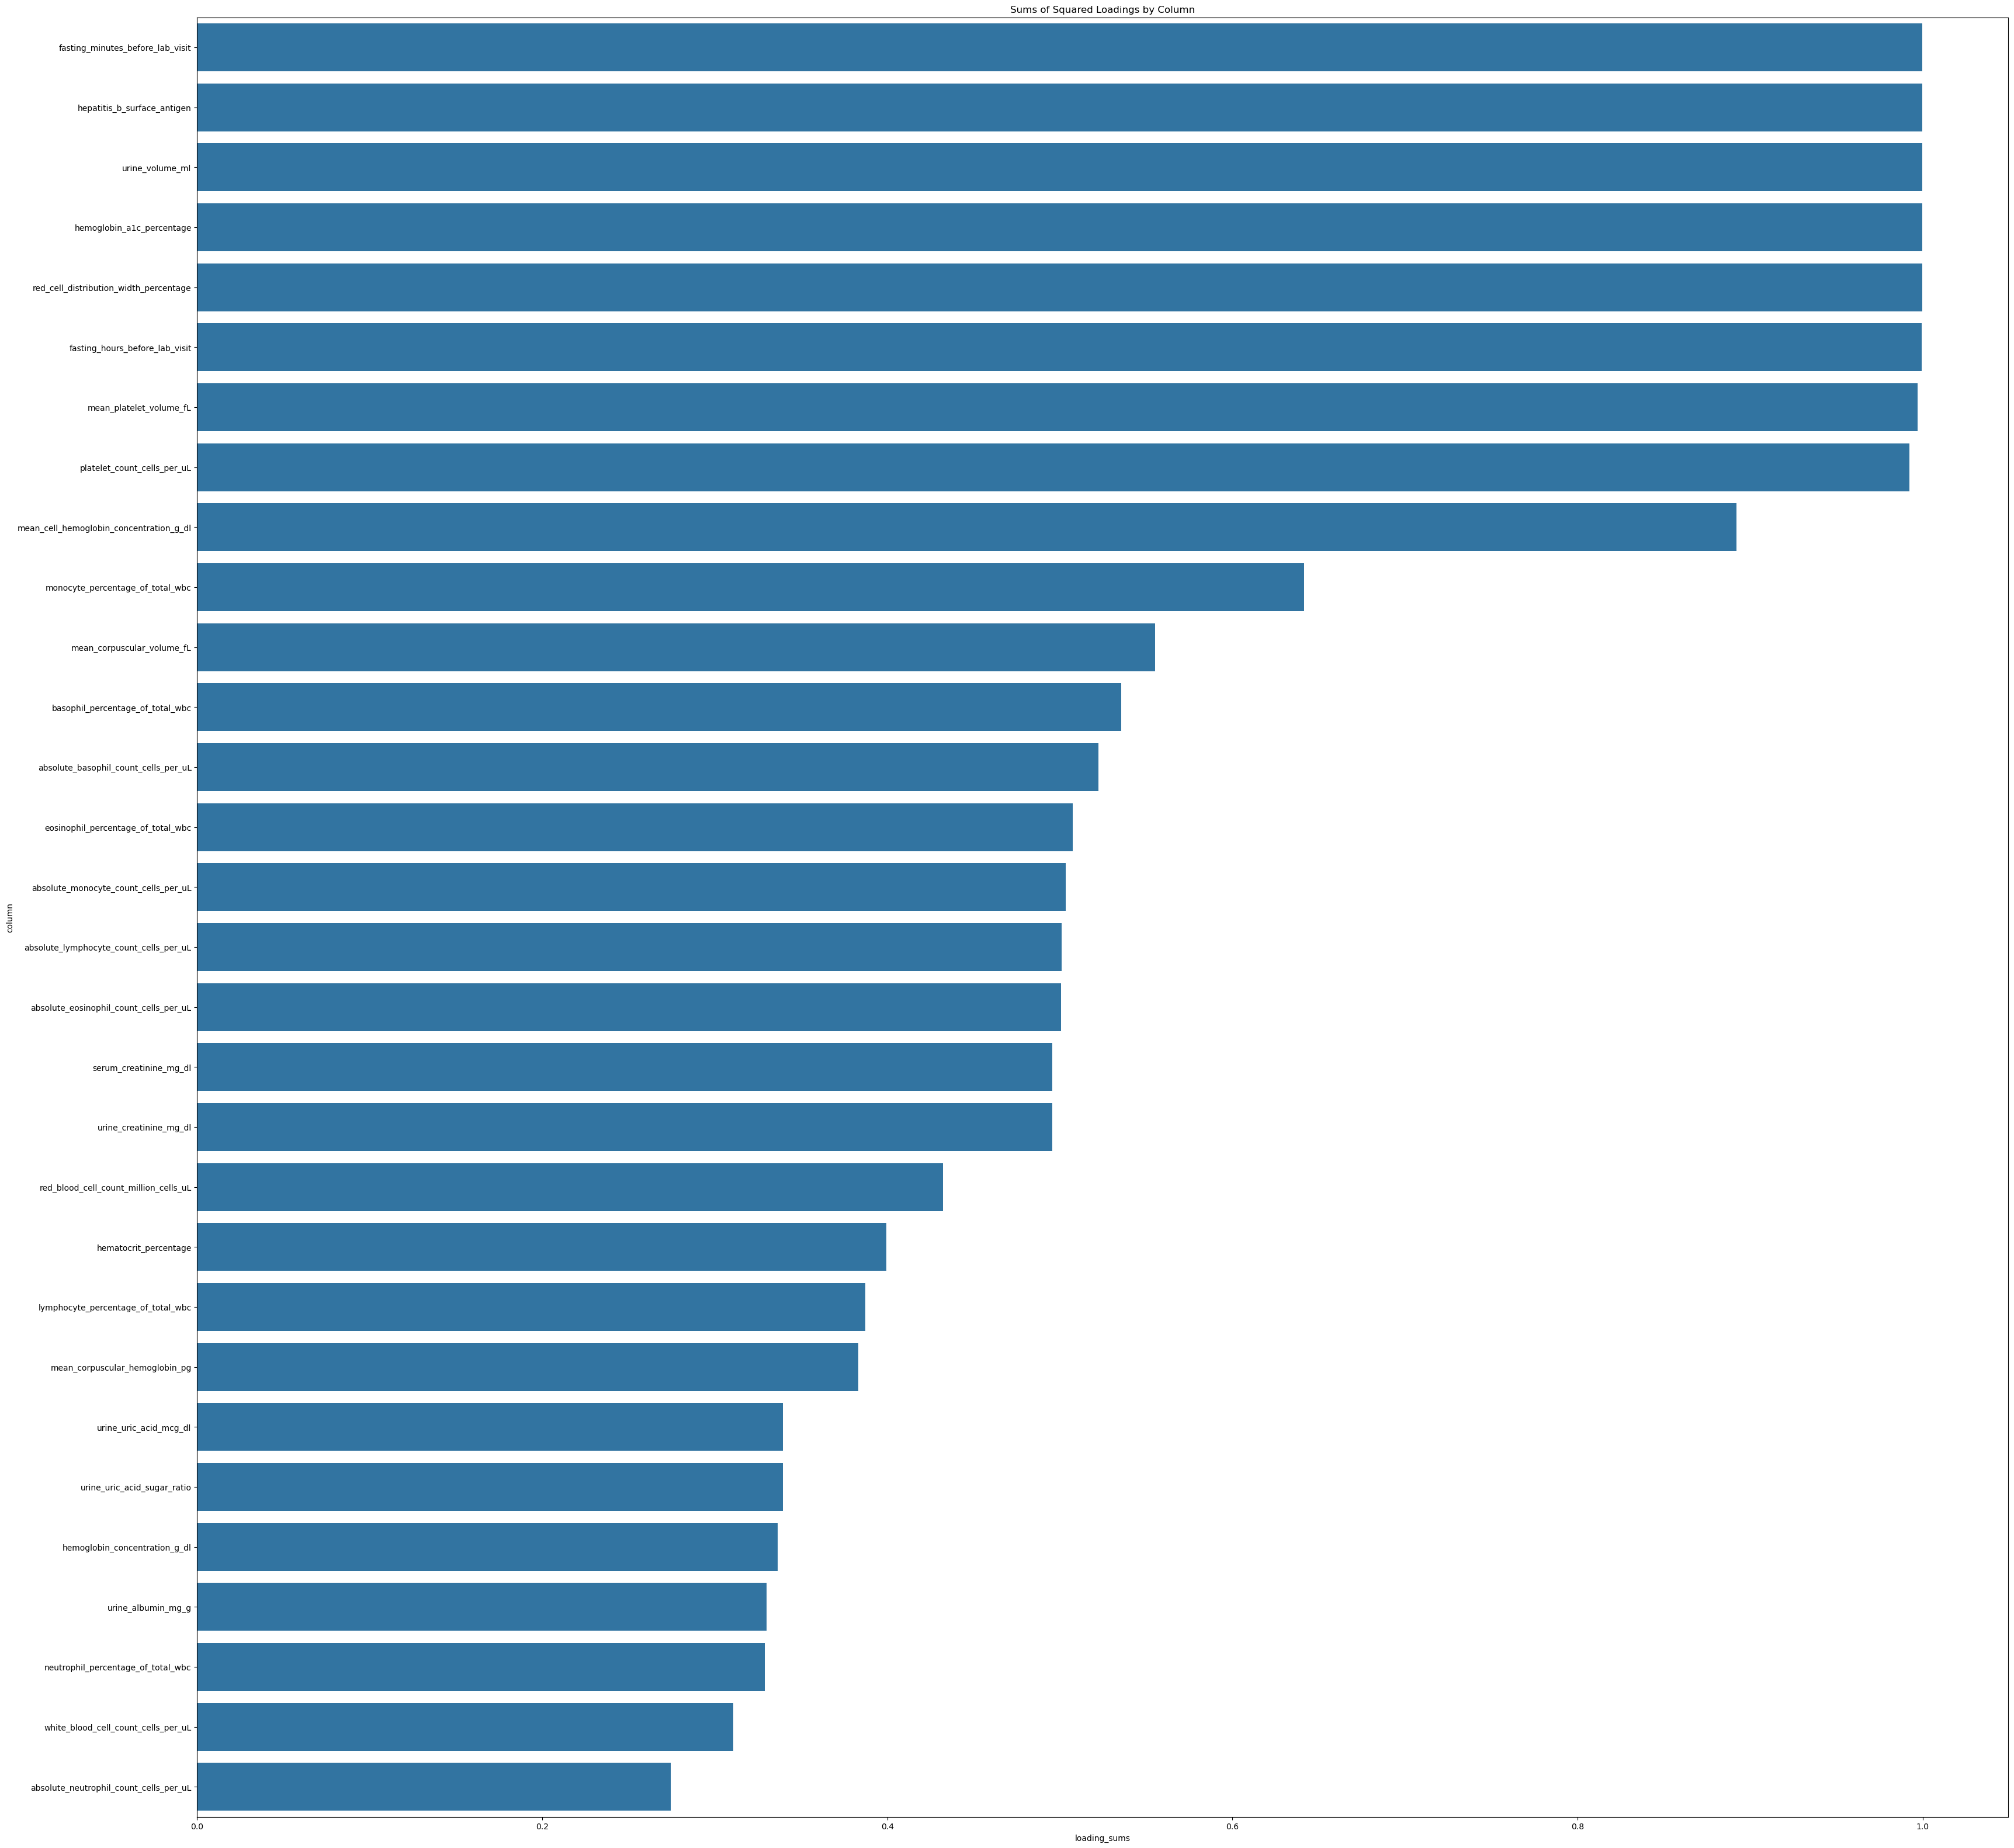

In [110]:
#squared sum of the labs loadings
#================================================================================#
loading_sums_labs = []
for i in labs_loadings.columns.tolist():
    total = 0
    for j in range(0,18):
        total += abs(labs_loadings[i][j])**2
    loading_sums_labs.append(total)

loadings_sums_labs = pd.DataFrame({'column': labs_loadings.columns.tolist(), 'loading_sums': loading_sums_labs})
loadings_sums_labs = loadings_sums_labs.sort_values(by = 'loading_sums', ascending = False)

plt.figure(figsize=(40, 40))
sns.barplot(data =loadings_sums_labs, x=loadings_sums_labs['loading_sums'] , y = loadings_sums_labs['column'])
plt.title('Sums of Squared Loadings by Column')
print(min(loading_sums_labs))
print(max(loading_sums_labs))
#plt.savefig('labs_squared_loading_sum.svg')

After looking at this graph we have decided to drop from mean cell hemoglobin concentration onwards as those variables don't really contibute to the principal components of this dataframe. Finally we move to dropping the unnecessary variables from both data frames.

In [111]:
#setting the exceptions
#==================================================================================#
exceptions_diet = ['total_fat_g','saturated_fat_g','energy_intake_kcal','total_protein_g']
exceptions_labs = ['white_blood_cell_count_cells_per_uL']


loadings_sums_diet = loadings_sums_diet.set_index('column')
loadings_sums_labs = loadings_sums_labs.set_index('column')

limit_diet = loadings_sums_diet.loc['thiamin_b1_mg'][0]
limit_labs = loadings_sums_labs.loc['red_blood_cell_count_million_cells_uL'][0]

loadings_sums_diet = loadings_sums_diet[loadings_sums_diet['loading_sums']<=limit_diet]
loadings_sums_labs = loadings_sums_labs[loadings_sums_labs['loading_sums']<limit_labs]

#dropping every non exception beyond the limits
for index in loadings_sums_diet.index.tolist():
    if index not in exceptions_diet:
        diet.drop(index, axis = 'columns', inplace = True)
        
for index in loadings_sums_labs.index.tolist():
    if index not in exceptions_labs:
        labs.drop(index, axis = 'columns', inplace = True)

With this done we have severely reduced the amount of variables that we will be working with, in diet going from 66 down to 44 and  from 32 to 21, finally with these new reduced data sets we will try to find intrestingg or relevant correlations between their variables

<center>

## 8. Destendarizing the variables

<center>
    
In this section we destandarize the variales returning their units and original values, to do this we look at the formula for standarization and solve for $X$ resulting in $$X = \sigma Z + \mu$$

In [112]:
diet_means = pd.DataFrame(diet_means)
diet_var = pd.DataFrame(diet_var)

labs_means = pd.DataFrame(labs_means)
labs_var = pd.DataFrame(labs_var)

for col in diet.columns.tolist():
    diet[col] = (diet[col]*np.sqrt(diet_var.loc[col][0]))+diet_means.loc[col][0]
    
for col in labs.columns.tolist():
    labs[col] = (labs[col]*np.sqrt(labs_var.loc[col][0]))+labs_means.loc[col][0]

With the variables noow standarized we can proceed to find the pearson correlation coefficicient of the merged data frames 

<center>

## 9. Pearson Correlation Coefficient of the data frame 

<center>

In this section we join ```labs```, ```examinations``` and ```diet``` and obtain the correlation matrix with the pearson correlation coefficients.

In [113]:
data = pd.merge(pd.merge(labs,diet, on = 'SEQN', how = 'inner'),examination,on = 'SEQN', how = 'inner')
correlations = data.corr()
correlations

,urine_creatinine_mg_dl,serum_creatinine_mg_dl,white_blood_cell_count_cells_per_uL,monocyte_percentage_of_total_wbc,eosinophil_percentage_of_total_wbc,basophil_percentage_of_total_wbc,absolute_lymphocyte_count_cells_per_uL,absolute_monocyte_count_cells_per_uL,absolute_eosinophil_count_cells_per_uL,absolute_basophil_count_cells_per_uL,red_blood_cell_count_million_cells_uL,mean_corpuscular_volume_fL,mean_cell_hemoglobin_concentration_g_dl,red_cell_distribution_width_percentage,platelet_count_cells_per_uL,mean_platelet_volume_fL,fasting_hours_before_lab_visit,fasting_minutes_before_lab_visit,hemoglobin_a1c_percentage,hepatitis_b_surface_antigen,urine_volume_ml,energy_intake_kcal,total_protein_g,total_carbohydrate_g,total_sugar_g,total_dietary_fiber_g,total_fat_g,saturated_fat_g,cholesterol_mg,alpha_tocopherol_mg,total_alpha_tocopherol_iu,retinol_µg,vitamin_a_rae_µg,alpha_carotene_µg,beta_carotene_µg,beta_cryptoxanthin_µg,lycopene_µg,lutein_zeaxanthin_µg,riboflavin_b2_mg,niacin_mg,vitamin_b6_mg,folate_food_source_µg,folate_fortified_µg,vitamin_b12_µg,bioavailable_vitamin_b12_µg,vitamin_c_mg,vitamin_d_µg,vitamin_k_µg,zinc_mg,copper_mg,sodium_mg,caffeine_mg,theobromine_mg,alcohol_g,moisture_g,saturated_fatty_acid_12_0_g,monounsaturated_fatty_acid_16_1_g,monounsaturated_fatty_acid_20_1_g,monounsaturated_fatty_acid_22_1_g,polyunsaturated_fatty_acid_18_3_g,polyunsaturated_fatty_acid_18_4_g,polyunsaturated_fatty_acid_20_4_g,polyunsaturated_fatty_acid_20_5_g,polyunsaturated_fatty_acid_22_5_g,water_g,weight_kg,standing_height_cm,body_mass_index_kg_m2,upper_arm_length_cm,arm_circumference_cm,waist_circumference_cm
urine_creatinine_mg_dl,1.000000,1.000000,0.018756,0.095397,0.001828,0.003421,0.000365,0.073665,0.012251,0.030771,0.134820,-0.069275,-0.054172,0.074503,-0.023823,0.059776,0.036484,0.041107,0.092720,0.028103,-0.343158,0.019486,-0.017133,0.026651,0.052219,-0.090521,0.019153,0.016970,0.002957,-0.006286,-0.018335,-0.019609,-0.042290,-0.008225,-0.042622,-0.056487,-0.028585,-0.055976,-0.033041,-0.004729,-0.014734,-0.007995,-0.095737,0.003306,-0.003001,-0.013784,-0.029358,-0.071191,0.001558,-0.047687,-0.017272,-0.092117,0.003963,0.002767,-0.063799,0.043312,0.026637,0.017007,-0.008470,-0.016487,-0.000737,0.012751,-0.013392,0.002343,0.024513,0.253413,0.194888,0.187108,0.240761,0.245364,0.191783
serum_creatinine_mg_dl,1.000000,1.000000,0.018756,0.095397,0.001828,0.003421,0.000365,0.073665,0.012251,0.030771,0.134820,-0.069275,-0.054172,0.074503,-0.023823,0.059776,0.036484,0.041107,0.092720,0.028103,-0.343158,0.019486,-0.017133,0.026651,0.052219,-0.090521,0.019153,0.016970,0.002957,-0.006286,-0.018335,-0.019609,-0.042290,-0.008225,-0.042622,-0.056487,-0.028585,-0.055976,-0.033041,-0.004729,-0.014734,-0.007995,-0.095737,0.003306,-0.003001,-0.013784,-0.029358,-0.071191,0.001558,-0.047687,-0.017272,-0.092117,0.003963,0.002767,-0.063799,0.043312,0.026637,0.017007,-0.008470,-0.016487,-0.000737,0.012751,-0.013392,0.002343,0.024513,0.253413,0.194888,0.187108,0.240761,0.245364,0.191783
white_blood_cell_count_cells_per_uL,0.018756,0.018756,1.000000,-0.333850,-0.120169,-0.194840,0.528027,0.639073,0.228585,0.305152,-0.009085,-0.068590,-0.009712,0.066733,0.302350,0.009642,-0.149609,0.001714,-0.035605,0.066508,0.003914,-0.038946,-0.070966,-0.012494,0.020518,-0.087043,-0.034352,-0.022536,-0.018157,-0.046384,-0.013442,-0.007319,-0.026231,-0.018511,-0.029162,-0.023700,-0.039737,0.004916,-0.020147,-0.041362,-0.040276,-0.031560,-0.079220,-0.028170,-0.006920,-0.016801,0.001183,-0.024332,-0.059688,-0.077347,-0.046636,0.078176,-0.026837,-0.033750,0.040858,-0.056138,-0.045397,-0.038048,-0.011622,-0.027203,-0.030829,-0.019645,0.008990,-0.003531,0.028564,0.152114,-0.136693,0.235001,-0.058987,0.147588,0.242463
monocyte_percentage_of_total_wbc,0.095397,0.095397,-0.333850,1.000000,0.108013,0.075429,-0.175656,0.455094,-0.012564,-0.096251,0.098501,0.046211,0.007938,-0.008397,-0.151573,-0.013236,0.030831,-0.038252,0.075531,-0.012491,0.033931,0.127777,0.103163,0.098049,0.0

Here is the matrix, it is a bit to extensive to see upfront, thus we will create a heatmap to see them in a more visual manner

<Axes: >

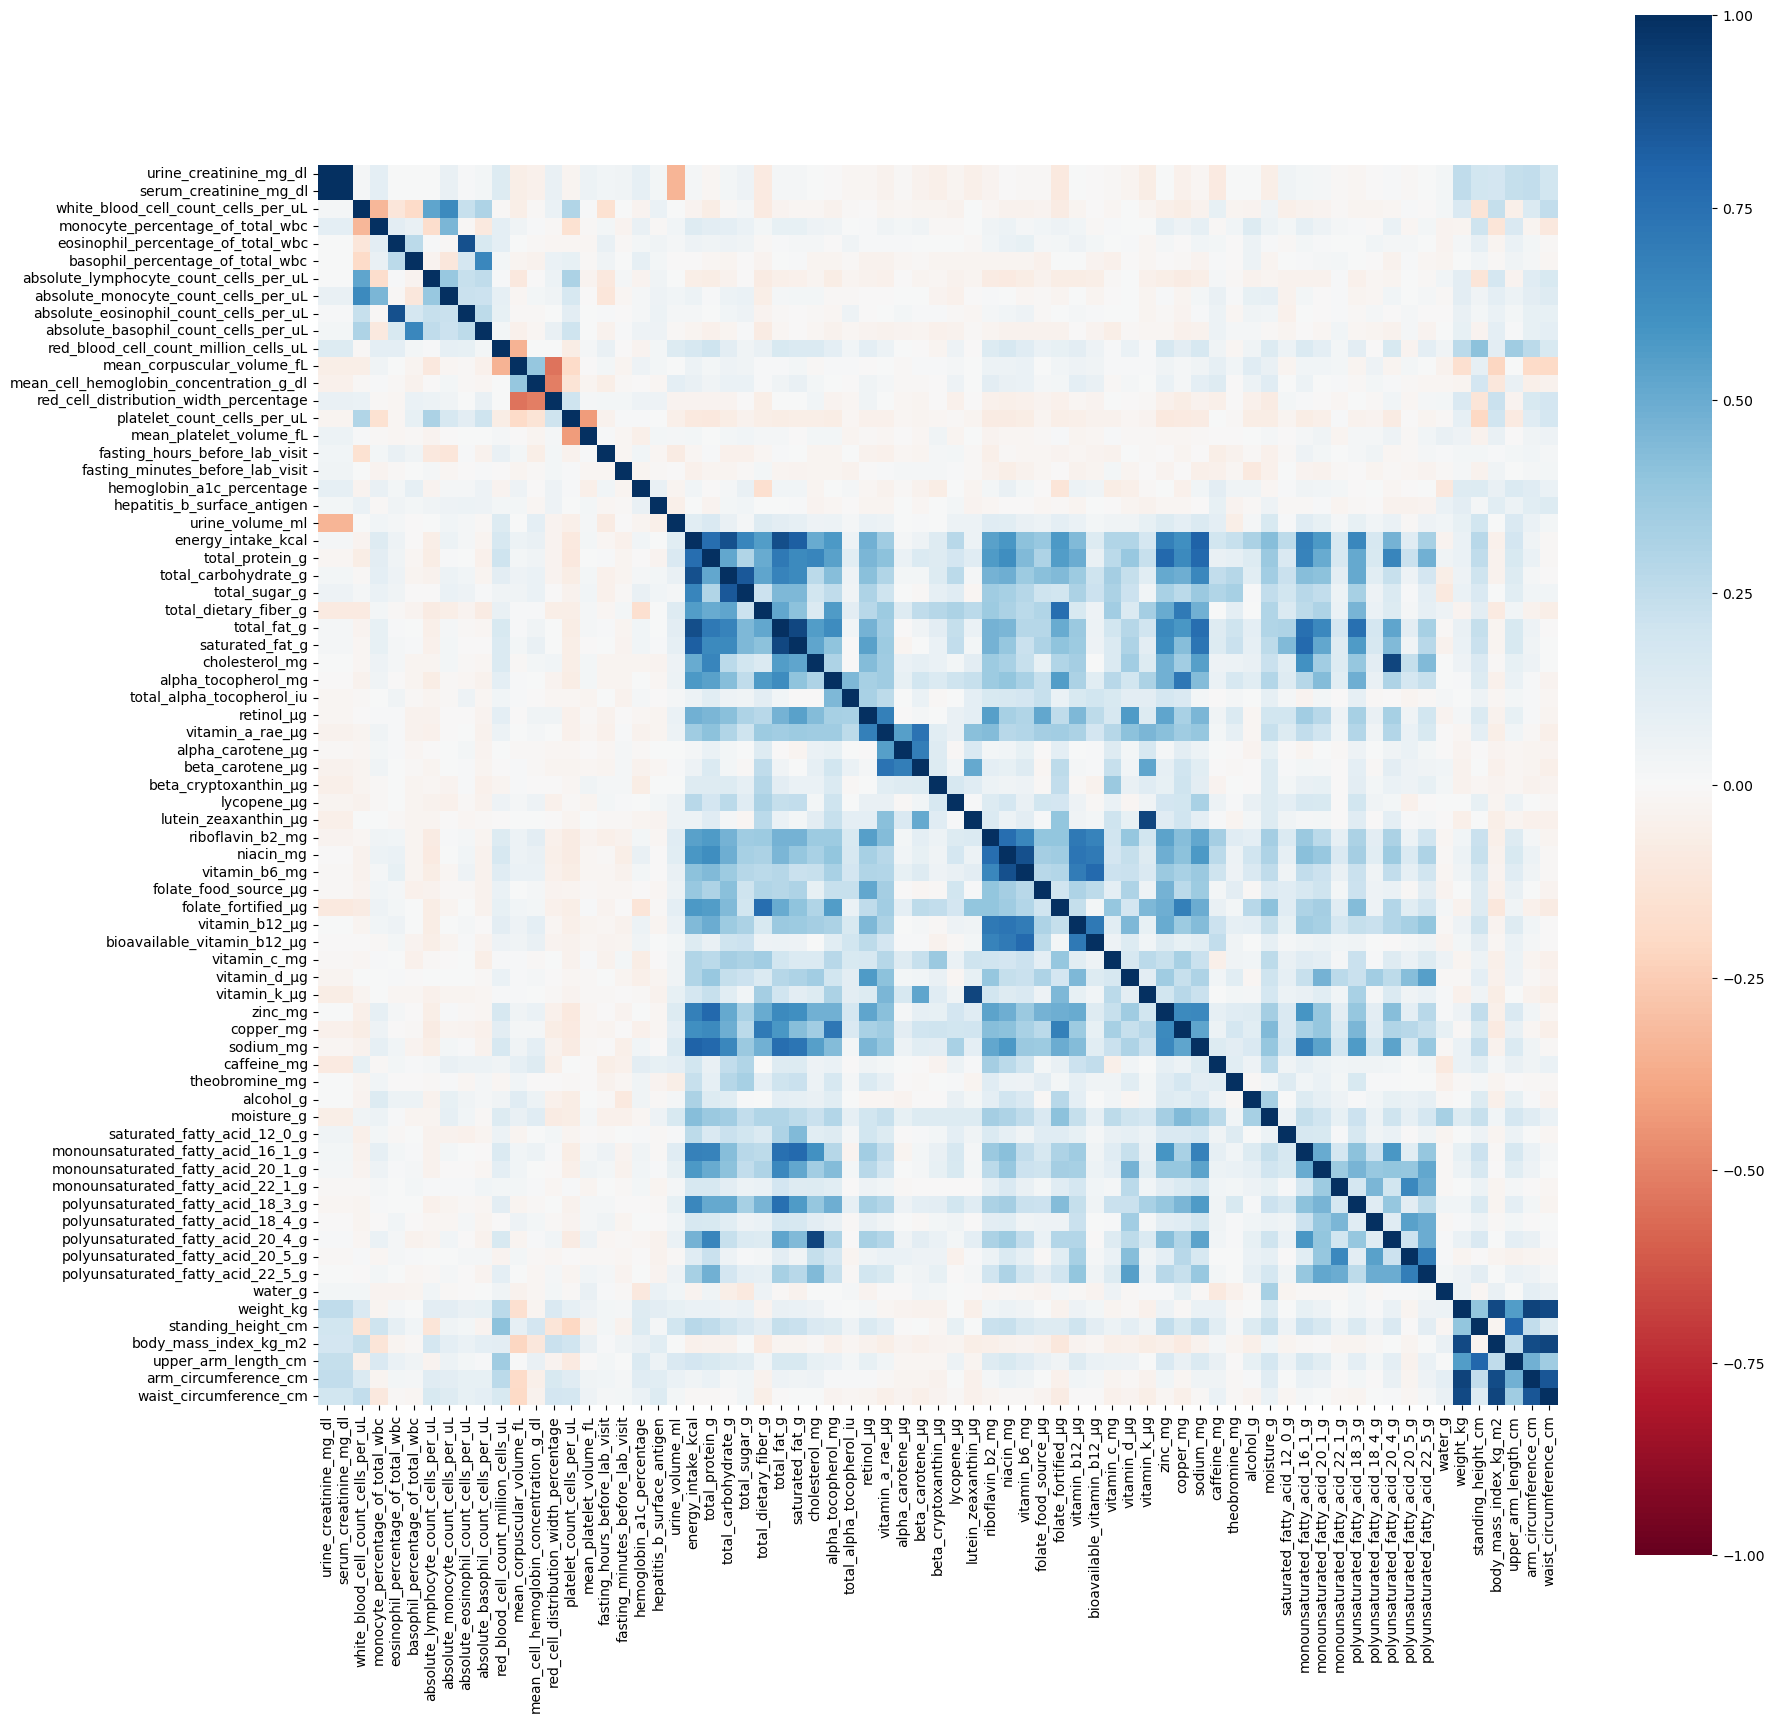

In [114]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(numeric_only=True),square=True, cmap='RdBu', vmax=1, vmin=-1,fmt=".2f")
#plt.savefig('correlation_heatmap.svg')

<center>
    
## 10. MLR for the examination data frame

In this section we will try to use the conjoined ```labs```, ```examinations``` and ```diet``` data frames in order to obtain models that use the results of the blood work done and the diet of the person to predict their weight, BMI, standing height, upper arm length, arm circunference and waist circunference. For this process there exists a null hypothesis $H_0$ for each variable that states that the variable isn't useful in predicting the weight of the person, the algorithm we will use will repeatedly create models using all variables and drop the one that has the highest $p$-value in every iteration and try again until the $p$-value of each and every one of the variables is lower than the critical value for the acceptance region of $H_0$ which in this case will be $\alpha = 0.05$ for confidence of $95\%$. First we will define two functions, the first function  is that which automatizes this process, it will be called ```backward_elimination```, and the second function is the oone that preforms the test of the model comparingg it to the real data, this function will be called ```test```

In [115]:
def backward_elimination(data, target, significance_level=0.05):
    # Separate predictors (X) and target variable (y)
    X = data.drop(columns=[target])
    y = data[target]

    # Add a constant term to predictors
    X = sm.add_constant(X)

    # Iteratively remove variables with p-value > significance_level
    while True:
        model = sm.OLS(y, X).fit()  # Fit the model
        p_values = model.pvalues  # Extract p-values
        
        # Find the predictor with the highest p-value
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            # Drop the predictor with the highest p-value
            variable_to_remove = p_values.idxmax()
            X = X.drop(columns=[variable_to_remove])
        else:
            break
    selected_predictors = X.columns.tolist()
    return model, model.summary(), selected_predictors

def test(model, X_test, y_test):
    y_pred = model.predict(X_test)   # Predict target values
    mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
    return mse

We will begin by applying this model to the variable that measures the weight, for this we will train the model with $80\%$ of the data

In [116]:
#Taking away the examinations variables
weight_predictros = data.drop(['standing_height_cm','body_mass_index_kg_m2','upper_arm_length_cm','arm_circumference_cm','waist_circumference_cm'], axis ='columns')

#Splitting the data into test and train
weight_train_data, weight_test_data = train_test_split(weight_predictros, test_size=0.2, random_state=42)

#Applying the model
weight_model, weight_summary, weight_selected_predictors = backward_elimination(weight_train_data, target="weight_kg")
weight_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              weight_kg   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     33.16
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           5.04e-72
Time:                        15:06:41   Log-Likelihood:                -5930.7
No. Observations:                1336   AIC:                         1.189e+04
Df Residuals:                    1322   BIC:                         1.196e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    -134.1981     30.804     -4.357      0.000    -194.628     -73.768
urine_creatinine_mg_dl                   8.991e-06   9.33e-07      9.639      0.000    7.16e-06    1.08e-05
serum_creatinine_mg_dl                      0.0008   8.25e-05      9.639      0.000       0.001       0.001
white_blood_cell_count_cells_per_uL         1.7393      0.330      5.264      0.000       1.091       2.387
absolute_monocyte_count_cells_per_uL      -10.2188      3.881     -2.633      0.009     -17.832      -2.606
red_blood_cell_count_million_cells_uL      10.3778      1.224      8.482      0.000       7.977      12.778
mean_cell_hemoglobin_concentration_g_dl     1.4820      0.717      2.068      0.039       0.076       2.888
red_cell_distribution_width_percentage      3.1397      0.584      5.373      0.000       1.993       4.286
platelet_count_cells_per_uL                 0.0495      0.012      4.134      0.000       0.026       0.073
mean_platelet_volume_fL                     2.3871      0.688      3.469      0.001       1.037       3.737
hemoglobin_a1c_percentage                   6.0573      1.173      5.162      0.000       3.755       8.359
hepatitis_b_surface_antigen                 3.5178      1.157      3.041      0.002       1.248       5.787
urine_volume_ml                             0.0393      0.007      5.415      0.000       0.025       0.054
lutein_zeaxanthin_µg                       -0.0004      0.000     -2.343      0.019      -0.001   -6.35e-05
moisture_g                                  0.0020      0.000      5.629      0.000       0.001       0.003
==============================================================================
Omnibus:                      237.468   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.194
Skew:                           0.995   Prob(JB):                    2.73e-116
Kurtosis:                       5.367   Cond. No.                     1.18e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The model had quite a few variables that were considered relevant, however the $R^2_{adjusted}$ is really low with a value of only $0.238$ which means that this model may only be able to predict 23% of the variance of this variable, thus we might want to use other methods to build a model that predicts the weight. With this said we will forgo testing the model as the variance predicted was too low. Now onwards with the prediction for standing height.

In [117]:
#Taking away the examinations variables
height_predictros = data.drop(["weight_kg",'body_mass_index_kg_m2','upper_arm_length_cm','arm_circumference_cm','waist_circumference_cm'], axis ='columns')

#Splitting the data into test and train
height_train_data, height_test_data = train_test_split(height_predictros, test_size=0.2, random_state=45)

#Applying the model
height_model, height_summary, height_selected_predictors = backward_elimination(height_train_data, target='standing_height_cm')
height_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     standing_height_cm   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     55.65
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          8.53e-129
Time:                        15:06:42   Log-Likelihood:                -4658.5
No. Observations:                1336   AIC:                             9349.
Df Residuals:                    1320   BIC:                             9432.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      87.5280      9.254      9.458      0.000      69.373     105.683
urine_creatinine_mg_dl                   2.753e-06   3.56e-07      7.730      0.000    2.05e-06    3.45e-06
serum_creatinine_mg_dl                      0.0002   3.15e-05      7.730      0.000       0.000       0.000
white_blood_cell_count_cells_per_uL        -0.5268      0.141     -3.743      0.000      -0.803      -0.251
absolute_lymphocyte_count_cells_per_uL     -0.8075      0.387     -2.085      0.037      -1.567      -0.048
absolute_monocyte_count_cells_per_uL        3.5915      1.496      2.401      0.016       0.657       6.526
red_blood_cell_count_million_cells_uL       8.2099      0.521     15.770      0.000       7.189       9.231
mean_corpuscular_volume_fL                  0.2763      0.048      5.808      0.000       0.183       0.370
mean_cell_hemoglobin_concentration_g_dl     0.6831      0.252      2.709      0.007       0.188       1.178
platelet_count_cells_per_uL                -0.0187      0.005     -4.004      0.000      -0.028      -0.010
mean_platelet_volume_fL                    -1.1622      0.263     -4.412      0.000      -1.679      -0.645
hemoglobin_a1c_percentage                   2.1990      0.454      4.848      0.000       1.309       3.089
urine_volume_ml                             0.0205      0.003      7.262      0.000       0.015       0.026
energy_intake_kcal                          0.0009      0.000      3.766      0.000       0.000       0.001
vitamin_b12_µg                              0.0878      0.040      2.173      0.030       0.009       0.167
moisture_g                                  0.0006      0.000      3.734      0.000       0.000       0.001
water_g                                    -0.0006      0.000     -2.311      0.021      -0.001   -8.66e-05
==============================================================================
Omnibus:                        1.119   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                1.014
Skew:                           0.029   Prob(JB):                        0.602
Kurtosis:                       3.122   Cond. No.                     1.92e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.86e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Again we can see that the model describes height on a composition of multiple variables, however this model also has a really bad $R^2_{adjusted}$ with its value being of $0.380$ which indicates that this model will only be able to explain at most 38% of the data, thus again we can say that MLR is not fit for the prediction of this variable in the dataframe and will thus forgo the testing. We now move on generating the model for the bmi

In [118]:
#Taking away the examinations variables
bmi_predictros = data.drop(["weight_kg",'standing_height_cm','upper_arm_length_cm','arm_circumference_cm','waist_circumference_cm'], axis ='columns')

#Splitting the data into test and train
bmi_train_data, bmi_test_data = train_test_split(bmi_predictros, test_size=0.2, random_state=45)

#Applying the model
bmi_model, bmi_summary, bmi_selected_predictors = backward_elimination(bmi_train_data, target='body_mass_index_kg_m2')
bmi_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     body_mass_index_kg_m2   R-squared (uncentered):                   0.946
Model:                               OLS   Adj. R-squared (uncentered):              0.945
Method:                    Least Squares   F-statistic:                              1656.
Date:                   Sat, 07 Dec 2024   Prob (F-statistic):                        0.00
Time:                           15:06:42   Log-Likelihood:                         -4475.3
No. Observations:                   1336   AIC:                                      8979.
Df Residuals:                       1322   BIC:                                      9051.
Df Model:                             14                                                  
Covariance Type:               nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
urine_creatinine_mg_dl                  2.038e-06   3.09e-07      6.588      0.000    1.43e-06    2.64e-06
serum_creatinine_mg_dl                     0.0002   2.73e-05      6.588      0.000       0.000       0.000
white_blood_cell_count_cells_per_uL        0.7260      0.115      6.318      0.000       0.501       0.951
absolute_monocyte_count_cells_per_uL      -4.7044      1.293     -3.638      0.000      -7.241      -2.168
red_blood_cell_count_million_cells_uL      0.7970      0.369      2.160      0.031       0.073       1.521
mean_corpuscular_volume_fL                -0.1172      0.022     -5.261      0.000      -0.161      -0.073
red_cell_distribution_width_percentage     0.7653      0.147      5.193      0.000       0.476       1.054
platelet_count_cells_per_uL                0.0236      0.004      6.132      0.000       0.016       0.031
mean_platelet_volume_fL                    1.0979      0.216      5.079      0.000       0.674       1.522
hemoglobin_a1c_percentage                  1.0856      0.396      2.743      0.006       0.309       1.862
hepatitis_b_surface_antigen                1.2895      0.391      3.298      0.001       0.522       2.057
urine_volume_ml                            0.0059      0.002      2.394      0.017       0.001       0.011
vitamin_d_µg                              -0.0656      0.033     -1.993      0.046      -0.130      -0.001
copper_mg                                 -0.7303      0.256     -2.856      0.004      -1.232      -0.229
moisture_g                                 0.0005      0.000      3.903      0.000       0.000       0.001
==============================================================================
Omnibus:                      301.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              812.543
Skew:                           1.171   Prob(JB):                    3.62e-177
Kurtosis:                       6.019   Cond. No.                     1.27e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.76e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

For this variable we can see that the model actually seems to be very good, it kept a decent number of variables and actually has a pretty good $R^2_{adjusted}$ with its value being $0.945$ indicating that the model may be able to predict at most 94.5% of the variance that exists in the data base, so we will continue to see how the residues of this model behave to see if the model is over or under predicting and after this decide if the model is functional 

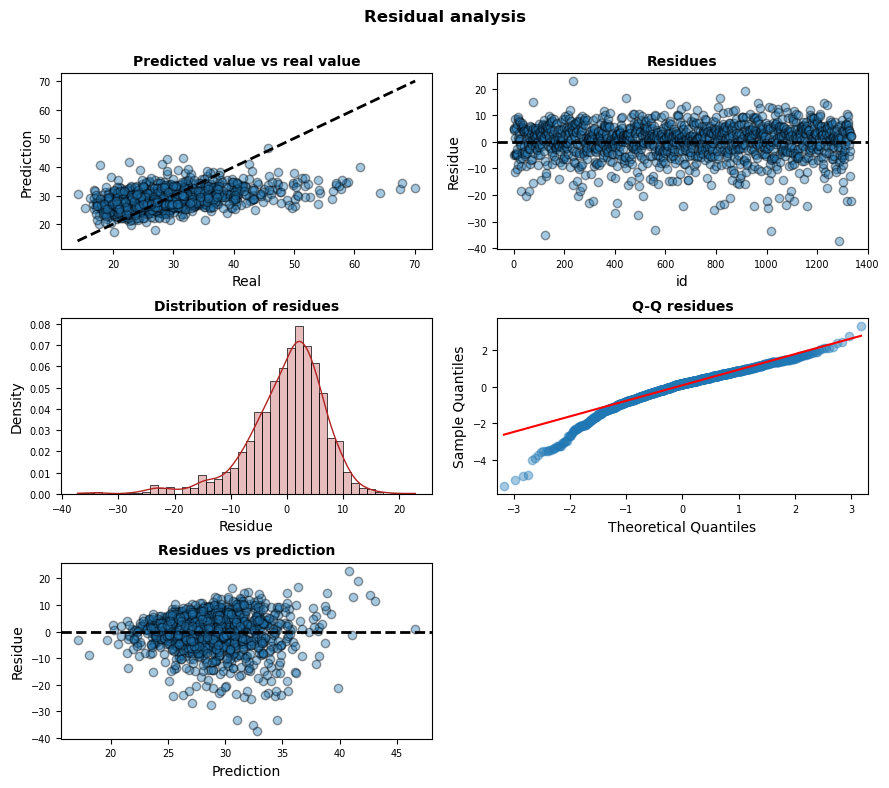

In [119]:
#Training residues
X_train = bmi_train_data.drop('body_mass_index_kg_m2',axis='columns')
for col in X_train.columns.tolist():
    if not(col in bmi_selected_predictors):
        X_train = X_train.drop(col, axis = 'columns')
y_train = bmi_train_data['body_mass_index_kg_m2'].values.flatten()
prediction_train = bmi_model.predict(exog = X_train)
residues_train   = prediction_train - y_train

# Graphs
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                linestyle='--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residues', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residue')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residues_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of residues', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residue")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residues_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residues', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residues vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Residue')
axes[2, 0].tick_params(labelsize = 7)

# Eliminate empty axes
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Residual analysis', fontsize = 12, fontweight = "bold");
#fig.savefig('residual_analysis_bmi.svg')

As we can see the model tends to under predict with the residues distribution being skwed towards the right and on the qq-plot showing that there is a disproportional amount of negative residues, we will now preoceed to do the test and see the MSE

In [120]:
X_test = bmi_test_data.drop('body_mass_index_kg_m2',axis='columns')
for col in X_test.columns.tolist():
    if not(col in bmi_selected_predictors):
        X_test = X_test.drop(col, axis = 'columns')
y_test = bmi_test_data['body_mass_index_kg_m2'].values
print(f'the mse of this model is: {test(bmi_model,X_test,y_test)}')

the mse of this model is: 36.921488261996366


For this model $MSE \approx 37$ which is pretty good as it implies an actual error of approximately $\pm6.1$ which in terms of the BMI's contained in the data frame does not represent much variation. With this we can say that this model was overall a pretty good fit to predict the bmi, it is described by:
- **`urine_creatinine_mg_dl`:**  
  Coefficient = $2.038 \times 10^{-6}$ , $P < 0.001$.  
  This variable has a positive relationship with the dependent variable.

- **`serum_creatinine_mg_dl`:**  
  Coefficient = $0.0002$, $P < 0.001$.  
  Positively associated.

- **`mean_platelet_volume_fL`:**  
  Coefficient = $1.0979$, $P < 0.001$.  
  This is a significant predictor with a positive effect.

- **`vitamin_d_µg`:**  
  Coefficient = $-0.0656$, $P = 0.046$.  
  Negatively associated.

- **`copper_mg`:**  
  Coefficient = $-0.7303$, $P = 0.004$.  
  This variable shows a significant negative effect.

- **`moisture_g`:**  
  Coefficient = $0.0005$, $P < 0.001$.  
  Positive and significant.
  

Some variables like `red_blood_cell_count_million_cells_uL` $P = 0.031$ and `urine_volume_ml` $P = 0.017$ are significant at the 5% level but may require further investigation for practical significance.


High t-statistics for variables such as `white_blood_cell_count_cells_per_uL` and `platelet_count_cells_per_uL` indicate strong effects on the dependent variable.

We now continue with the model for upper arm length

In [121]:
#Taking away the examinations variables
arm_length_predictros = data.drop(["weight_kg",'standing_height_cm','body_mass_index_kg_m2','arm_circumference_cm','waist_circumference_cm'], axis ='columns')

#Splitting the data into test and train
arm_length_train_data, arm_length_test_data = train_test_split(arm_length_predictros, test_size=0.2, random_state=45)

#Applying the model
arm_length_model, arm_length_summary, arm_length_selected_predictors = backward_elimination(arm_length_train_data, target='upper_arm_length_cm')
arm_length_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     upper_arm_length_cm   R-squared:                       0.259
Model:                             OLS   Adj. R-squared:                  0.250
Method:                  Least Squares   F-statistic:                     28.84
Date:                 Sat, 07 Dec 2024   Prob (F-statistic):           1.11e-74
Time:                         15:06:43   Log-Likelihood:                -3092.4
No. Observations:                 1336   AIC:                             6219.
Df Residuals:                     1319   BIC:                             6307.
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     20.4216      1.570     13.011      0.000      17.343      23.501
urine_creatinine_mg_dl                  9.862e-07    1.1e-07      8.978      0.000    7.71e-07     1.2e-06
serum_creatinine_mg_dl                  8.719e-05   9.71e-06      8.979      0.000    6.81e-05       0.000
eosinophil_percentage_of_total_wbc         0.2905      0.073      3.954      0.000       0.146       0.435
absolute_eosinophil_count_cells_per_uL    -3.6072      0.914     -3.949      0.000      -5.399      -1.815
red_blood_cell_count_million_cells_uL      1.8811      0.159     11.822      0.000       1.569       2.193
mean_corpuscular_volume_fL                 0.0500      0.013      3.841      0.000       0.024       0.076
hemoglobin_a1c_percentage                  0.6783      0.140      4.828      0.000       0.403       0.954
urine_volume_ml                            0.0057      0.001      6.515      0.000       0.004       0.007
total_fat_g                                0.0079      0.002      3.356      0.001       0.003       0.013
alpha_tocopherol_mg                       -0.0211      0.010     -2.159      0.031      -0.040      -0.002
riboflavin_b2_mg                          -0.1593      0.068     -2.346      0.019      -0.292      -0.026
vitamin_b12_µg                             0.0604      0.018      3.307      0.001       0.025       0.096
vitamin_c_mg                               0.0016      0.001      2.340      0.019       0.000       0.003
sodium_mg                                 -0.0001   5.76e-05     -2.170      0.030      -0.000    -1.2e-05
moisture_g                                 0.0002   4.94e-05      4.715      0.000       0.000       0.000
polyunsaturated_fatty_acid_20_5_g         -1.6834      0.641     -2.628      0.009      -2.940      -0.427
water_g                                   -0.0002   7.61e-05     -2.574      0.010      -0.000   -4.66e-05
==============================================================================
Omnibus:                       10.713   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.163
Skew:                           0.181   Prob(JB):                      0.00377
Kurtosis:                       3.263   Cond. No.                     1.50e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Like with height and weight the $R^2_{adjusted}$ of this model is incredibly low with a value of only $0.25$ mening that this model will only be able to predict 25% of the variance in the data frame at most, so we can say that MLR may is not fit for the prediction of the upper arm length in this data frame, thus we forgo the testing. We now continue with the MLR for the arm circunference.

In [122]:
#Taking away the examinations variables
arm_circunference_predictros = data.drop(["weight_kg",'standing_height_cm','body_mass_index_kg_m2','upper_arm_length_cm','waist_circumference_cm'], axis ='columns')

#Splitting the data into test and train
arm_circunference_train_data, arm_circunference_test_data = train_test_split(arm_circunference_predictros, test_size=0.2, random_state=45)

#Applying the model
arm_circunference_model, arm_circunference_summary, arm_circunference_selected_predictors = backward_elimination(arm_circunference_train_data, target='arm_circumference_cm')
arm_circunference_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     arm_circumference_cm   R-squared (uncentered):                   0.978
Model:                              OLS   Adj. R-squared (uncentered):              0.978
Method:                   Least Squares   F-statistic:                              4918.
Date:                  Sat, 07 Dec 2024   Prob (F-statistic):                        0.00
Time:                          15:06:44   Log-Likelihood:                         -4046.8
No. Observations:                  1336   AIC:                                      8118.
Df Residuals:                      1324   BIC:                                      8180.
Df Model:                            12                                                  
Covariance Type:              nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
urine_creatinine_mg_dl                  1.909e-06   2.25e-07      8.503      0.000    1.47e-06    2.35e-06
serum_creatinine_mg_dl                     0.0002   1.99e-05      8.503      0.000       0.000       0.000
white_blood_cell_count_cells_per_uL        0.2556      0.083      3.065      0.002       0.092       0.419
absolute_monocyte_count_cells_per_uL      -2.2249      0.936     -2.377      0.018      -4.061      -0.389
red_blood_cell_count_million_cells_uL      2.4322      0.259      9.376      0.000       1.923       2.941
red_cell_distribution_width_percentage     0.4905      0.106      4.607      0.000       0.282       0.699
platelet_count_cells_per_uL                0.0136      0.003      5.009      0.000       0.008       0.019
mean_platelet_volume_fL                    0.4767      0.137      3.467      0.001       0.207       0.746
hemoglobin_a1c_percentage                  1.1375      0.282      4.034      0.000       0.584       1.691
hepatitis_b_surface_antigen                0.9595      0.280      3.425      0.001       0.410       1.509
urine_volume_ml                            0.0075      0.002      4.221      0.000       0.004       0.011
folate_fortified_µg                       -0.0027      0.001     -2.985      0.003      -0.004      -0.001
moisture_g                                 0.0005   9.18e-05      5.158      0.000       0.000       0.001
==============================================================================
Omnibus:                      106.856   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.175
Skew:                           0.621   Prob(JB):                     4.50e-35
Kurtosis:                       4.140   Cond. No.                     1.18e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.06e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This model is another great hit, we can see that this is a very good model as the $R^2_{adjusted}$has a value of 0.978 which indicates that the model will be able to predict at most 97% of the variance in the data, we will continue to analyze the residues of the model to see if it's over or under predicting 

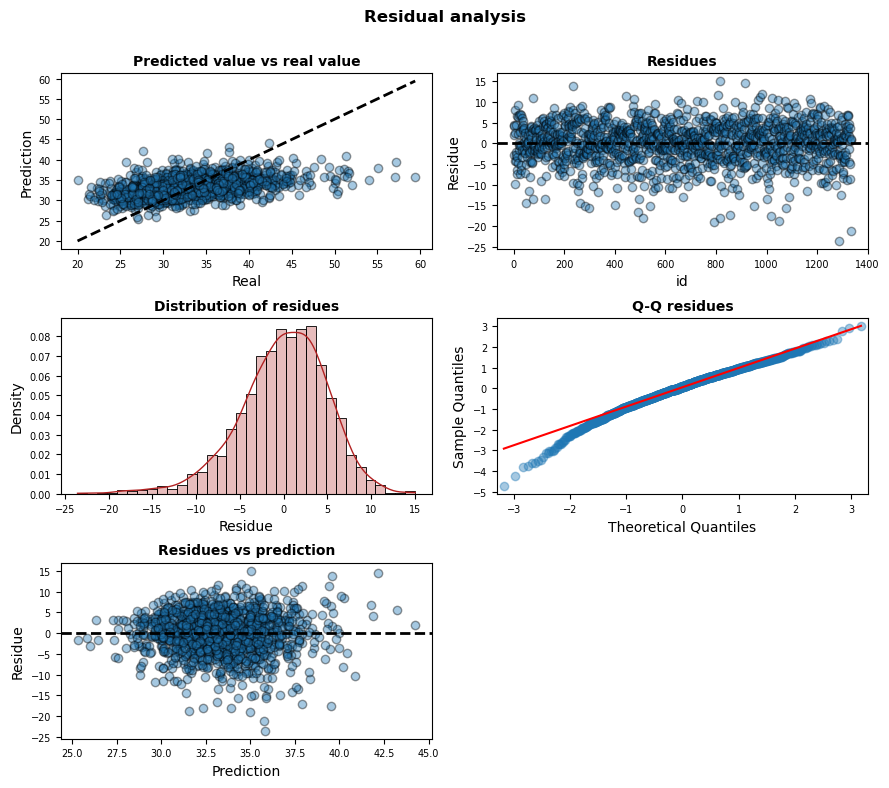

In [123]:
#Training residues
X_train = arm_circunference_train_data.drop('arm_circumference_cm',axis='columns')
for col in X_train.columns.tolist():
    if not(col in arm_circunference_selected_predictors):
        X_train = X_train.drop(col, axis = 'columns')
y_train = arm_circunference_train_data['arm_circumference_cm'].values.flatten()
prediction_train = arm_circunference_model.predict(exog = X_train)
residues_train   = prediction_train - y_train

# Graphs
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                linestyle='--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residues', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residue')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residues_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of residues', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residue")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residues_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residues', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residues vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Residue')
axes[2, 0].tick_params(labelsize = 7)

# Eliminate empty axes
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Residual analysis', fontsize = 12, fontweight = "bold");
#fig.savefig('residual_analysis_arm_circunference.svg')

As we see with these graphs we can see that the model tends to under predict as the residues are slightly skewed towards the right, the qq-plot verifies this as the residues deviate from the normal quantiles by having more data towards the negative or lower quantiles. Now we'll find the MSE of this model

In [124]:
X_test = arm_circunference_test_data.drop('arm_circumference_cm',axis='columns')
for col in X_test.columns.tolist():
    if not(col in arm_circunference_selected_predictors):
        X_test = X_test.drop(col, axis = 'columns')
y_test = arm_circunference_test_data['arm_circumference_cm'].values
print(f'the mse of this model is: {test(arm_circunference_model,X_test,y_test)}')

the mse of this model is: 19.349010583653342


As we can see the mse for this $MSE \approx 19$ which means that the actual error will be of approximately $\pm 4.35$ which in terms of the arm circunference doesn't represent much variation in this data frame. With this we can say that this model was overall a pretty good fit to predict the arm circunference, it is described by:

- **`urine_creatinine_mg_dl`:**  
  Coefficient = \($1.909 \times 10^{-6}\$), \(P < 0.001\).  
  Positive relationship with arm circumference.

- **`serum_creatinine_mg_dl`:**  
  Coefficient = \(0.0002\), \(P < 0.001\).  
  Positive relationship with arm circumference.

- **`white_blood_cell_count_cells_per_uL`:**  
  Coefficient = \(0.2556\), \(P = 0.002\).  
  Significant positive association.

- **`absolute_monocyte_count_cells_per_uL`:**  
  Coefficient = \(-2.2249\), \(P = 0.018\).  
  Significant negative effect.

- **`red_blood_cell_count_million_cells_uL`:**  
  Coefficient = \(2.4322\), \(P < 0.001\).  
  Strong positive effect.

- **`red_cell_distribution_width_percentage`:**  
  Coefficient = \(0.4905\), \(P < 0.001\).  
  Positive association with arm circumference.

- **`platelet_count_cells_per_uL`:**  
  Coefficient = \(0.0136\), \(P < 0.001\).  
  Positive and significant.

- **`mean_platelet_volume_fL`:**  
  Coefficient = \(0.4767\), \(P = 0.001\).  
  Positive and significant effect.

- **`hemoglobin_a1c_percentage`:**  
  Coefficient = \(1.1375\), \(P < 0.001\).  
  Positive relationship.

- **`hepatitis_b_surface_antigen`:**  
  Coefficient = \(0.9595\), \(P = 0.001\).  
  Positive and significant.

- **`urine_volume_ml`:**  
  Coefficient = \(0.0075\), \(P < 0.001\).  
  Positive and significant.

- **`folate_fortified_µg`:**  
  Coefficient = \(-0.0027\), \(P = 0.003\).  
  Negative association.

- **`moisture_g`:**  
  Coefficient = \(0.0005\), \(P < 0.001\).  
  Positive and highly significant.
  
Now we obtain the final model: the model for waist circunference 

In [125]:
examination.head()

,weight_kg,standing_height_cm,body_mass_index_kg_m2,upper_arm_length_cm,arm_circumference_cm,waist_circumference_cm
SEQN,,,,,,
73568,47.1,152.5,20.3,32.6,25.8,73.7
73574,56.8,158.0,22.8,33.4,26.5,78.7
73577,79.7,166.2,28.9,37.0,34.5,100.0
73580,93.5,161.4,35.9,39.5,43.0,107.4
73585,92.2,175.1,30.1,40.0,42.8,90.3


In [126]:
#Taking away the examinations variables
waist_circumference_predictros = data.drop(["weight_kg",'standing_height_cm','body_mass_index_kg_m2','arm_circumference_cm','upper_arm_length_cm'], axis ='columns')

#Splitting the data into test and train
waist_circumference_train_data, waist_circumference_test_data = train_test_split(waist_circumference_predictros, test_size=0.2, random_state=45)

#Applying the model
waist_circumference_model, waist_circumference_summary, waist_circumference_selected_predictors = backward_elimination(waist_circumference_train_data, target='waist_circumference_cm')
waist_circumference_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     waist_circumference_cm   R-squared (uncentered):                   0.973
Model:                                OLS   Adj. R-squared (uncentered):              0.973
Method:                     Least Squares   F-statistic:                              3227.
Date:                    Sat, 07 Dec 2024   Prob (F-statistic):                        0.00
Time:                            15:06:45   Log-Likelihood:                         -5590.3
No. Observations:                    1336   AIC:                                  1.121e+04
Df Residuals:                        1321   BIC:                                  1.129e+04
Df Model:                              15                                                  
Covariance Type:                nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
urine_creatinine_mg_dl                   4.798e-06   7.13e-07      6.727      0.000     3.4e-06     6.2e-06
serum_creatinine_mg_dl                      0.0004    6.3e-05      6.727      0.000       0.000       0.001
white_blood_cell_count_cells_per_uL         1.7262      0.267      6.468      0.000       1.203       2.250
absolute_monocyte_count_cells_per_uL       -7.2601      2.983     -2.434      0.015     -13.112      -1.408
red_blood_cell_count_million_cells_uL       3.1252      0.994      3.143      0.002       1.175       5.076
mean_corpuscular_volume_fL                 -0.2984      0.095     -3.135      0.002      -0.485      -0.112
mean_cell_hemoglobin_concentration_g_dl     0.9573      0.368      2.600      0.009       0.235       1.680
red_cell_distribution_width_percentage      1.4615      0.355      4.115      0.000       0.765       2.158
platelet_count_cells_per_uL                 0.0486      0.009      5.352      0.000       0.031       0.066
mean_platelet_volume_fL                     1.8274      0.513      3.562      0.000       0.821       2.834
fasting_hours_before_lab_visit              0.1938      0.082      2.378      0.018       0.034       0.354
hemoglobin_a1c_percentage                   2.0210      0.913      2.215      0.027       0.231       3.811
hepatitis_b_surface_antigen                 3.7205      0.900      4.136      0.000       1.956       5.485
urine_volume_ml                             0.0147      0.006      2.591      0.010       0.004       0.026
copper_mg                                  -1.4439      0.585     -2.470      0.014      -2.591      -0.297
moisture_g                                  0.0011      0.000      3.690      0.000       0.001       0.002
==============================================================================
Omnibus:                      124.479   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.596
Skew:                           0.717   Prob(JB):                     2.73e-39
Kurtosis:                       4.066   Cond. No.                     1.39e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.47e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This final model is another great hit, we can see that this is a very good model as the $R^2_{adjusted}$has a value of 0.973 which indicates that the model will be able to predict at most 97% of the variance in the data, we will continue to analyze the residues of the model to see if it's. over or under predicting 

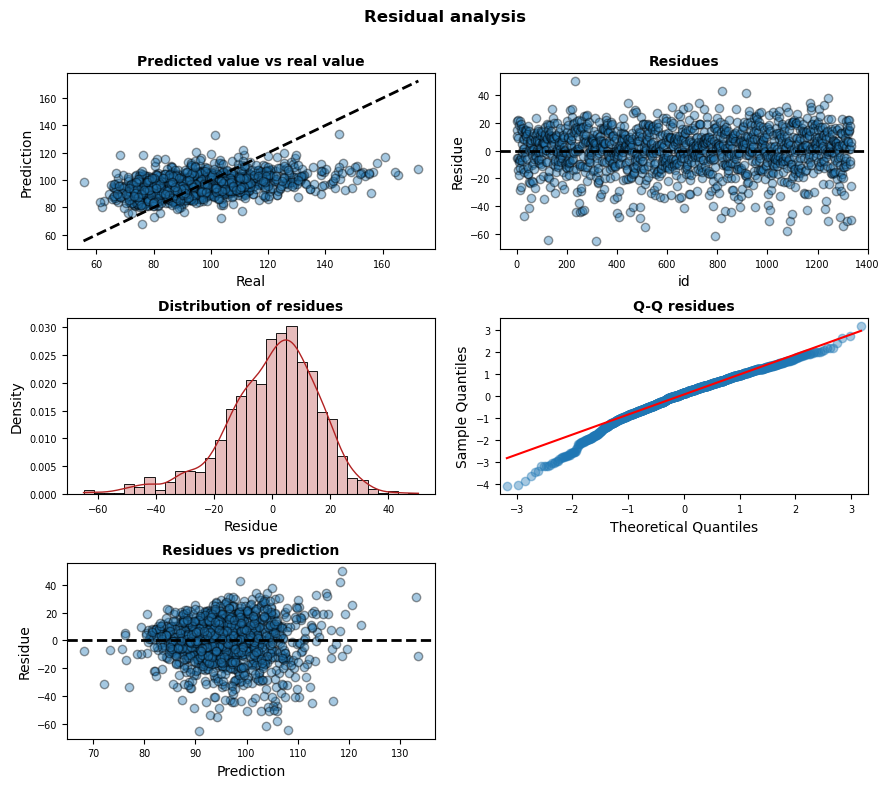

In [127]:
#Training residues
X_train = waist_circumference_train_data.drop('waist_circumference_cm',axis='columns')
for col in X_train.columns.tolist():
    if not(col in waist_circumference_selected_predictors):
        X_train = X_train.drop(col, axis = 'columns')
y_train = waist_circumference_train_data['waist_circumference_cm'].values.flatten()
prediction_train = waist_circumference_model.predict(exog = X_train)
residues_train   = prediction_train - y_train

# Graphs
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                linestyle='--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residues', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residue')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residues_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of residues', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residue")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residues_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residues', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residues_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residues vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Residue')
axes[2, 0].tick_params(labelsize = 7)

# Eliminate empty axes
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Residual analysis', fontsize = 12, fontweight = "bold");
#fig.savefig('residual_analysis_waist_circunference.svg')

The distribution of the residues of this model is also skwed right, which meaans the model tends to under predict, same with the qq-plot as it shows there's a disproportional amount of data in the lower quantiles. we proceed to find the MSE of the model

In [128]:
X_test = waist_circumference_test_data.drop('waist_circumference_cm',axis='columns')
for col in X_test.columns.tolist():
    if not(col in waist_circumference_selected_predictors):
        X_test = X_test.drop(col, axis = 'columns')
y_test = waist_circumference_test_data['waist_circumference_cm'].values
print(f'the mse of this model is: {test(waist_circumference_model,X_test,y_test)}')

the mse of this model is: 218.52133484427287


As we can see the mse for this $MSE \approx 219$ which means that the actual error will be of approximately $\pm 15$ which in terms of the waist circunference doesn't represent much variation in this data frame. With this we can say that this model was overall a pretty good fit to predict the waist circunference, it is described by:
- **`urine_creatinine_mg_dl`:**  
  Coefficient = \($4.798 \times 10^{-6}\$), \(P < 0.001\).  
  Positive relationship with waist circumference.

- **`serum_creatinine_mg_dl`:**  
  Coefficient = \(0.0004\), \(P < 0.001\).  
  Positive and significant.

- **`white_blood_cell_count_cells_per_uL`:**  
  Coefficient = \(1.7262\), \(P < 0.001\).  
  Significant positive association.

- **`absolute_monocyte_count_cells_per_uL`:**  
  Coefficient = \(-7.2601\), \(P = 0.015\).  
  Significant negative relationship.

- **`red_blood_cell_count_million_cells_uL`:**  
  Coefficient = \(3.1252\), \(P = 0.002\).  
  Strong positive association.

- **`mean_corpuscular_volume_fL`:**  
  Coefficient = \(-0.2984\), \(P = 0.002\).  
  Negative relationship.

- **`mean_cell_hemoglobin_concentration_g_dl`:**  
  Coefficient = \(0.9573\), \(P = 0.009\).  
  Positive effect on waist circumference.

- **`red_cell_distribution_width_percentage`:**  
  Coefficient = \(1.4615\), \(P < 0.001\).  
  Strong positive relationship.

- **`platelet_count_cells_per_uL`:**  
  Coefficient = \(0.0486\), \(P < 0.001\).  
  Positive and significant.

- **`mean_platelet_volume_fL`:**  
  Coefficient = \(1.8274\), \(P < 0.001\).  
  Positive association.

- **`fasting_hours_before_lab_visit`:**  
  Coefficient = \(0.1938\), \(P = 0.018\).  
  Positive and significant.

- **`hemoglobin_a1c_percentage`:**  
  Coefficient = \(2.0210\), \(P = 0.027\).  
  Positive relationship.

- **`hepatitis_b_surface_antigen`:**  
  Coefficient = \(3.7205\), \(P < 0.001\).  
  Strong positive association.

- **`urine_volume_ml`:**  
  Coefficient = \(0.0147\), \(P = 0.010\).  
  Positive and significant.

- **`copper_mg`:**  
  Coefficient = \(-1.4439\), \(P = 0.014\).  
  Negative association.

- **`moisture_g`:**  
  Coefficient = \(0.0011\), \(P < 0.001\).  
  Positive and significant.
